In [1]:
#Import Module 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data and convert to datetime then set it as index
df_cpi = pd.read_csv('CPI.csv', index_col='DATE', parse_dates=True) #M
df_eci = pd.read_csv('ECI.csv', index_col='DATE', parse_dates=True) #Q
df_csi = pd.read_csv('UMCSENT.csv',index_col='DATE', parse_dates=True) #M
df_gpd = pd.read_csv('GDP.csv', index_col='DATE', parse_dates=True) #Q
df_ipi = pd.read_csv('IMPORT-PRICE-INDEX.csv', index_col='DATE', parse_dates=True) #M
df_op = pd.read_csv('OIL-PRICE.csv', index_col='DATE', parse_dates=True) #M
df_pce = pd.read_csv('PCE.csv', index_col='DATE', parse_dates=True) #M
df_ppi = pd.read_csv('PPI.csv', index_col='DATE', parse_dates=True) #M
df_wg = pd.read_csv('WAGE-GROWTH.csv', index_col='DATE', parse_dates=True) #M

In [3]:
df_eci

,CIS1020000000000I
DATE,
2001-01-01,87.6
2001-04-01,88.4
2001-07-01,89.2
2001-10-01,90.0
2002-01-01,90.7
...,...
2023-01-01,157.1
2023-04-01,158.7
2023-07-01,160.4


In [4]:
df_list = [df_eci,df_gpd,df_cpi,df_csi,df_ipi,df_op,df_pce,df_ppi,df_wg]
for data in df_list:
    for column in data.columns:
        data[column].replace('.', np.nan, inplace=True)

In [5]:

for data in df_list:
    for column in data.columns:
        data[column] = data[column].astype('float64')

In [6]:
df = df_cpi.join([df_csi,df_ipi,df_op,df_pce,df_ppi,df_wg])
df=df[df.index >= '2001-01-01']
df

,CPIAUCSL,UMCSENT,IR,POILWTIUSDM,PCE,PPIACO,FRBATLWGTUMHWG83O
DATE,,,,,,,
2001-01-01,175.600,94.7,100.5,29.482174,6987.4,140.000,5.3
2001-02-01,176.000,90.6,99.9,29.583500,7001.8,137.400,5.4
2001-03-01,176.100,91.5,98.3,27.241364,6996.7,135.900,5.1
2001-04-01,176.400,88.4,97.8,27.453810,7004.2,136.400,5.4
2001-05-01,177.300,92.0,98.0,28.610435,7052.8,136.800,4.7
...,...,...,...,...,...,...,...
2024-01-01,309.685,79.0,139.4,74.003043,19028.0,251.306,4.7
2024-02-01,311.054,76.9,139.7,77.363810,19136.0,254.914,4.9
2024-03-01,312.230,79.4,140.5,81.405714,19263.7,255.116,4.7


In [7]:
df = df.resample('QS').mean()

In [8]:
df = df.join([df_eci,df_gpd])
df

,CPIAUCSL,UMCSENT,IR,POILWTIUSDM,PCE,PPIACO,FRBATLWGTUMHWG83O,CIS1020000000000I,A191RI1Q225SBEA_NBD19470401
DATE,,,,,,,,,
2001-01-01,175.900000,92.266667,99.566667,28.769013,6995.300000,137.766667,5.266667,87.6,46.55172
2001-04-01,177.133333,91.000000,97.800000,27.888399,7042.233333,136.233333,5.200000,88.4,41.37931
2001-07-01,177.633333,88.566667,96.000000,26.704912,7070.333333,133.366667,5.033333,89.2,27.58621
2001-10-01,177.500000,85.133333,92.466667,20.370715,7187.300000,129.400000,4.966667,90.0,22.41379
2002-01-01,178.066667,93.133333,92.000000,21.630329,7217.733333,128.900000,4.566667,90.7,22.41379
...,...,...,...,...,...,...,...,...,...
2023-04-01,303.466667,62.300000,139.800000,73.702265,18419.000000,254.812667,5.633333,158.7,29.31034
2023-07-01,306.034333,69.566667,140.233333,82.126743,18679.500000,256.816333,5.233333,160.4,56.89655
2023-10-01,308.099000,64.933333,139.300000,78.354690,18914.500000,252.638000,5.233333,162.1,29.31034


In [9]:
df.dropna(inplace=True)
df

,CPIAUCSL,UMCSENT,IR,POILWTIUSDM,PCE,PPIACO,FRBATLWGTUMHWG83O,CIS1020000000000I,A191RI1Q225SBEA_NBD19470401
DATE,,,,,,,,,
2001-01-01,175.900000,92.266667,99.566667,28.769013,6995.300000,137.766667,5.266667,87.6,46.55172
2001-04-01,177.133333,91.000000,97.800000,27.888399,7042.233333,136.233333,5.200000,88.4,41.37931
2001-07-01,177.633333,88.566667,96.000000,26.704912,7070.333333,133.366667,5.033333,89.2,27.58621
2001-10-01,177.500000,85.133333,92.466667,20.370715,7187.300000,129.400000,4.966667,90.0,22.41379
2002-01-01,178.066667,93.133333,92.000000,21.630329,7217.733333,128.900000,4.566667,90.7,22.41379
...,...,...,...,...,...,...,...,...,...
2023-01-01,301.203000,64.600000,140.733333,76.209042,18269.566667,258.652667,6.433333,157.1,67.24138
2023-04-01,303.466667,62.300000,139.800000,73.702265,18419.000000,254.812667,5.633333,158.7,29.31034
2023-07-01,306.034333,69.566667,140.233333,82.126743,18679.500000,256.816333,5.233333,160.4,56.89655


In [10]:
def check_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] > Q3 + 1.5 * IQR) | (df[col] < Q1 - 1.5 * (IQR))]


In [11]:
df.columns = ['cpi', 'csi', 'ipi', 'op', 'pce', 'ppi', 'wg','eci', 'gdp']

df

,cpi,csi,ipi,op,pce,ppi,wg,eci,gdp
DATE,,,,,,,,,
2001-01-01,175.900000,92.266667,99.566667,28.769013,6995.300000,137.766667,5.266667,87.6,46.55172
2001-04-01,177.133333,91.000000,97.800000,27.888399,7042.233333,136.233333,5.200000,88.4,41.37931
2001-07-01,177.633333,88.566667,96.000000,26.704912,7070.333333,133.366667,5.033333,89.2,27.58621
2001-10-01,177.500000,85.133333,92.466667,20.370715,7187.300000,129.400000,4.966667,90.0,22.41379
2002-01-01,178.066667,93.133333,92.000000,21.630329,7217.733333,128.900000,4.566667,90.7,22.41379
...,...,...,...,...,...,...,...,...,...
2023-01-01,301.203000,64.600000,140.733333,76.209042,18269.566667,258.652667,6.433333,157.1,67.24138
2023-04-01,303.466667,62.300000,139.800000,73.702265,18419.000000,254.812667,5.633333,158.7,29.31034
2023-07-01,306.034333,69.566667,140.233333,82.126743,18679.500000,256.816333,5.233333,160.4,56.89655


In [12]:
for column in df.columns:
    print(column.upper())
    print(check_outliers(df, column)[column])
    print(len(check_outliers(df, column)))
    print('*' * 150)
    print()

CPI
Series([], Freq: QS-JAN, Name: cpi, dtype: float64)
0
******************************************************************************************************************************************************

CSI
Series([], Freq: QS-JAN, Name: csi, dtype: float64)
0
******************************************************************************************************************************************************

IPI
Series([], Freq: QS-JAN, Name: ipi, dtype: float64)
0
******************************************************************************************************************************************************

OP
Series([], Freq: QS-JAN, Name: op, dtype: float64)
0
******************************************************************************************************************************************************

PCE
Series([], Freq: QS-JAN, Name: pce, dtype: float64)
0
********************************************************************************************************

In [13]:
check_outliers(df, 'op')

,cpi,csi,ipi,op,pce,ppi,wg,eci,gdp
DATE,,,,,,,,,


In [14]:
check_outliers(df, 'wg')

,cpi,csi,ipi,op,pce,ppi,wg,eci,gdp
DATE,,,,,,,,,
2022-01-01,284.826000,63.133333,143.166667,94.428250,17030.633333,253.042333,5.966667,149.6,144.82759
2022-04-01,291.706333,57.866667,148.066667,108.791291,17415.100000,272.937333,6.733333,151.7,156.89655
2022-07-01,295.509000,56.100000,144.700000,93.336901,17684.200000,269.906000,6.366667,153.5,77.58621
2022-10-01,298.441000,58.800000,142.033333,82.648283,17917.066667,262.038333,6.100000,155.3,67.24138
2023-01-01,301.203000,64.600000,140.733333,76.209042,18269.566667,258.652667,6.433333,157.1,67.24138
2023-04-01,303.466667,62.300000,139.800000,73.702265,18419.000000,254.812667,5.633333,158.7,29.31034


In [15]:
check_outliers(df, 'pce')

,cpi,csi,ipi,op,pce,ppi,wg,eci,gdp
DATE,,,,,,,,,


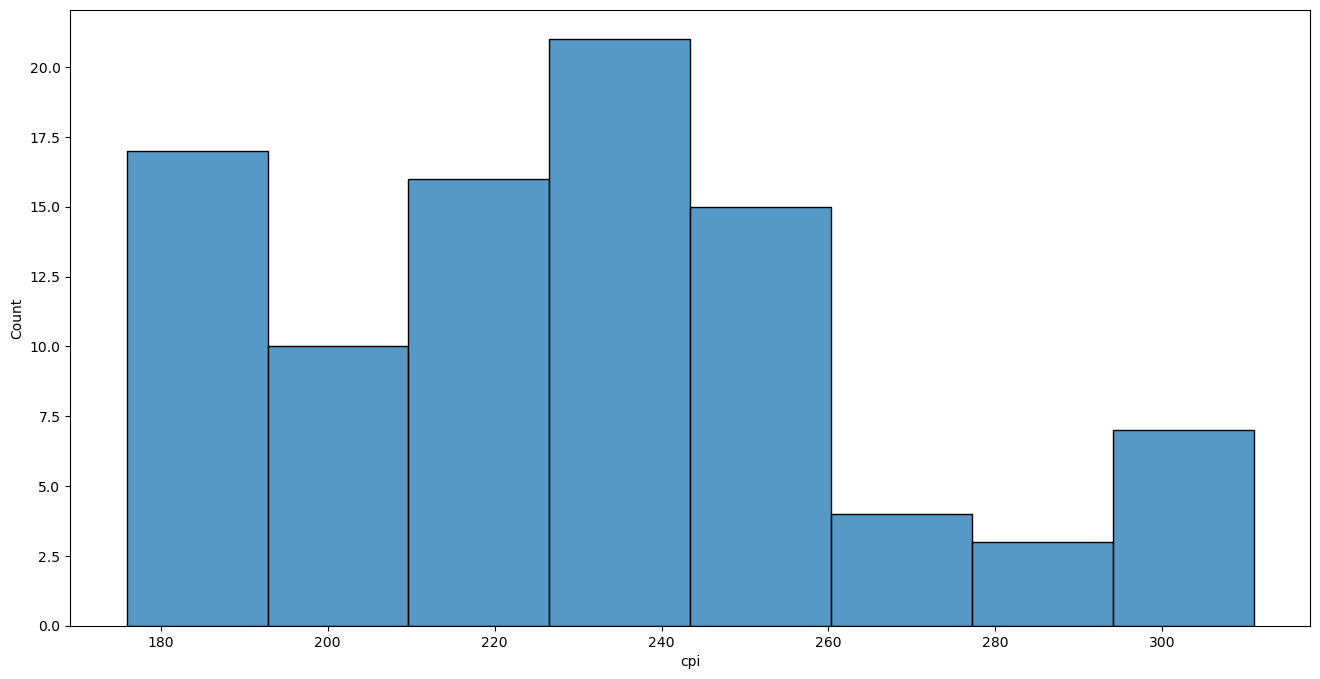

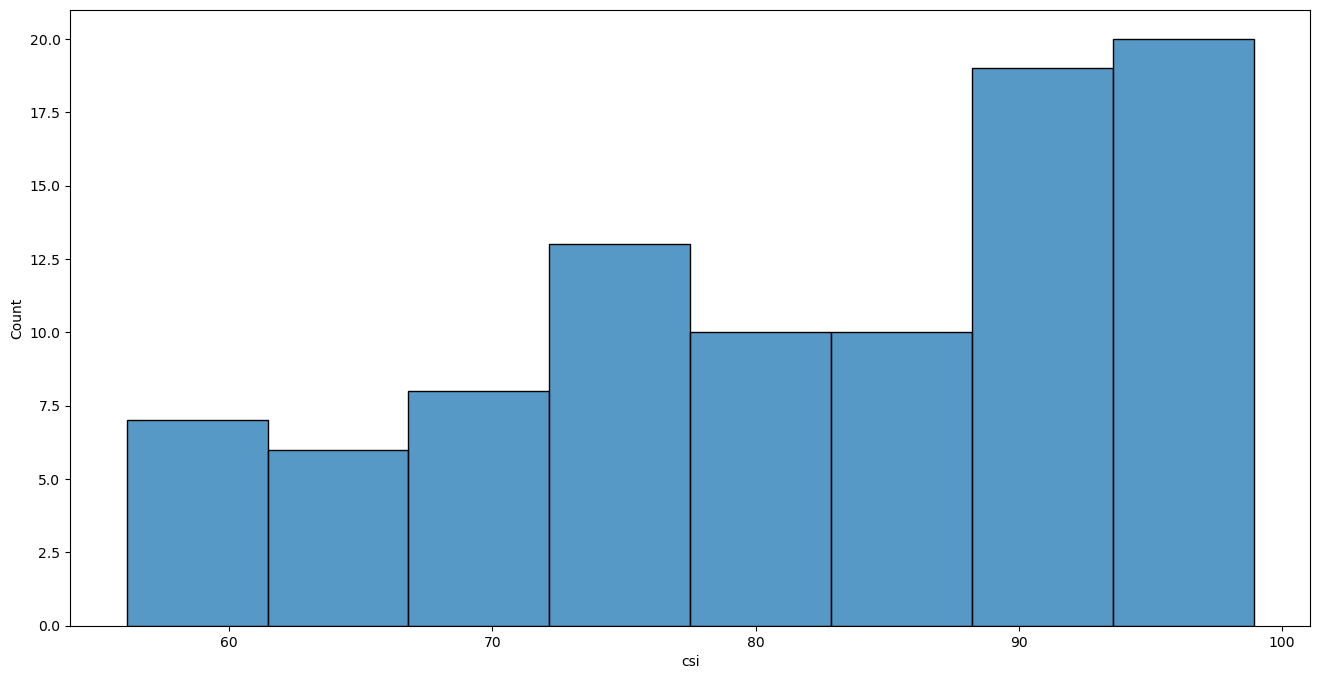

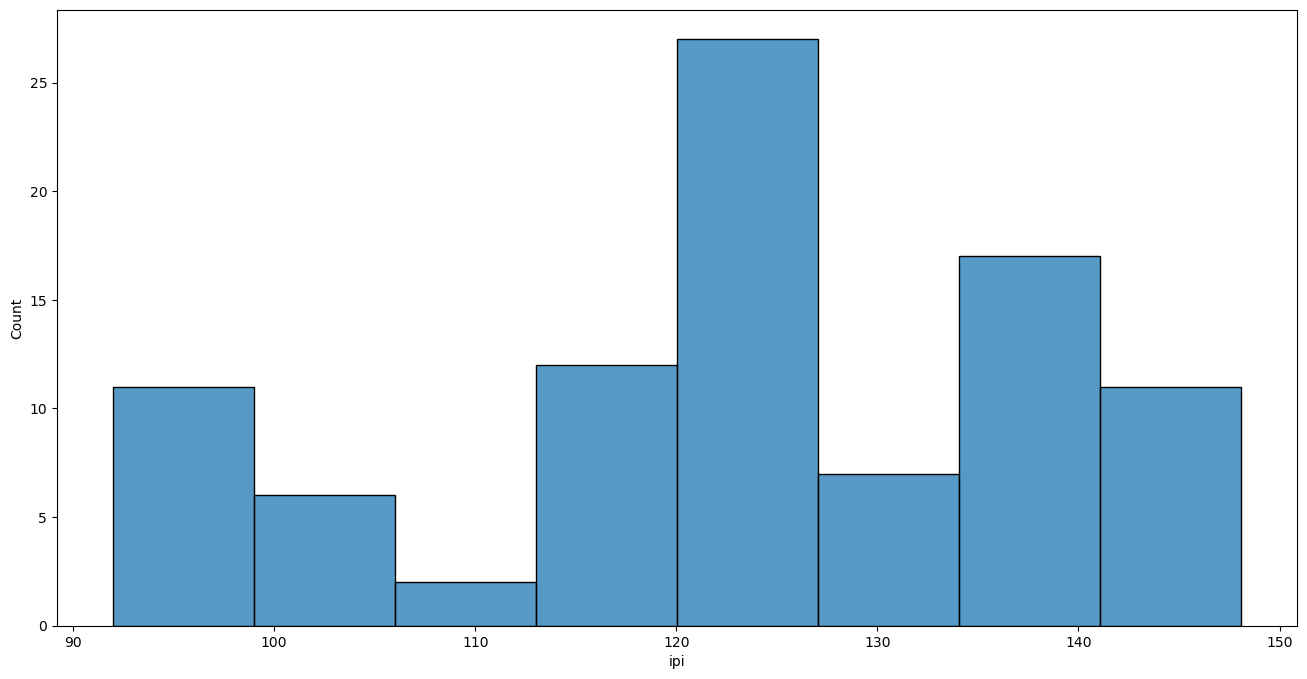

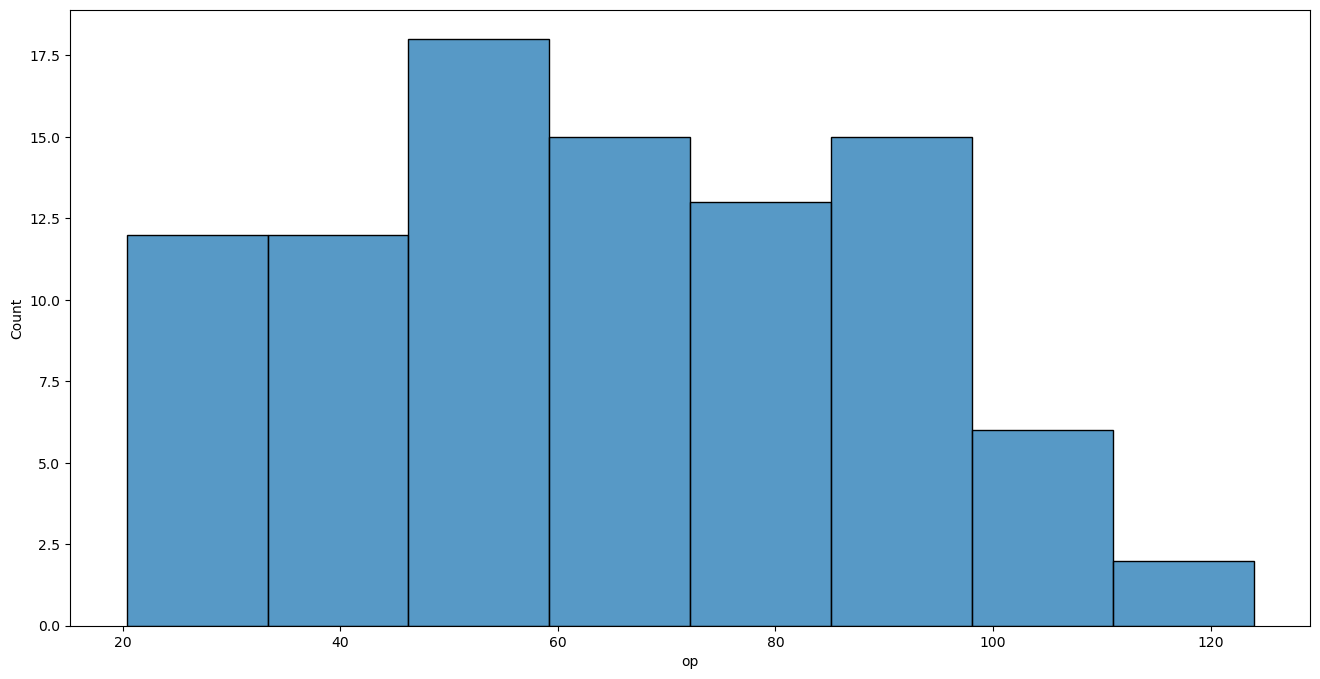

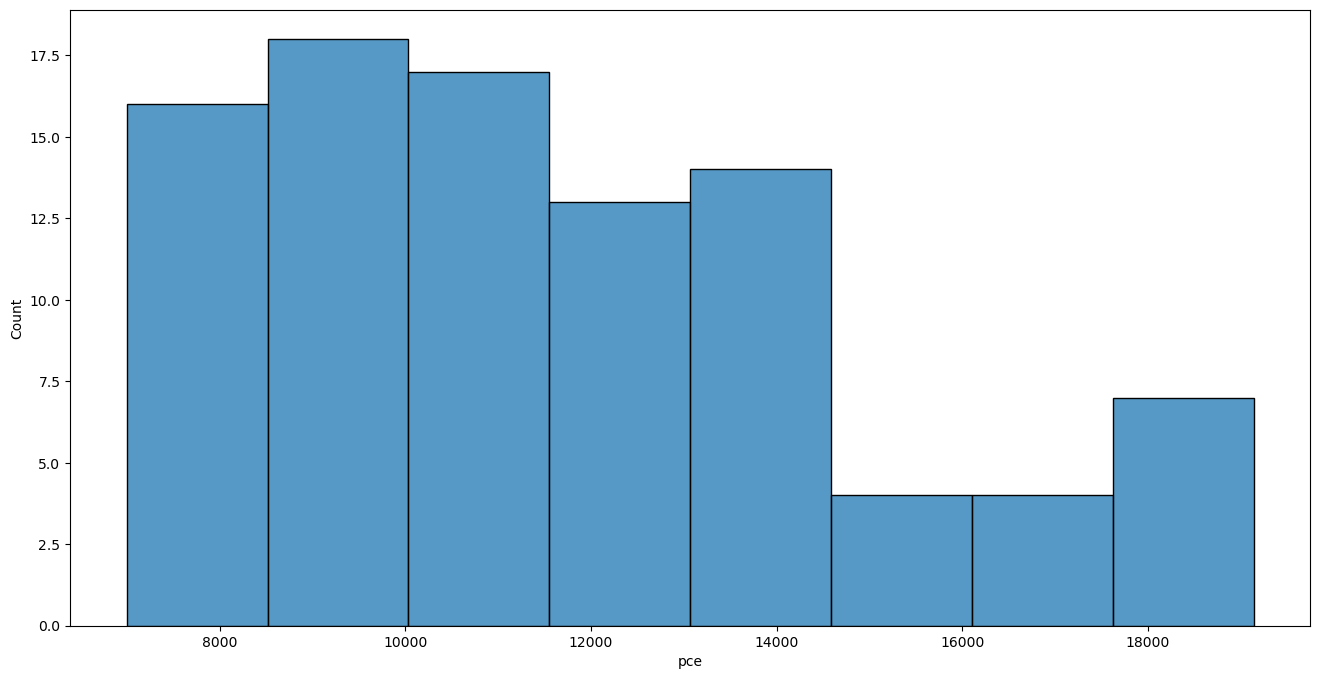

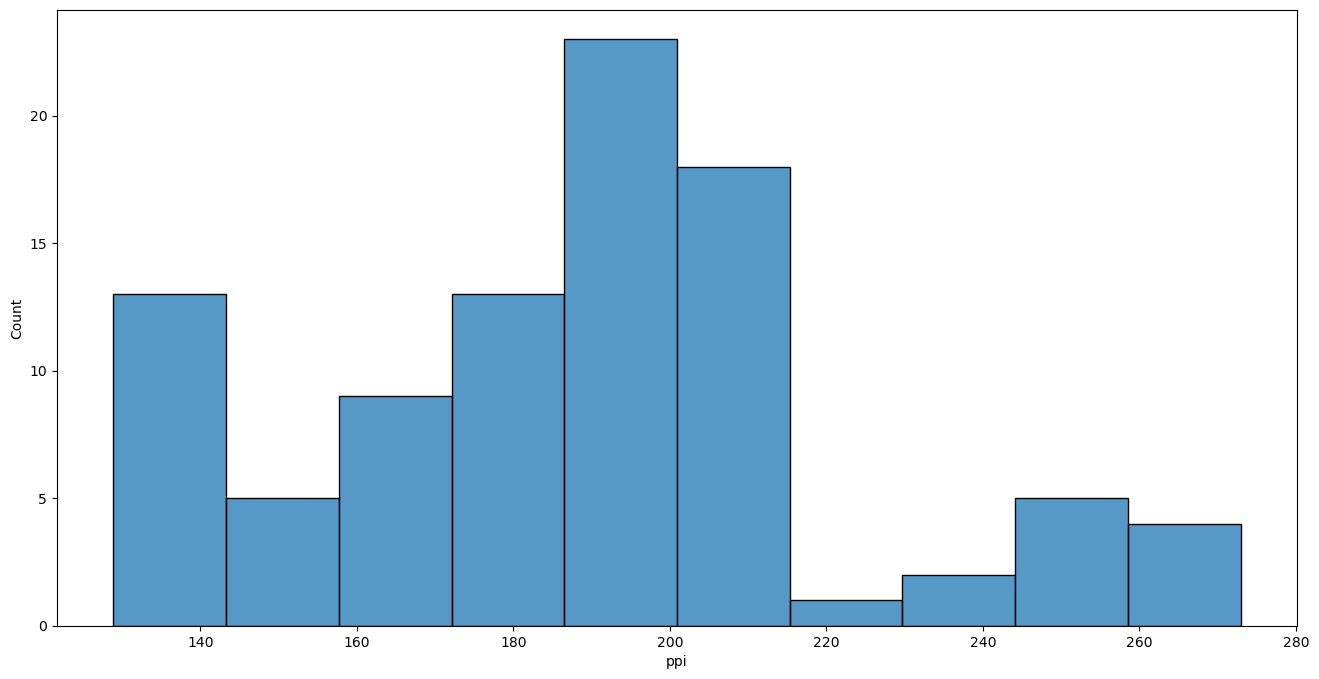

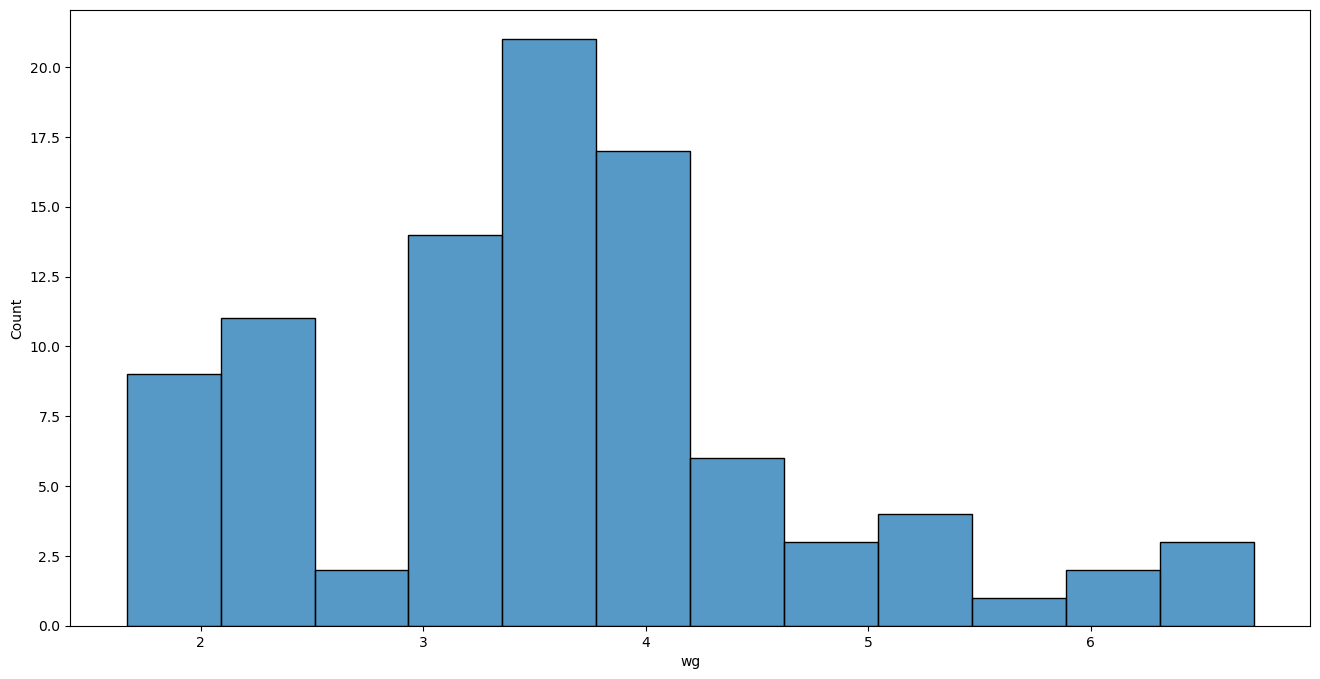

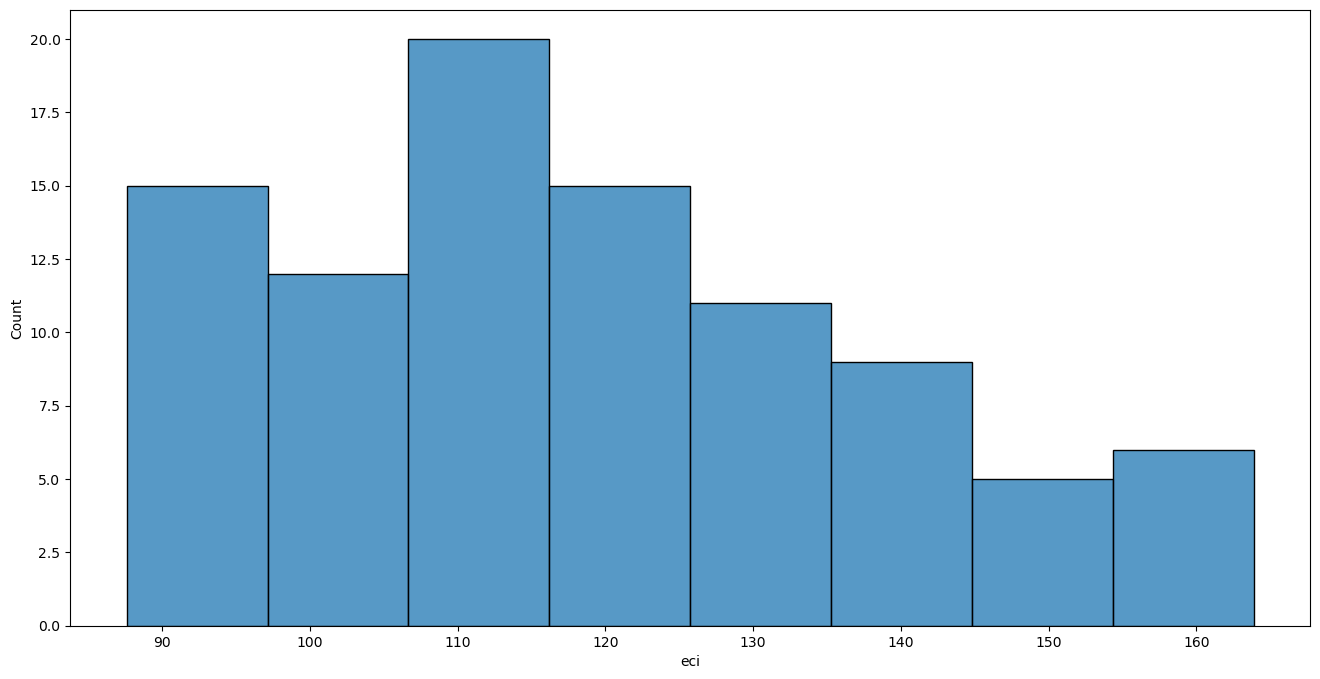

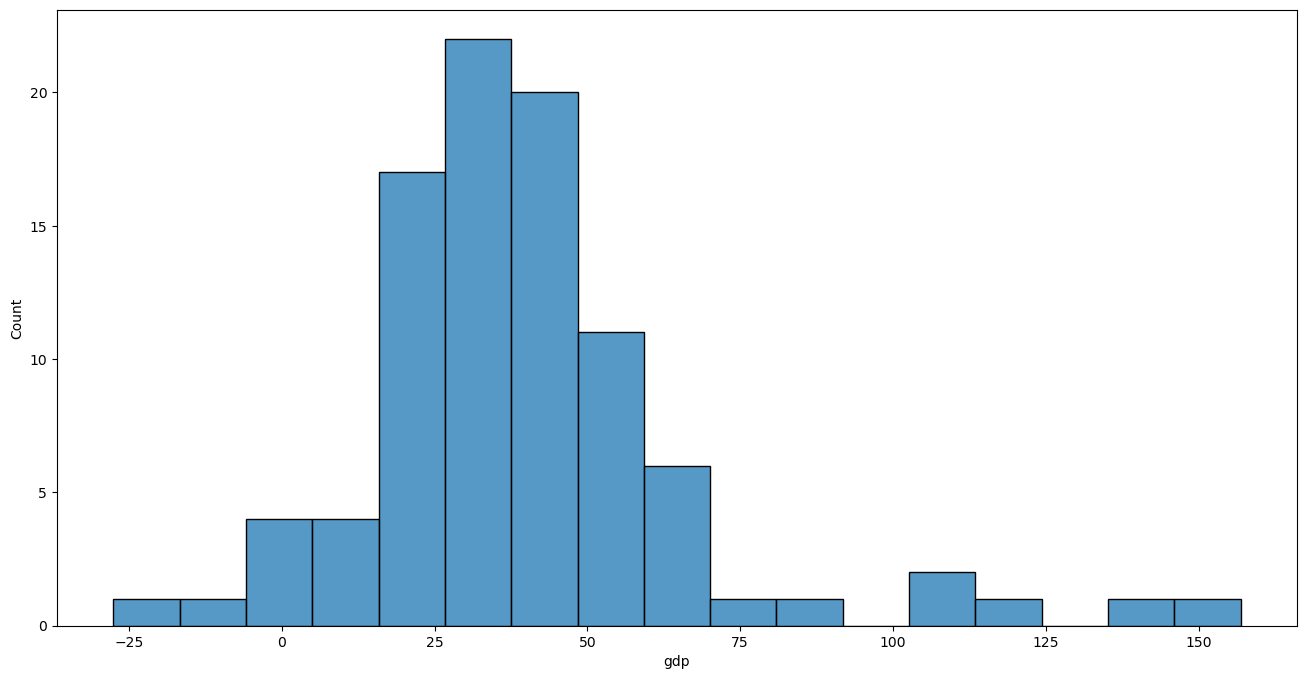

In [16]:
for column in df.columns:
    plt.figure(figsize=(16, 8))
    sns.histplot(df[column])
    plt.plot()

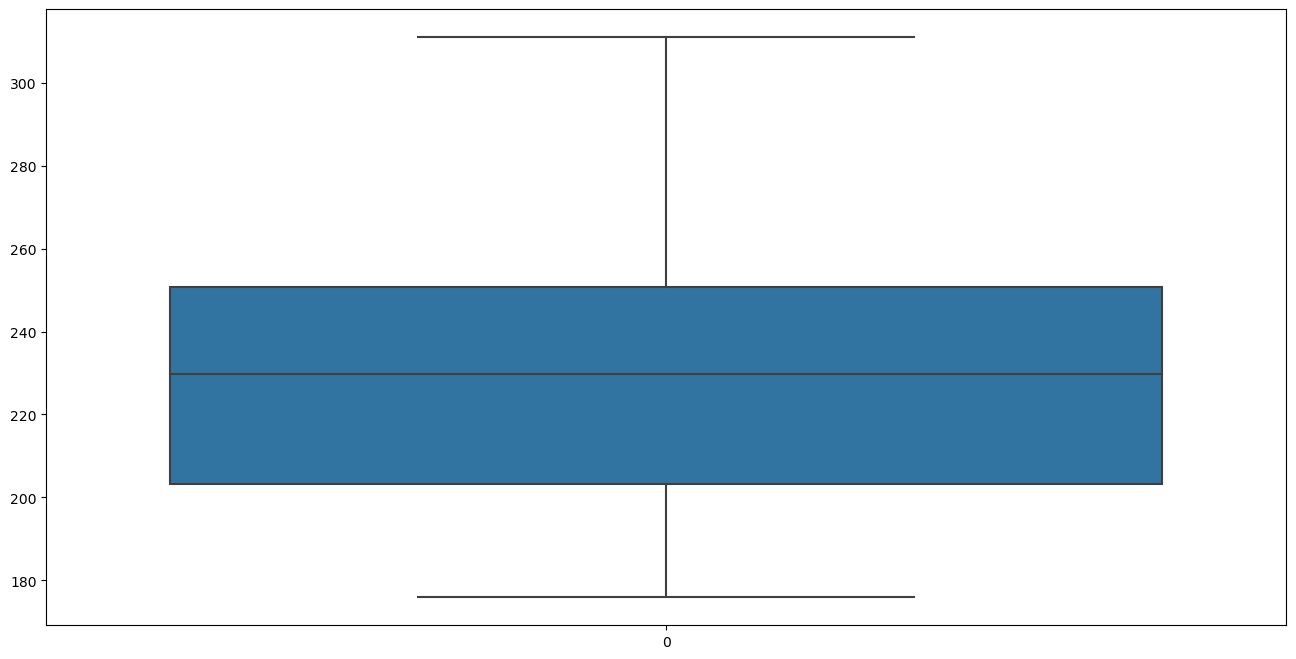

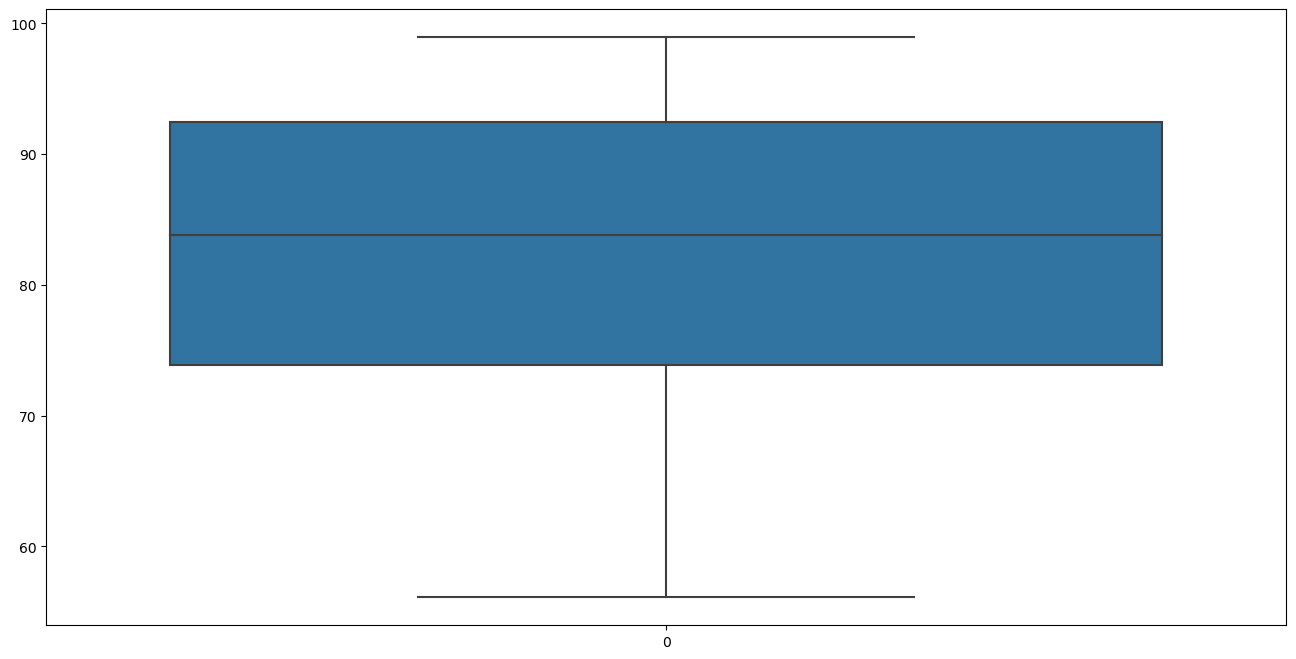

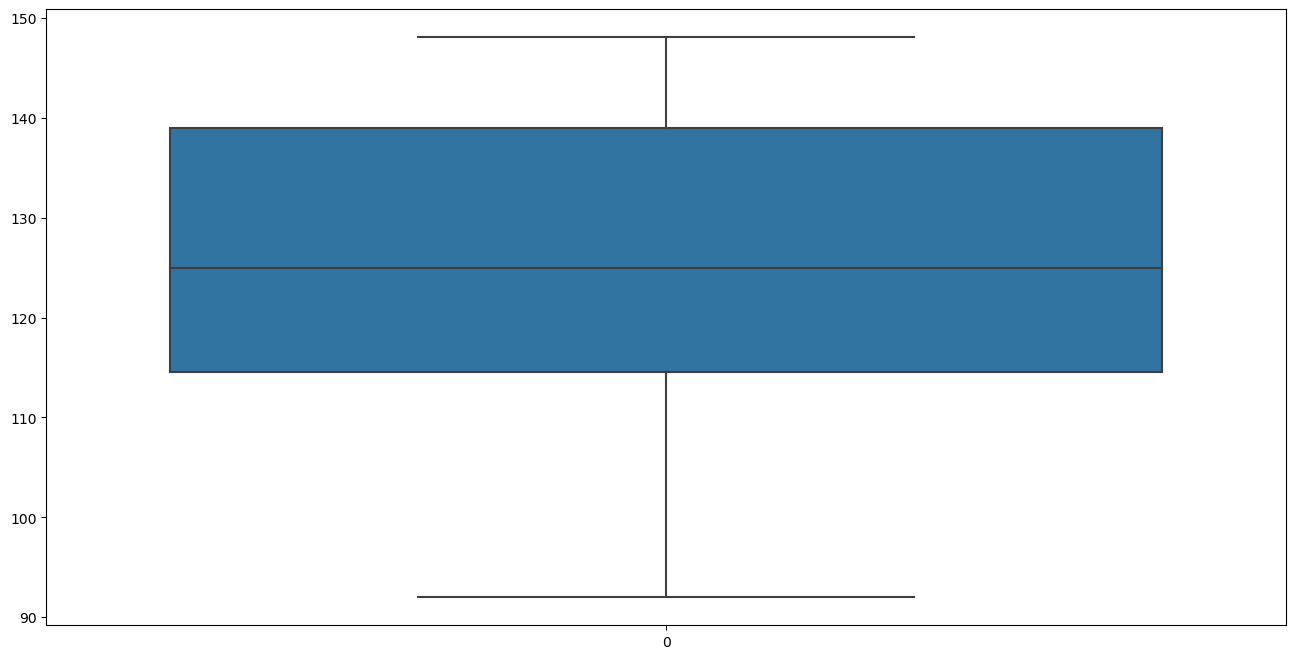

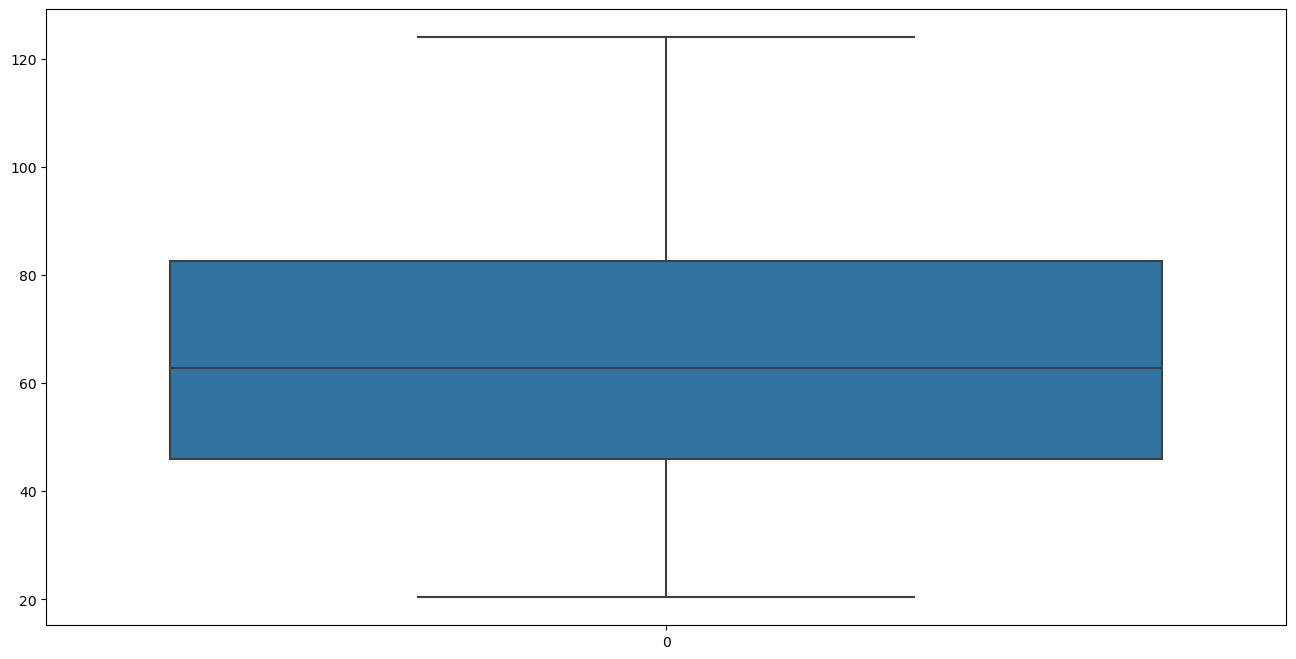

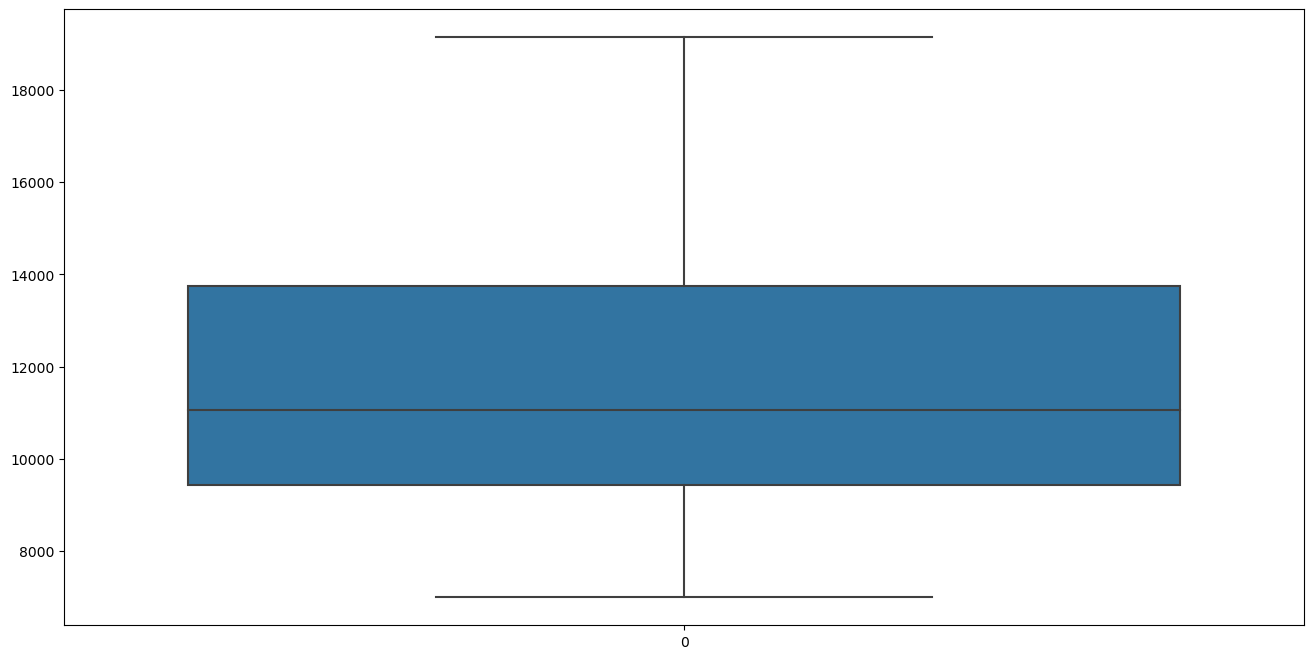

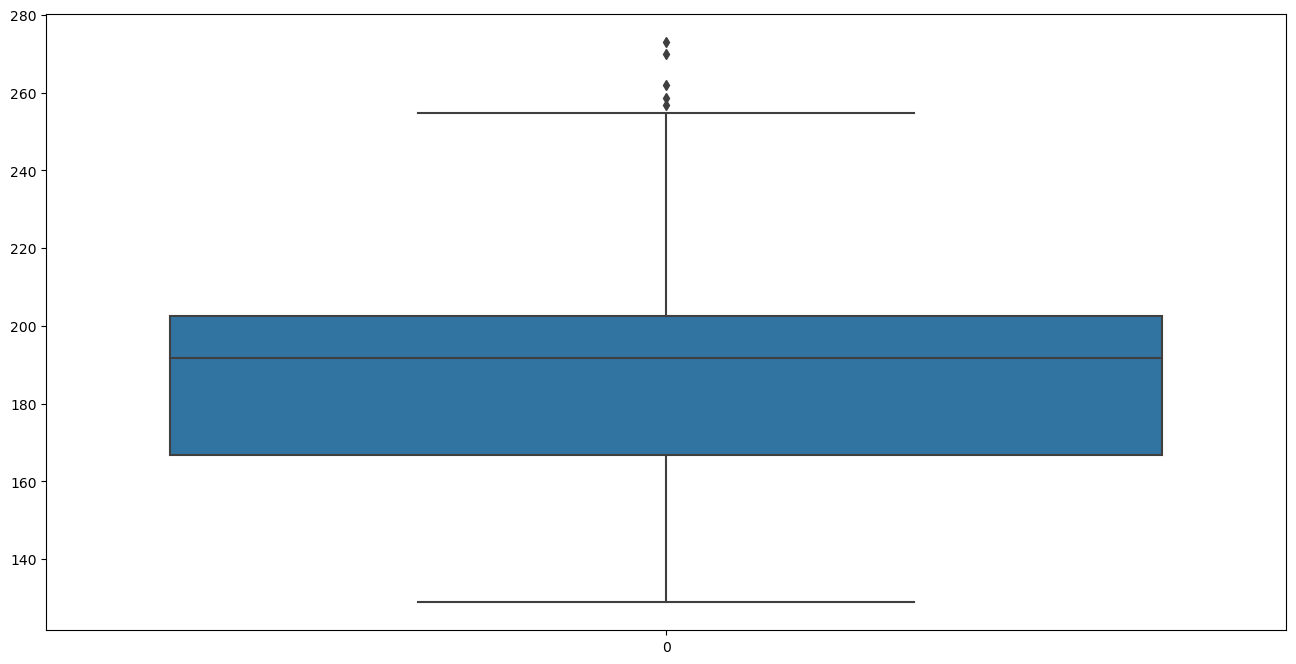

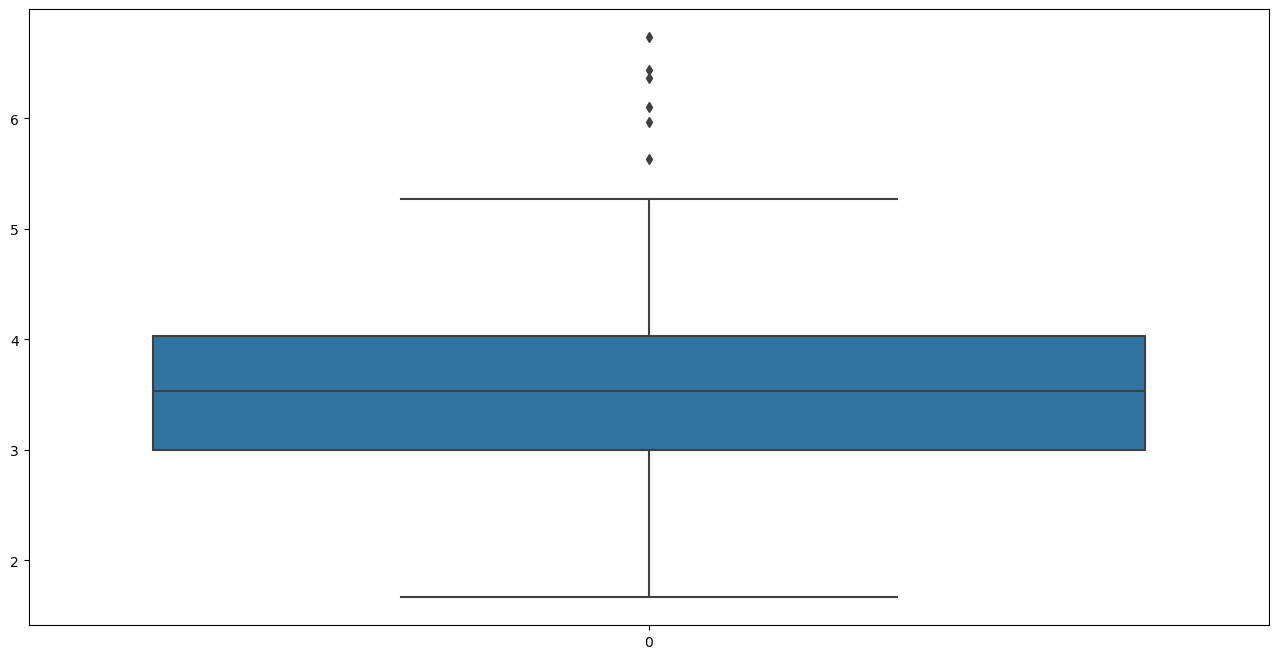

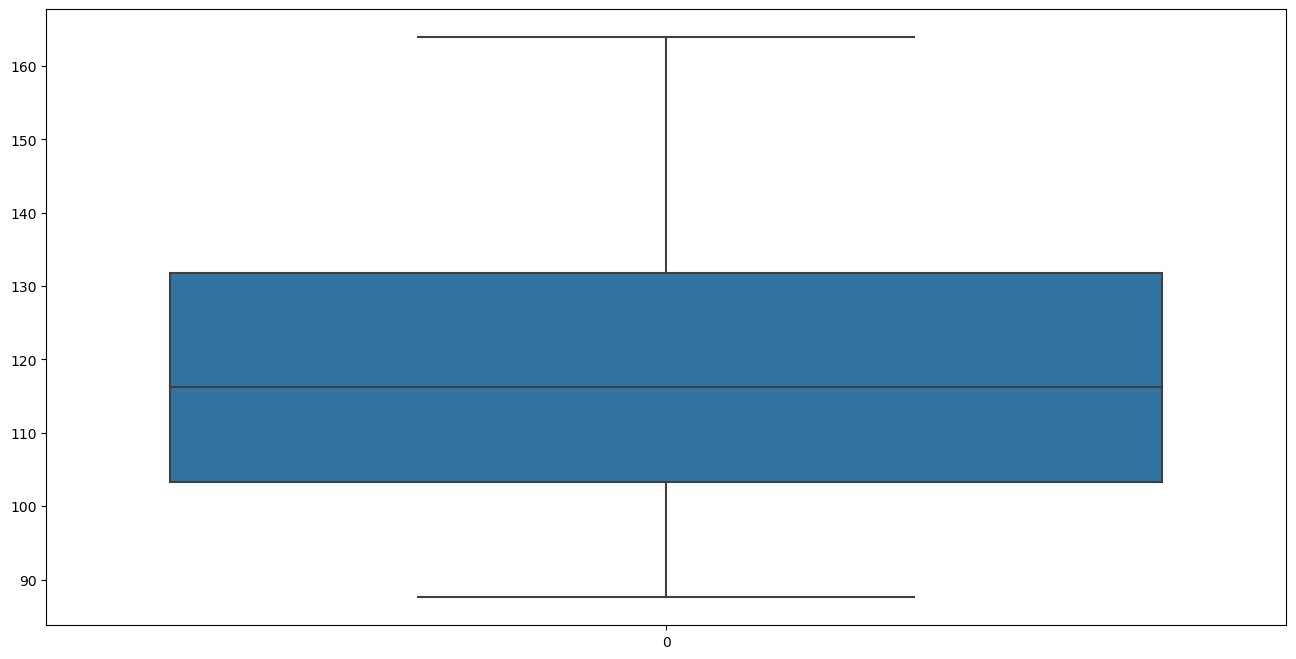

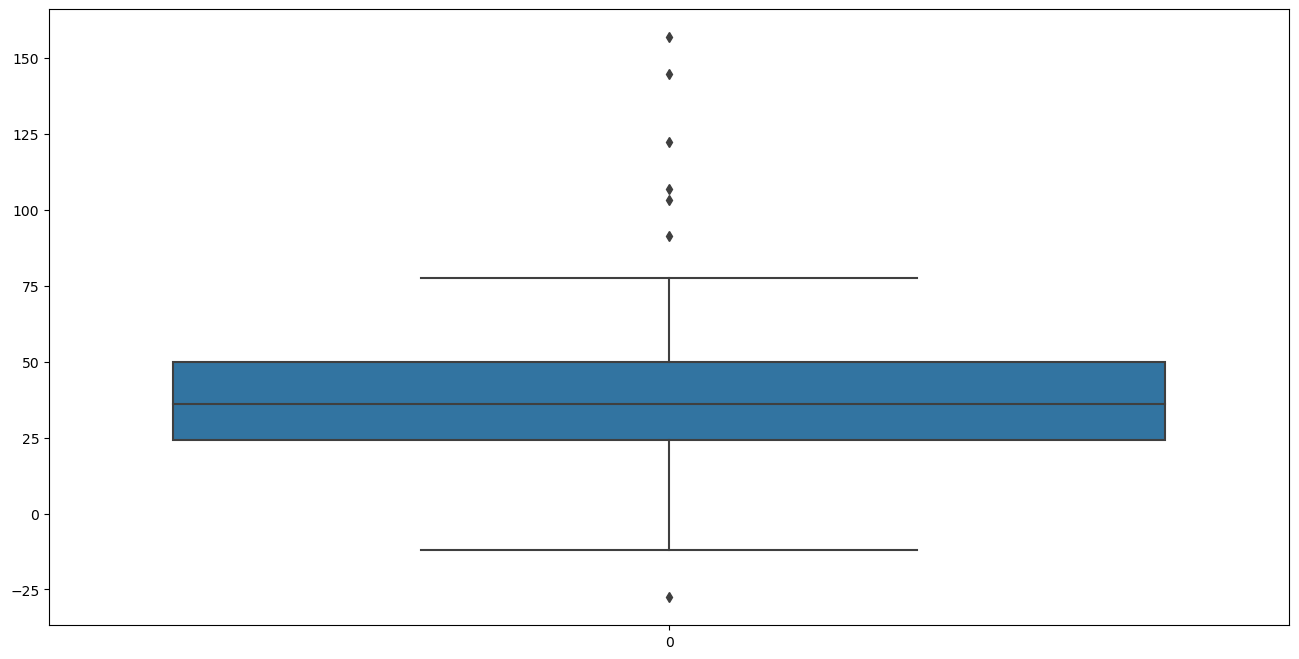

In [17]:
for column in df.columns:
    plt.figure(figsize=(16, 8))
    sns.boxplot(df[column])
    plt.plot()

<Axes: xlabel='DATE'>

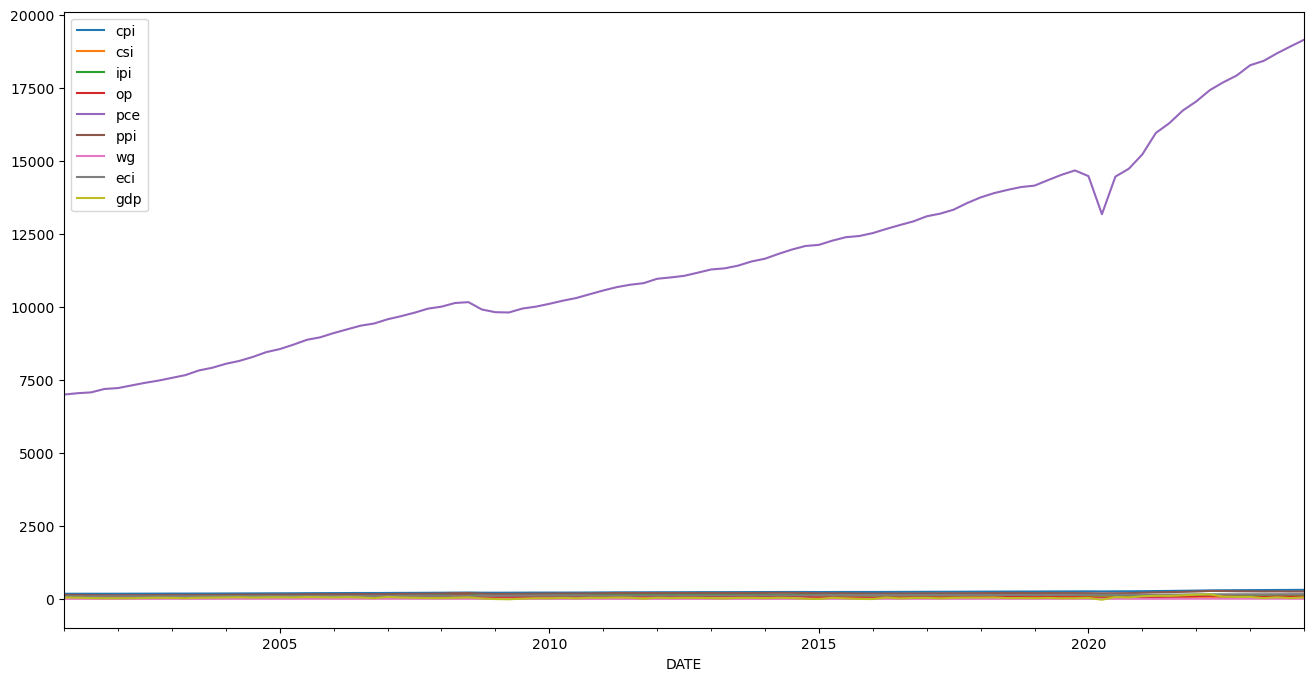

In [18]:
df.plot(figsize=(16, 8))

<Axes: xlabel='DATE'>

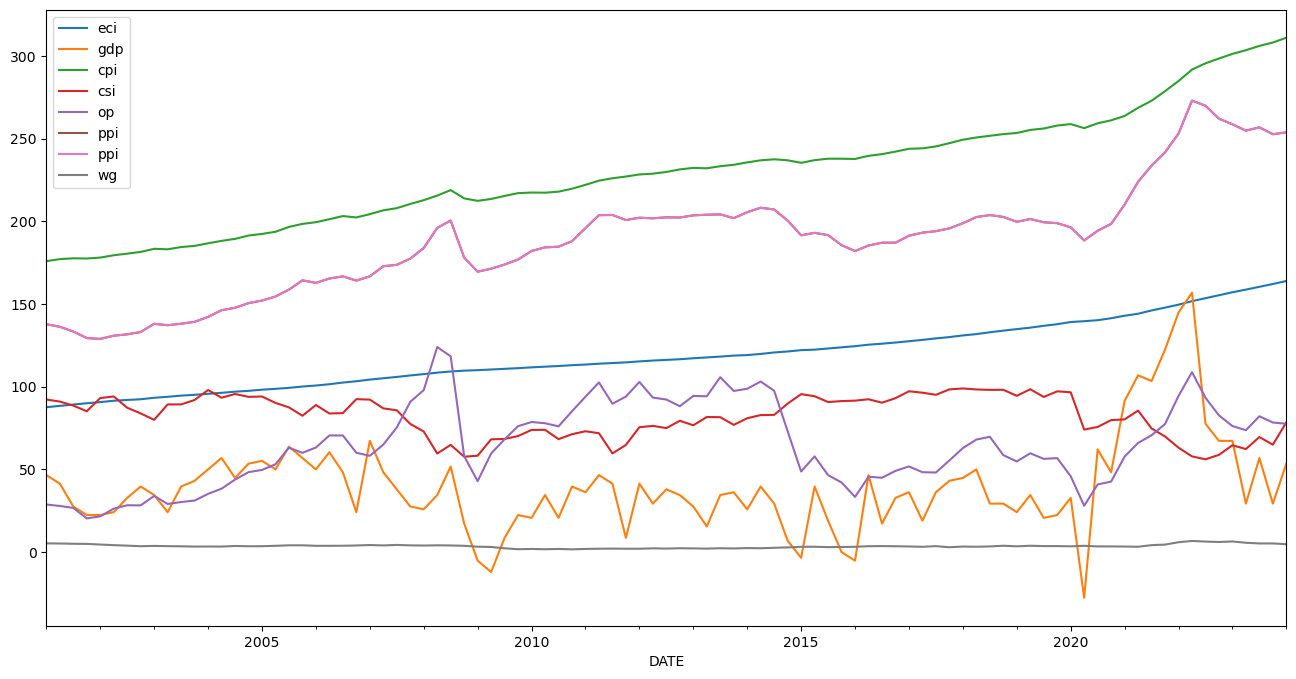

In [19]:
df[['eci','gdp','cpi','csi','op','ppi','ppi','wg']].plot(figsize=(16, 8))

In [20]:
corr_matrix = df.corr()
corr_matrix

,cpi,csi,ipi,op,pce,ppi,wg,eci,gdp
cpi,1.000000,-0.331033,0.752755,0.401774,0.993714,0.948008,0.275584,0.994817,0.309814
csi,-0.331033,1.000000,-0.539142,-0.584788,-0.271263,-0.498641,-0.120969,-0.284053,-0.190871
ipi,0.752755,-0.539142,1.000000,0.868921,0.694559,0.893070,-0.120310,0.701179,0.221119
op,0.401774,-0.584788,0.868921,1.000000,0.336951,0.644233,-0.189619,0.328829,0.247243
pce,0.993714,-0.271263,0.694559,0.336951,1.000000,0.923544,0.332909,0.995085,0.355504
ppi,0.948008,-0.498641,0.893070,0.644233,0.923544,1.000000,0.219919,0.916578,0.388022
wg,0.275584,-0.120969,-0.120310,-0.189619,0.332909,0.219919,1.000000,0.277803,0.453907
eci,0.994817,-0.284053,0.701179,0.328829,0.995085,0.916578,0.277803,1.000000,0.303826
gdp,0.309814,-0.190871,0.221119,0.247243,0.355504,0.388022,0.453907,0.303826,1.000000


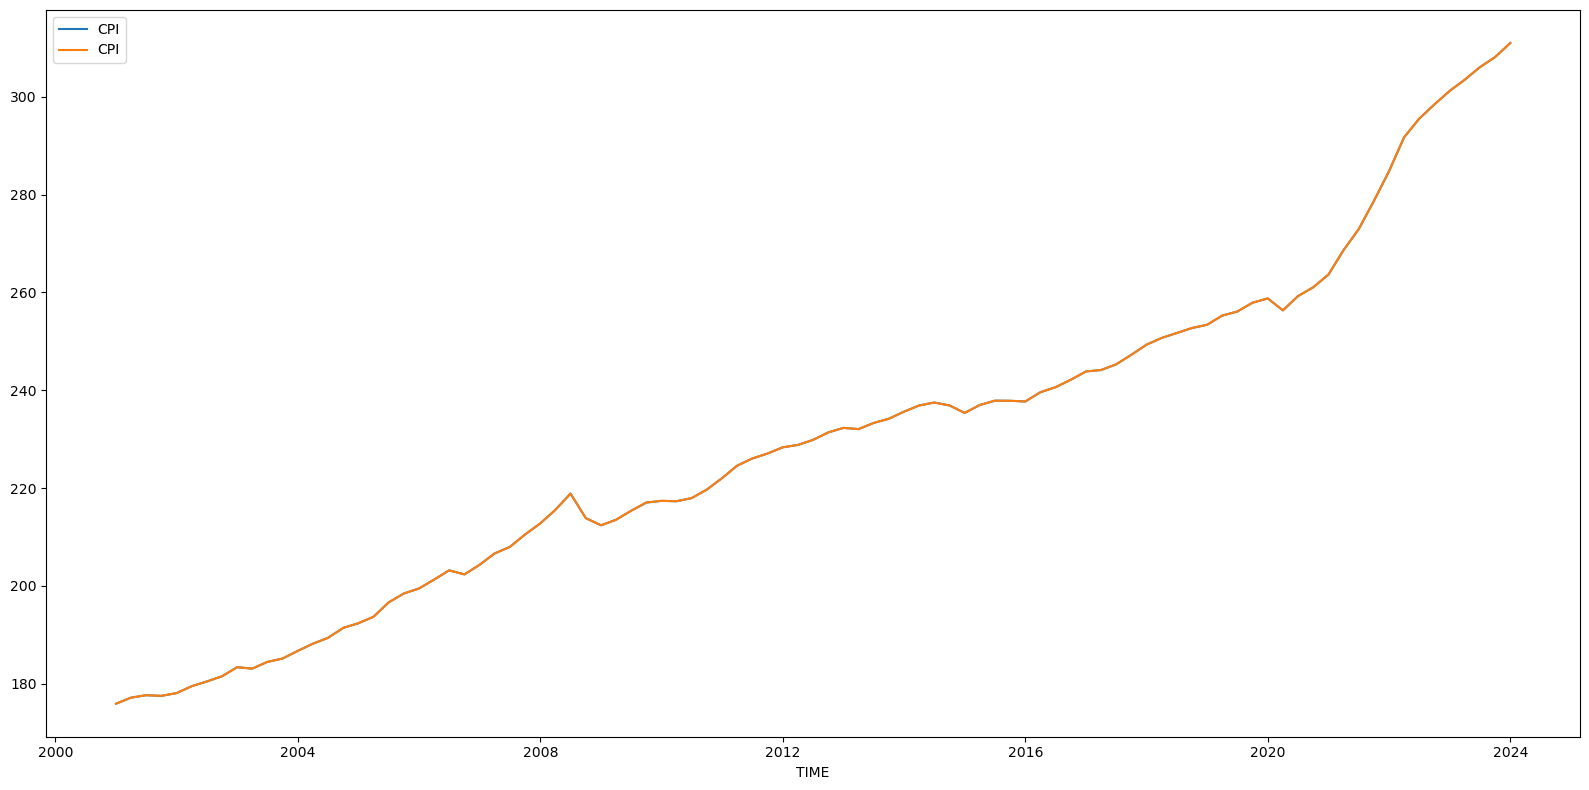

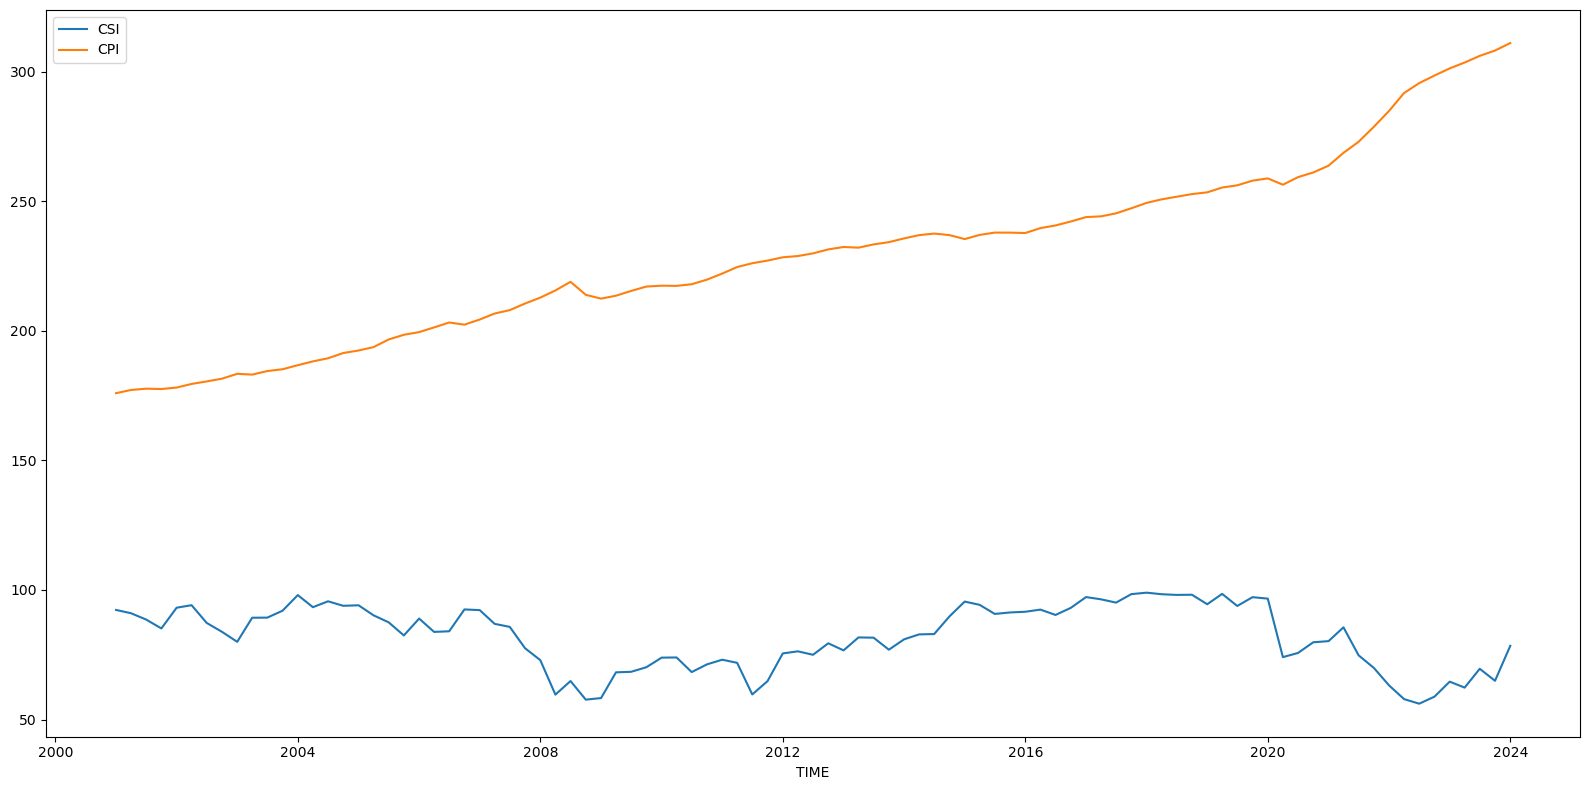

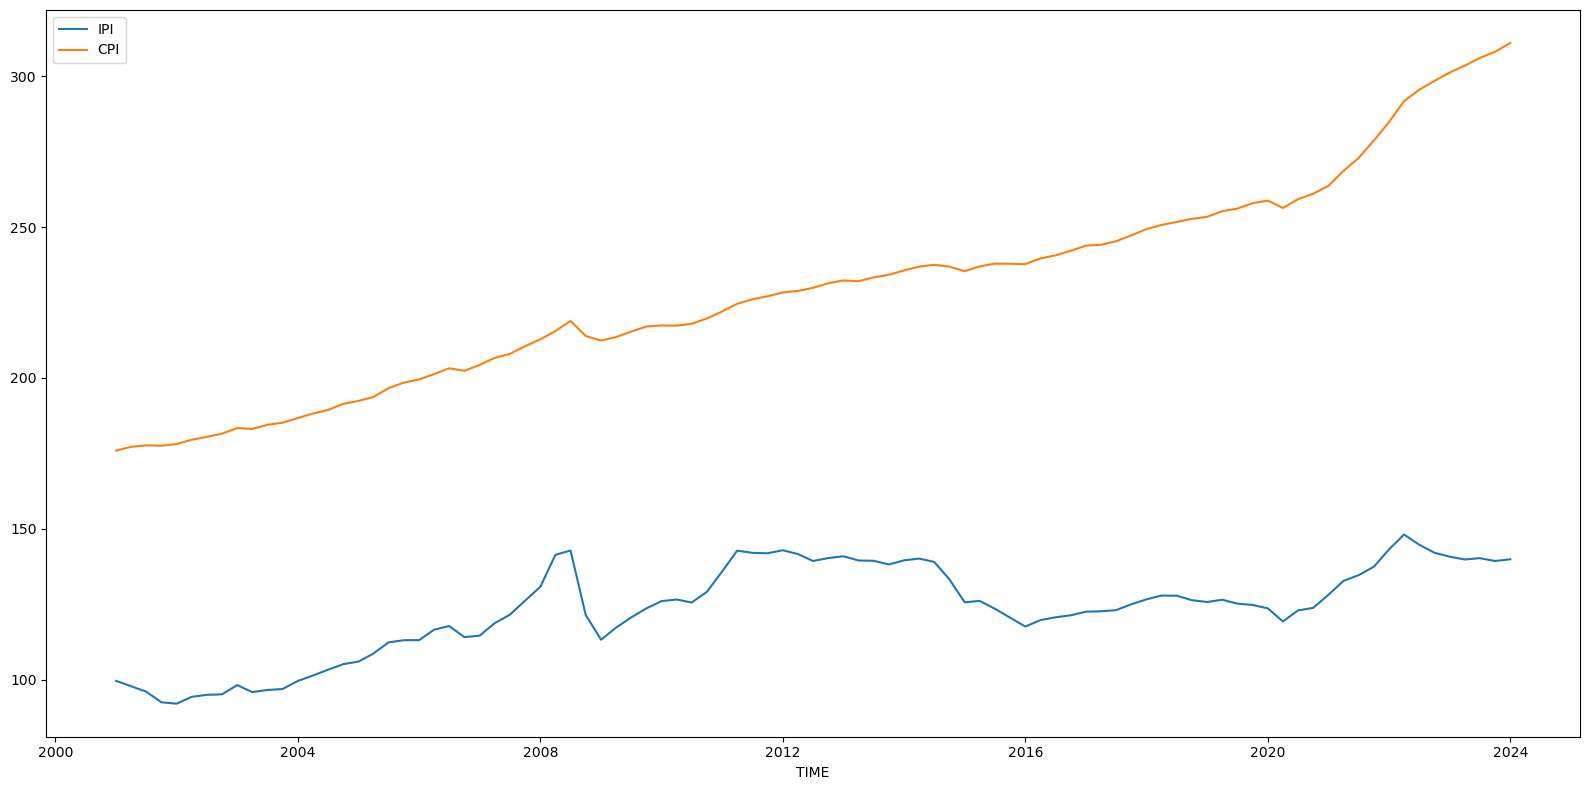

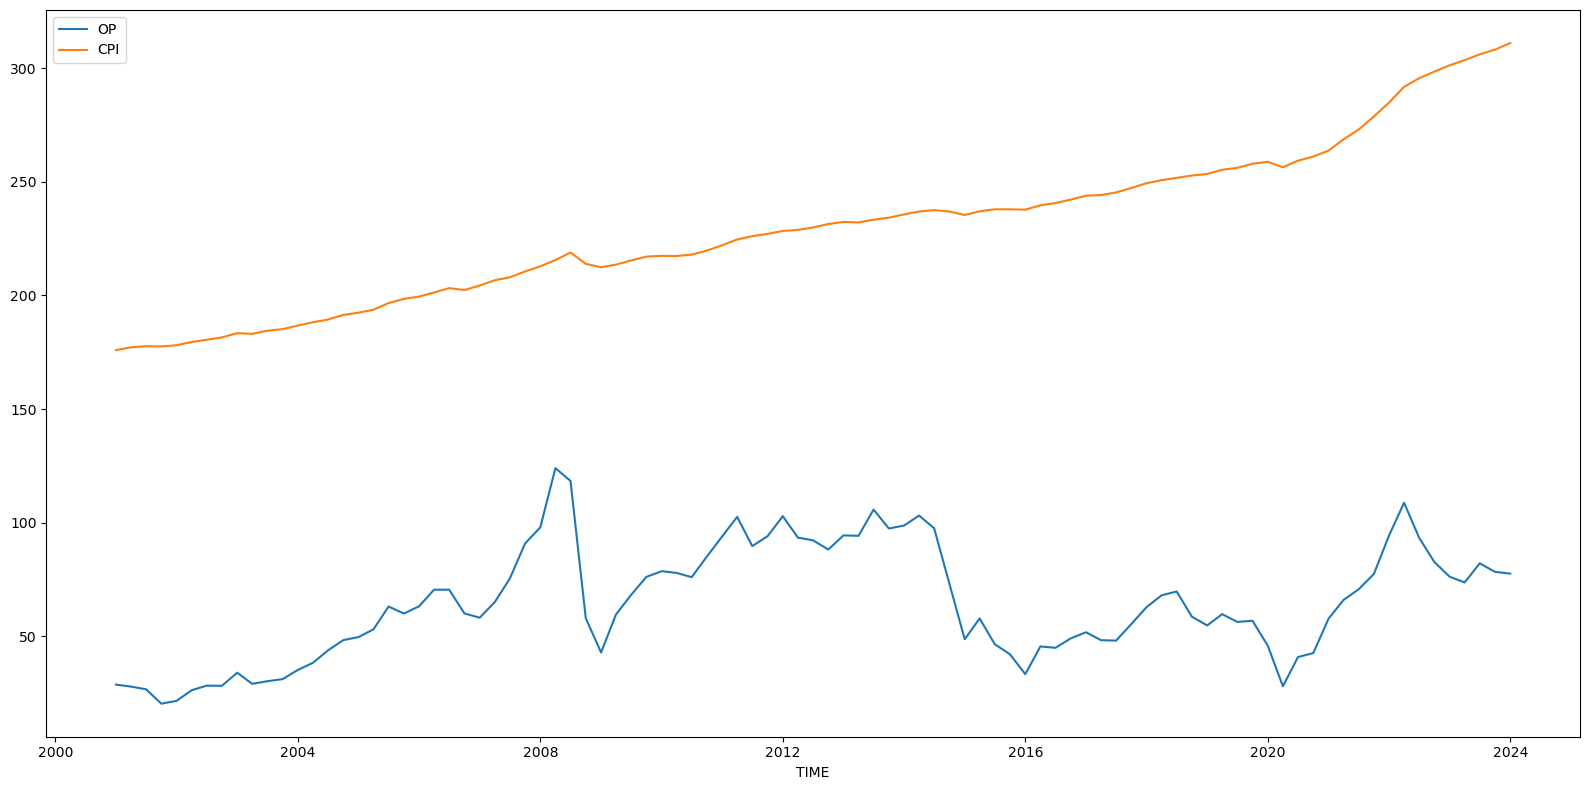

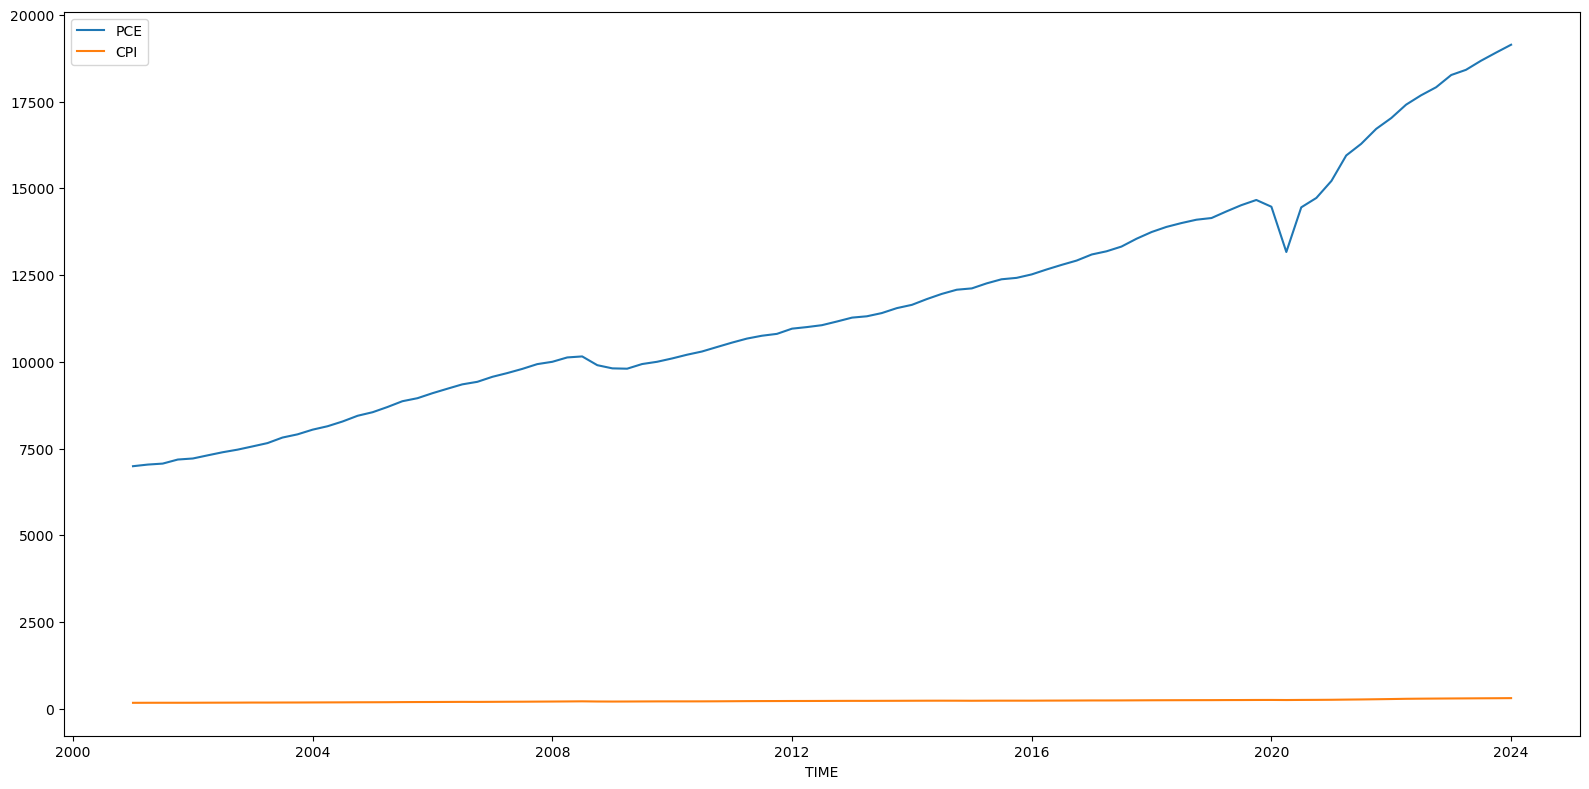

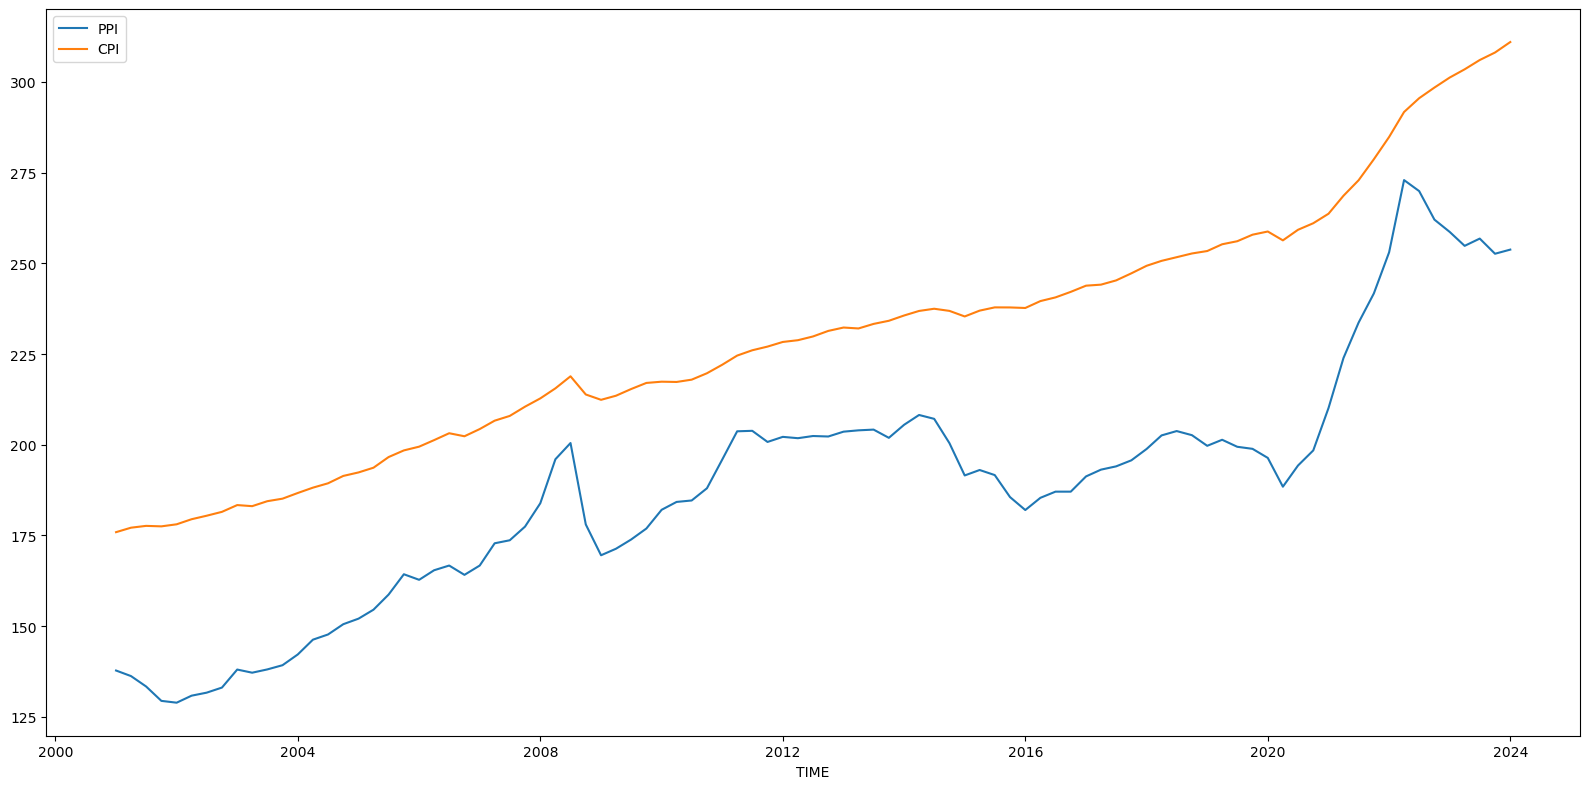

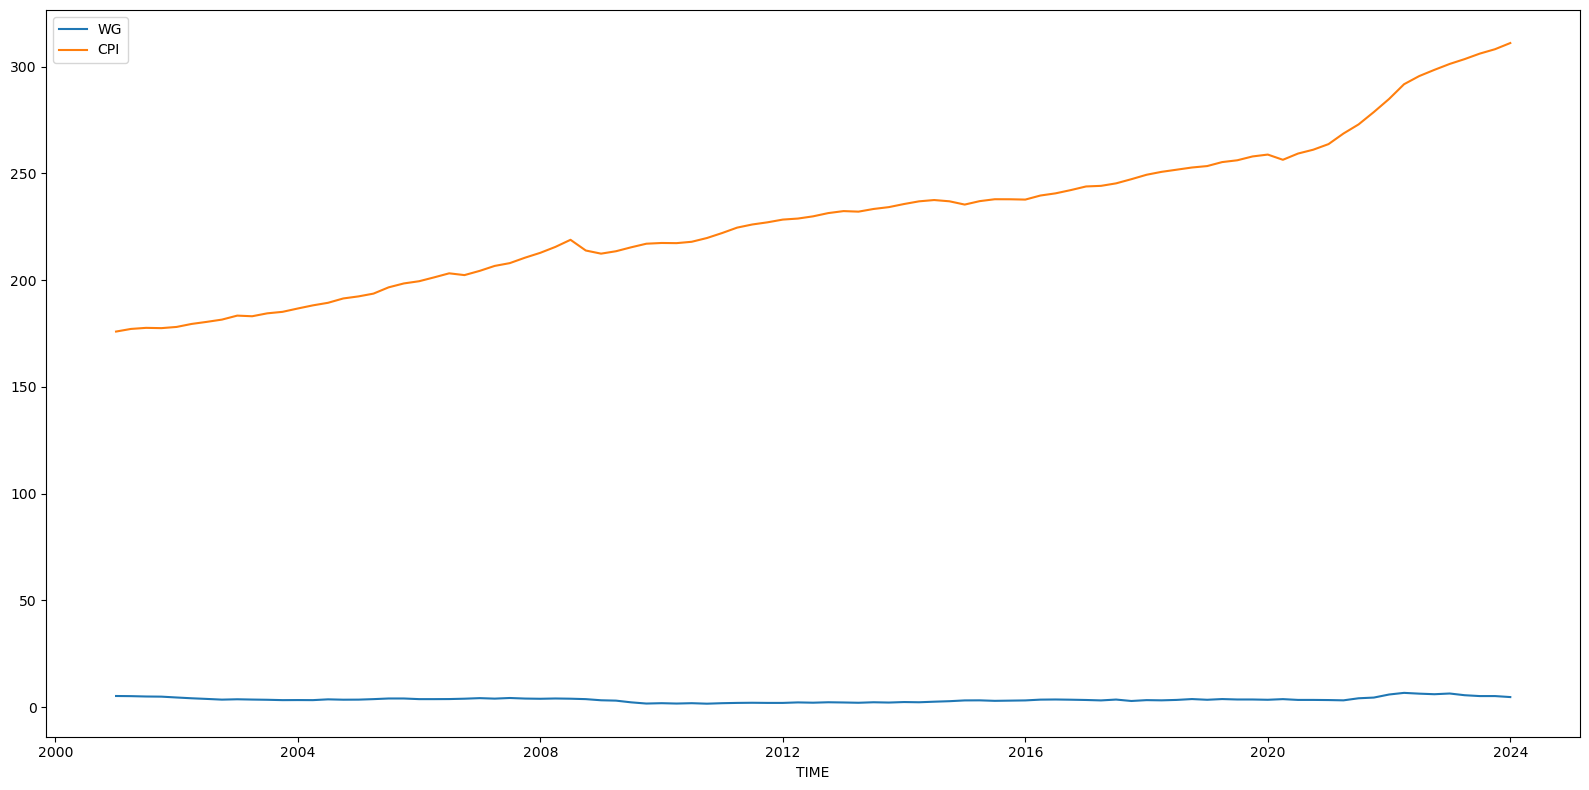

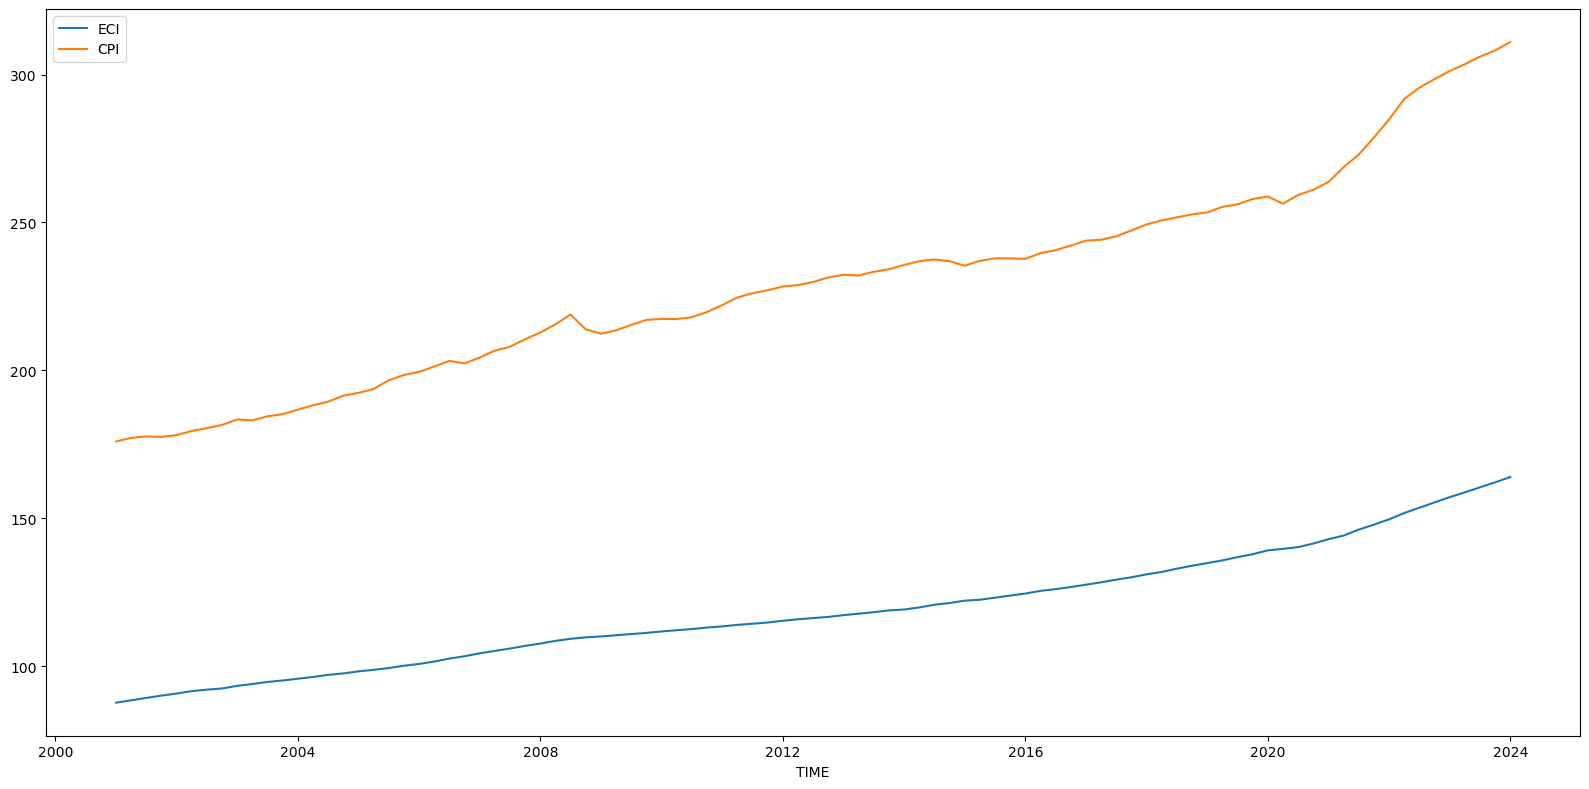

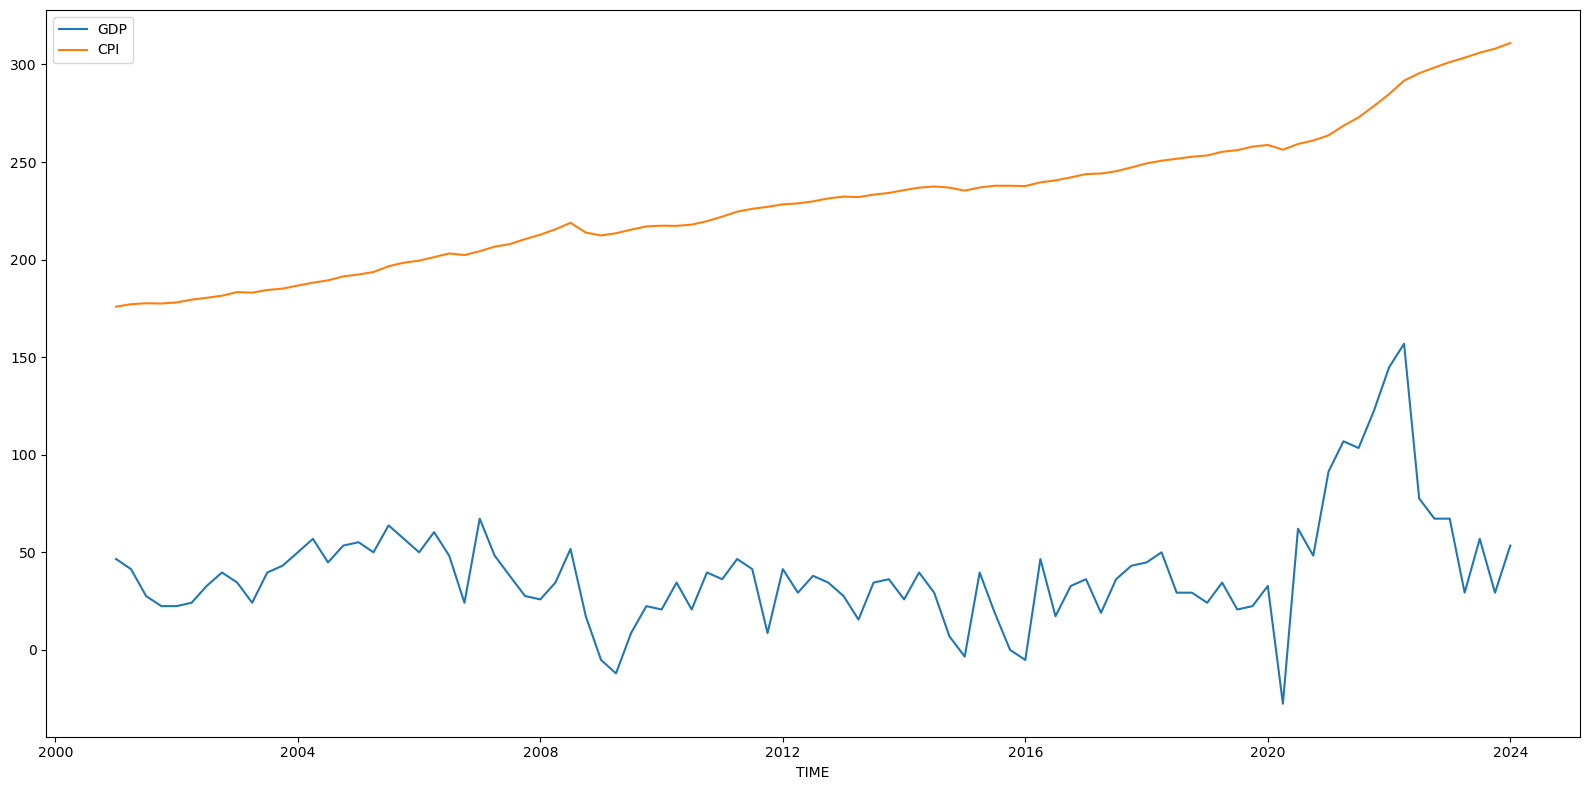

In [21]:
for column in df.columns:
    plt.figure(figsize=(16, 8))
    plt.plot(df[column], label=column.upper())
    plt.plot(df['cpi'], label='CPI')
    plt.xlabel('TIME')
    plt.legend()
    plt.tight_layout()
    plt.show()

/var/folders/bf/jskpgkr57cl65bh_6c8692140000gn/T/ipykernel_9950/1063137788.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x = df[column], y = df['cpi'], legend=True, s = 100, palette={'A':'red', 'B': 'blue'})


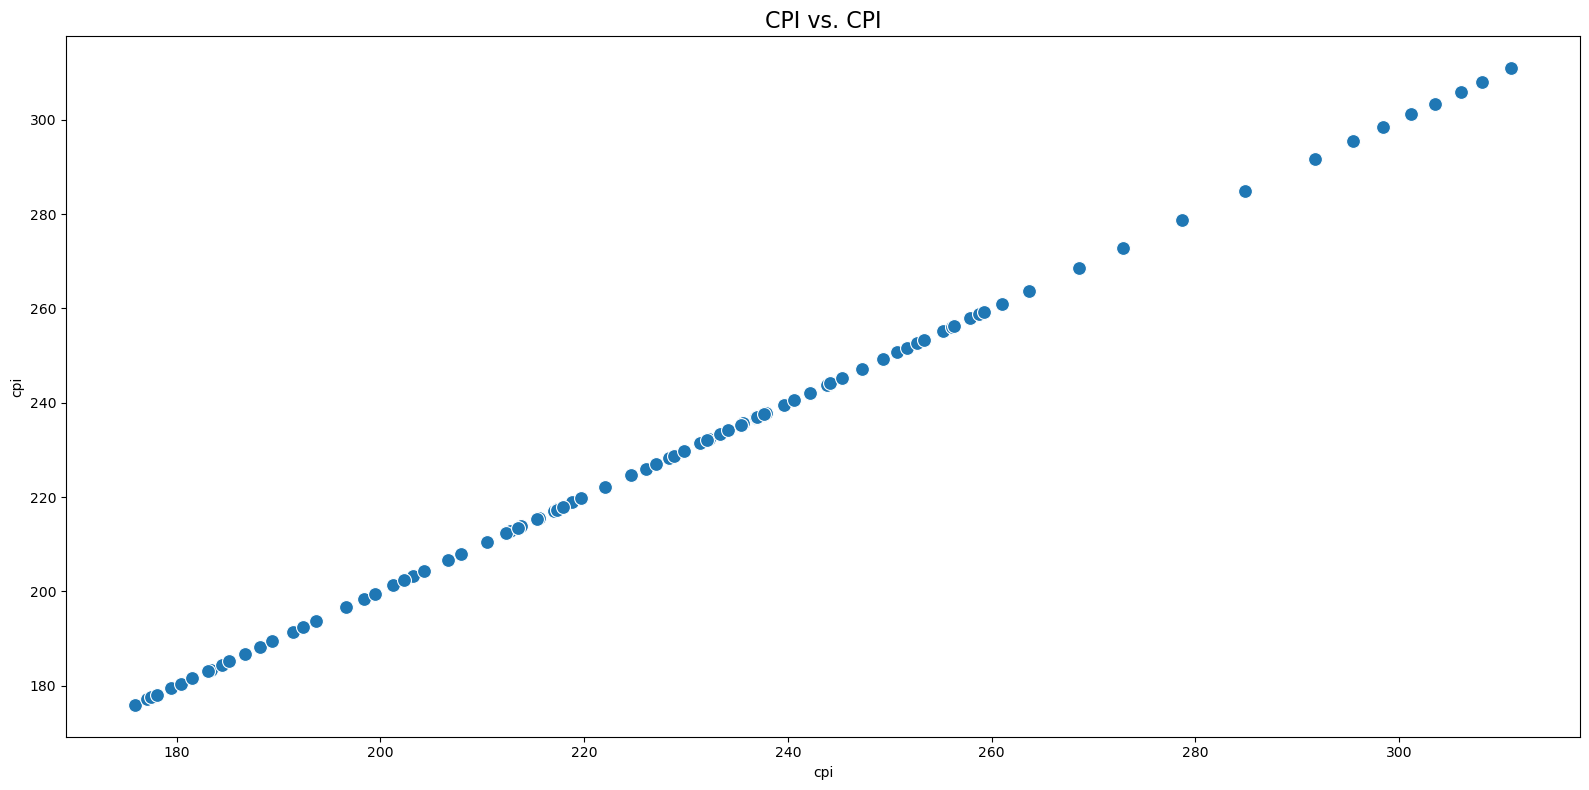

/var/folders/bf/jskpgkr57cl65bh_6c8692140000gn/T/ipykernel_9950/1063137788.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x = df[column], y = df['cpi'], legend=True, s = 100, palette={'A':'red', 'B': 'blue'})


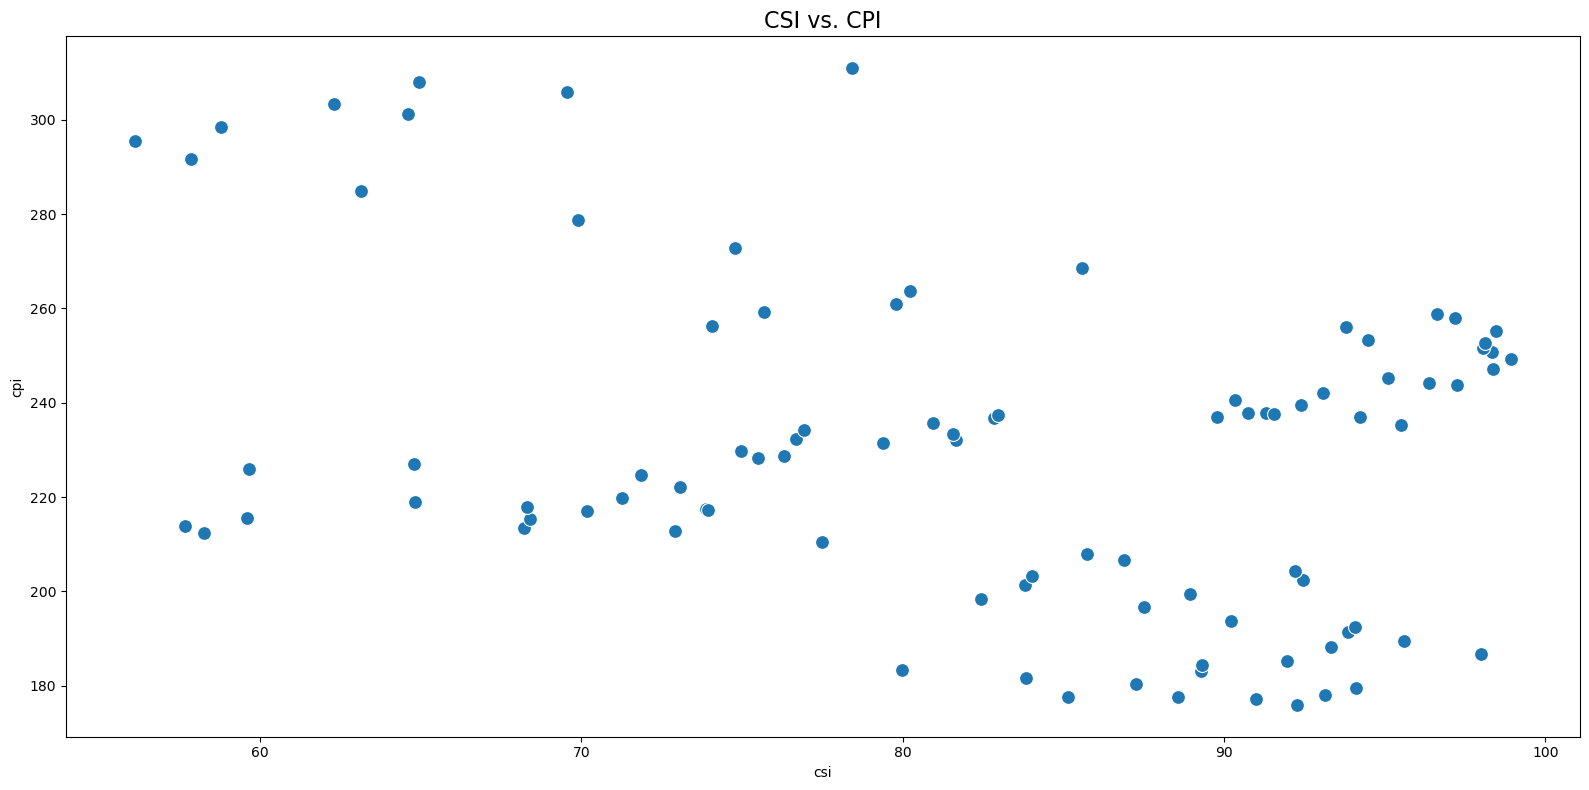

/var/folders/bf/jskpgkr57cl65bh_6c8692140000gn/T/ipykernel_9950/1063137788.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x = df[column], y = df['cpi'], legend=True, s = 100, palette={'A':'red', 'B': 'blue'})


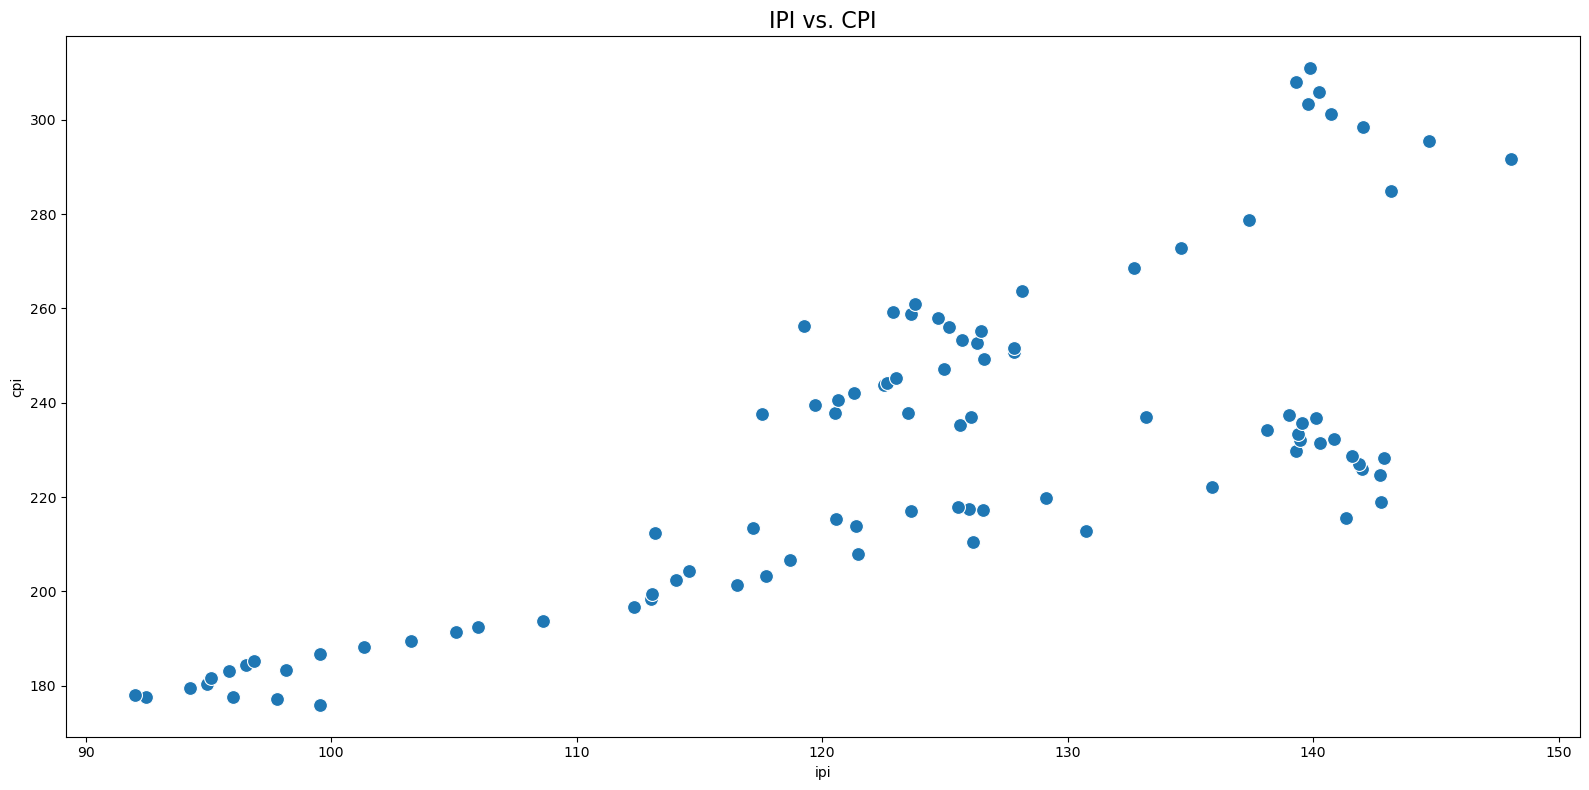

/var/folders/bf/jskpgkr57cl65bh_6c8692140000gn/T/ipykernel_9950/1063137788.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x = df[column], y = df['cpi'], legend=True, s = 100, palette={'A':'red', 'B': 'blue'})


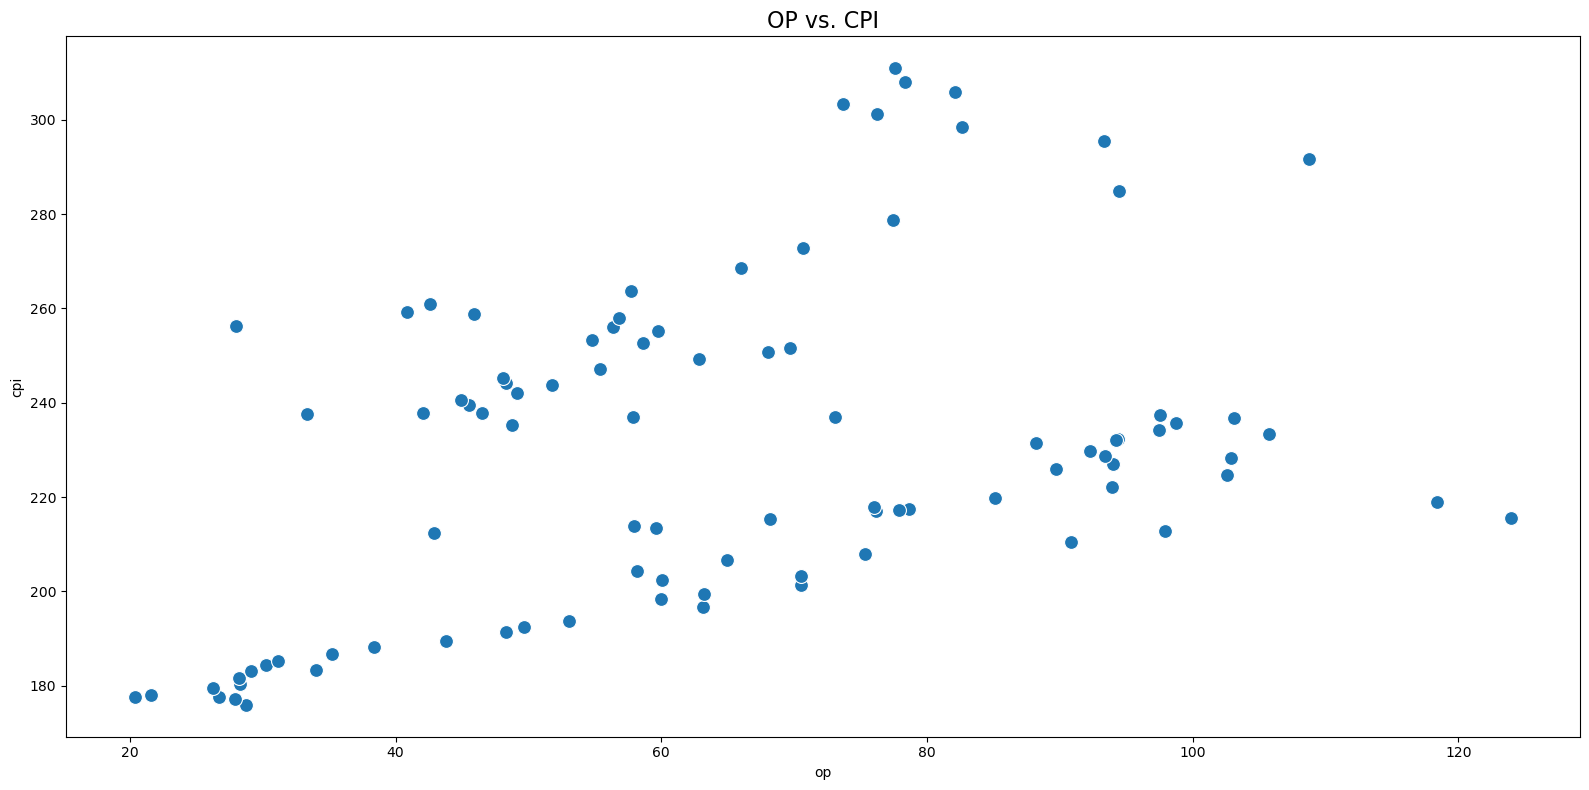

/var/folders/bf/jskpgkr57cl65bh_6c8692140000gn/T/ipykernel_9950/1063137788.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x = df[column], y = df['cpi'], legend=True, s = 100, palette={'A':'red', 'B': 'blue'})


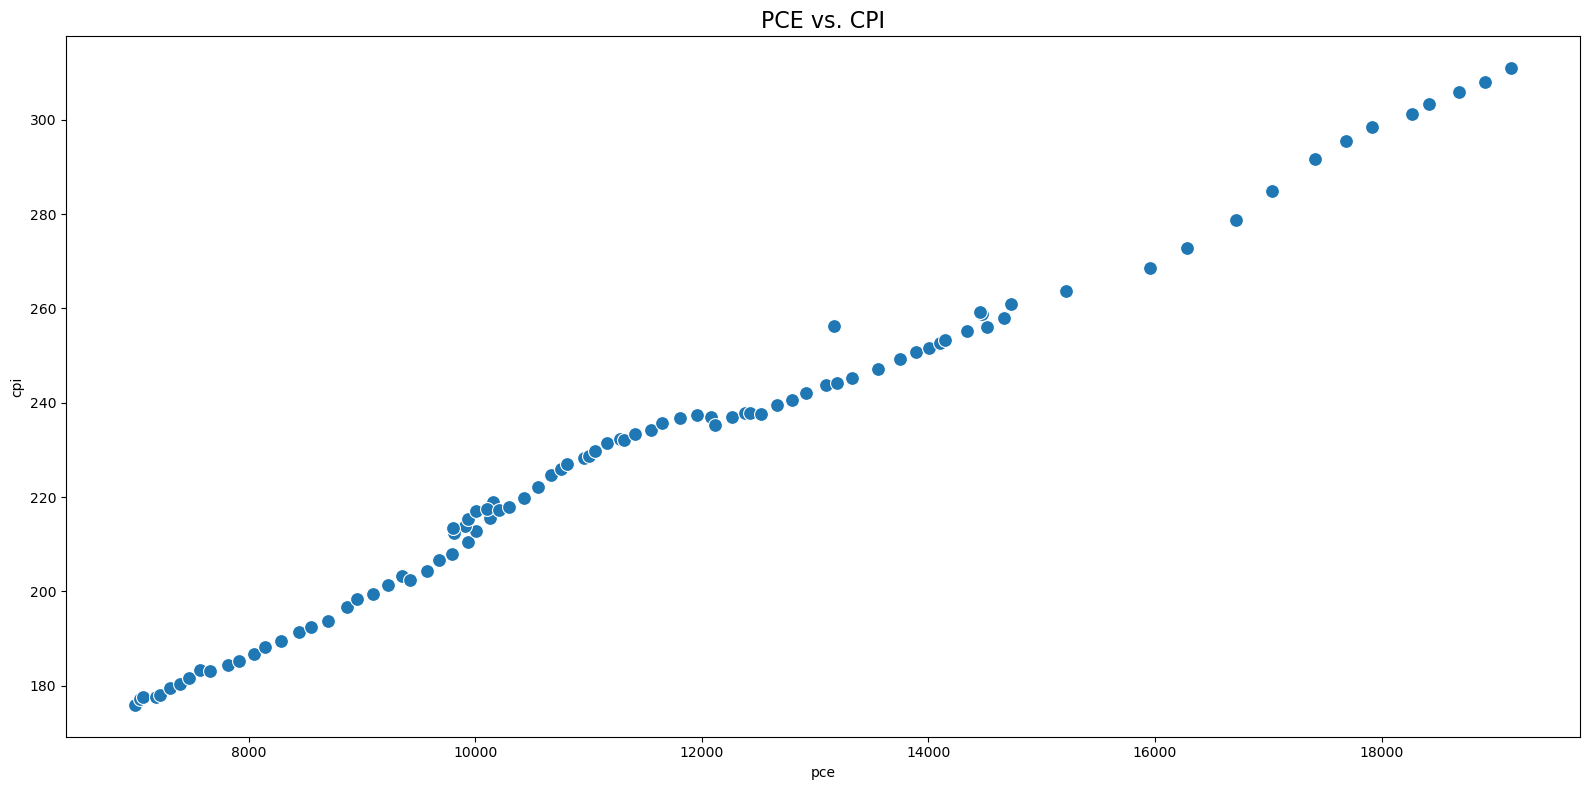

/var/folders/bf/jskpgkr57cl65bh_6c8692140000gn/T/ipykernel_9950/1063137788.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x = df[column], y = df['cpi'], legend=True, s = 100, palette={'A':'red', 'B': 'blue'})


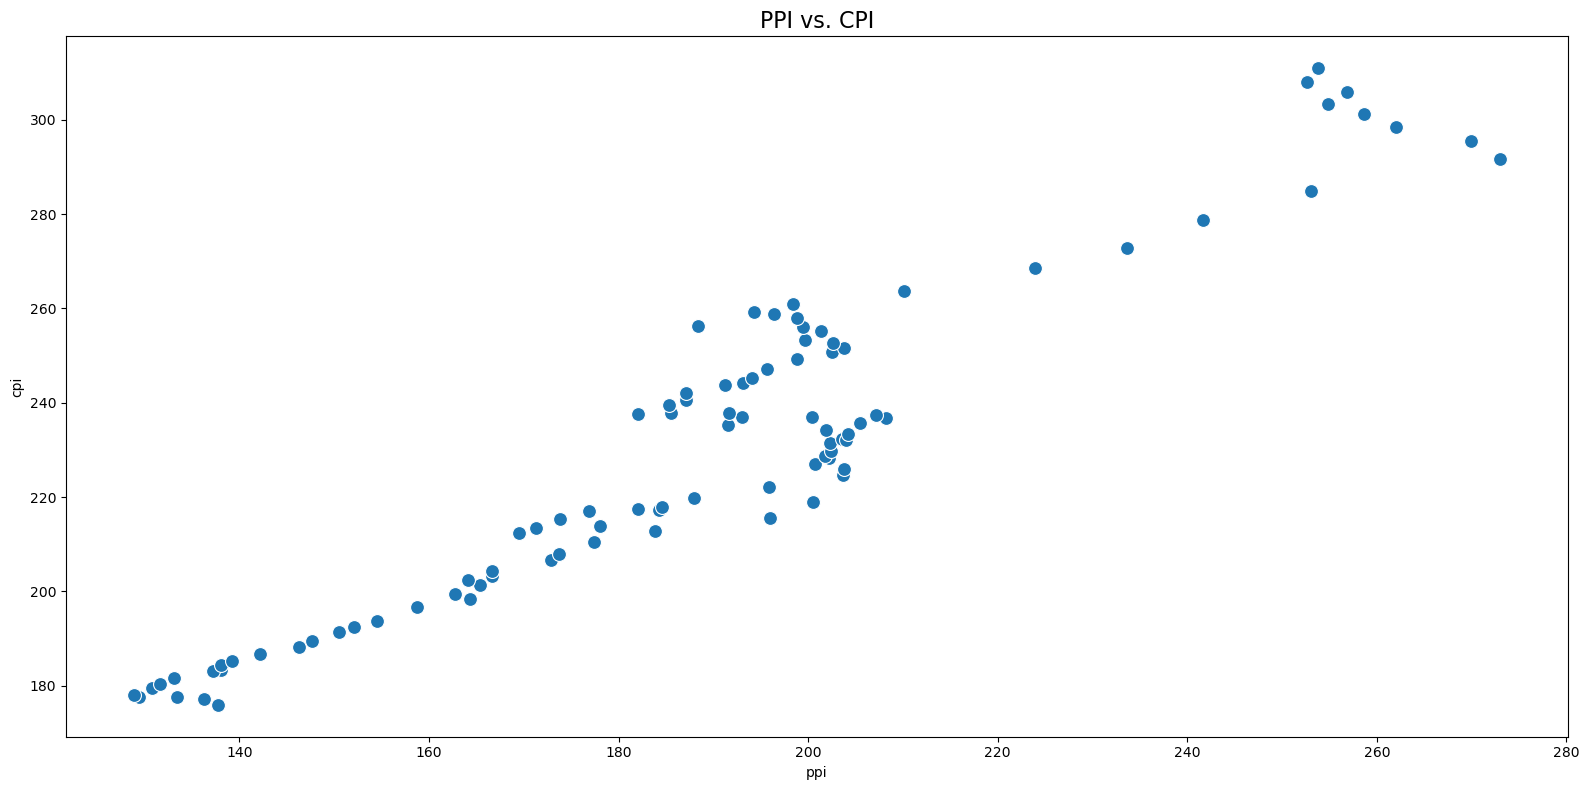

/var/folders/bf/jskpgkr57cl65bh_6c8692140000gn/T/ipykernel_9950/1063137788.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x = df[column], y = df['cpi'], legend=True, s = 100, palette={'A':'red', 'B': 'blue'})


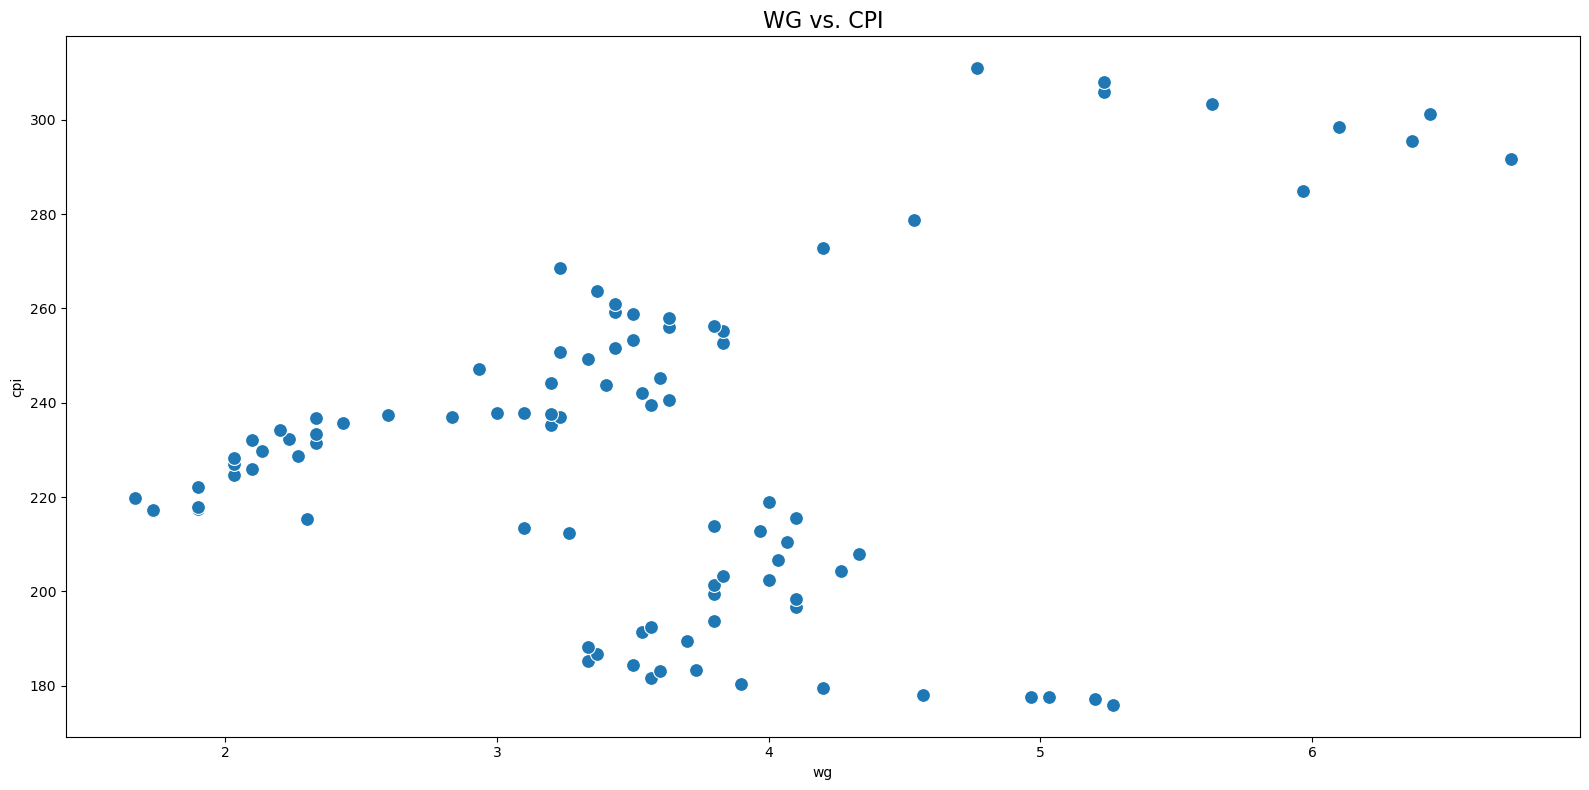

/var/folders/bf/jskpgkr57cl65bh_6c8692140000gn/T/ipykernel_9950/1063137788.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x = df[column], y = df['cpi'], legend=True, s = 100, palette={'A':'red', 'B': 'blue'})


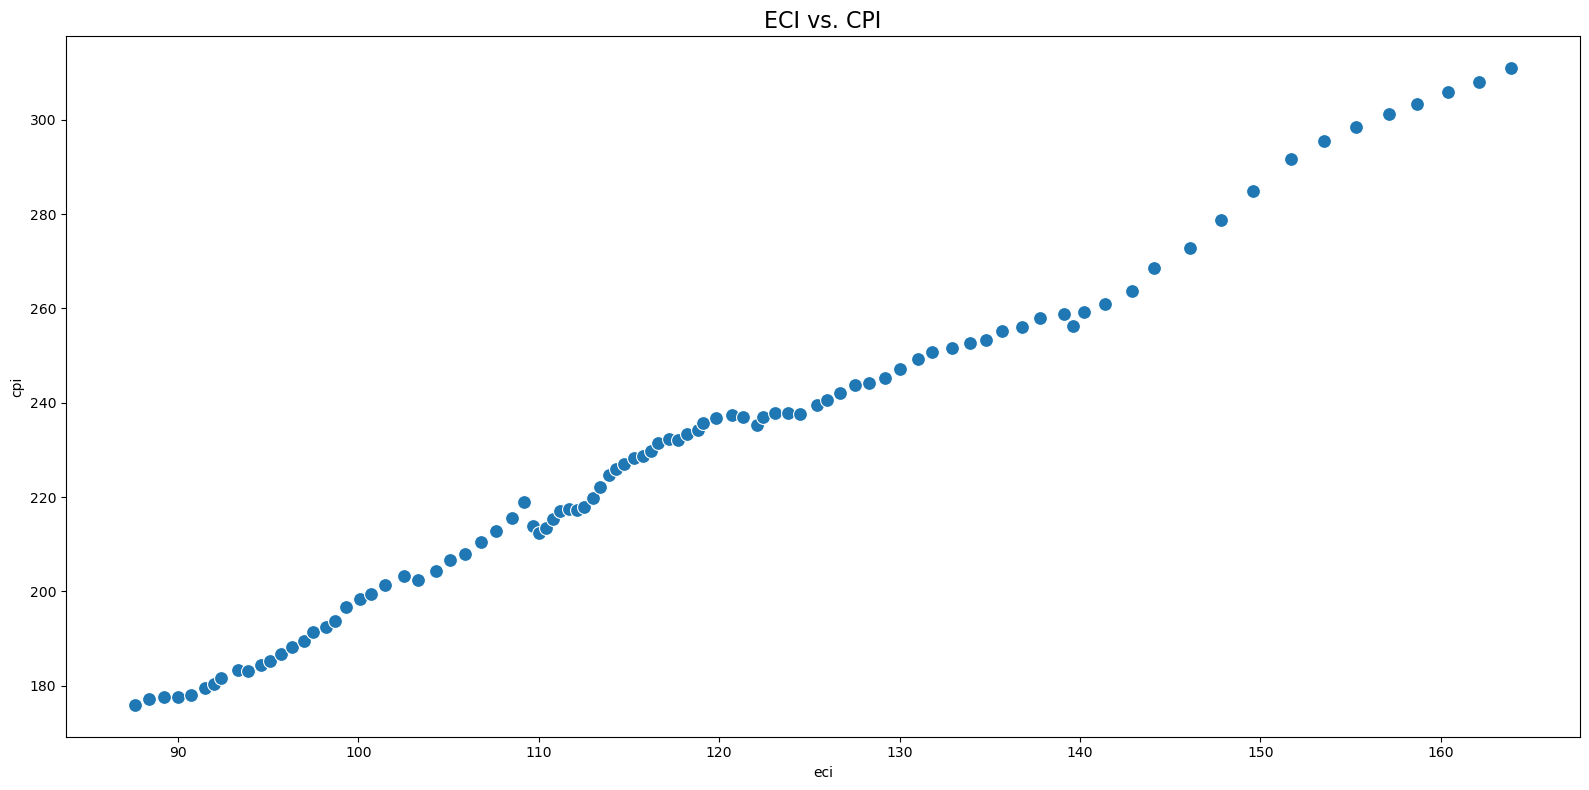

/var/folders/bf/jskpgkr57cl65bh_6c8692140000gn/T/ipykernel_9950/1063137788.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x = df[column], y = df['cpi'], legend=True, s = 100, palette={'A':'red', 'B': 'blue'})


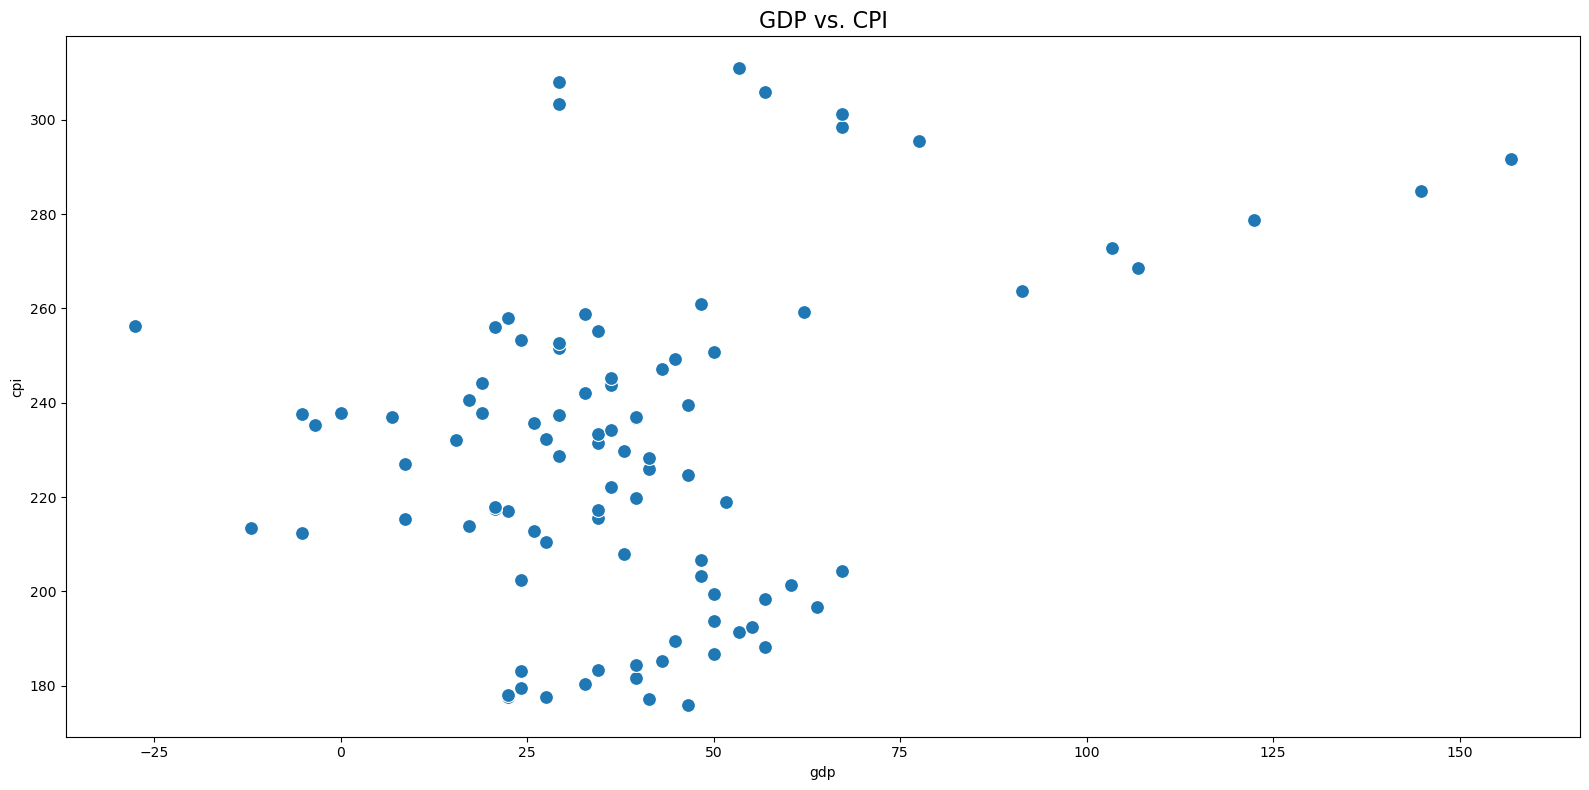

In [22]:
for column in df.columns:
    plt.figure(figsize=(16, 8))
    sns.scatterplot(data=df, x = df[column], y = df['cpi'], legend=True, s = 100, palette={'A':'red', 'B': 'blue'})
    plt.title(f"{column.upper()} vs. CPI", fontsize=16)
    plt.tight_layout()
    plt.show()

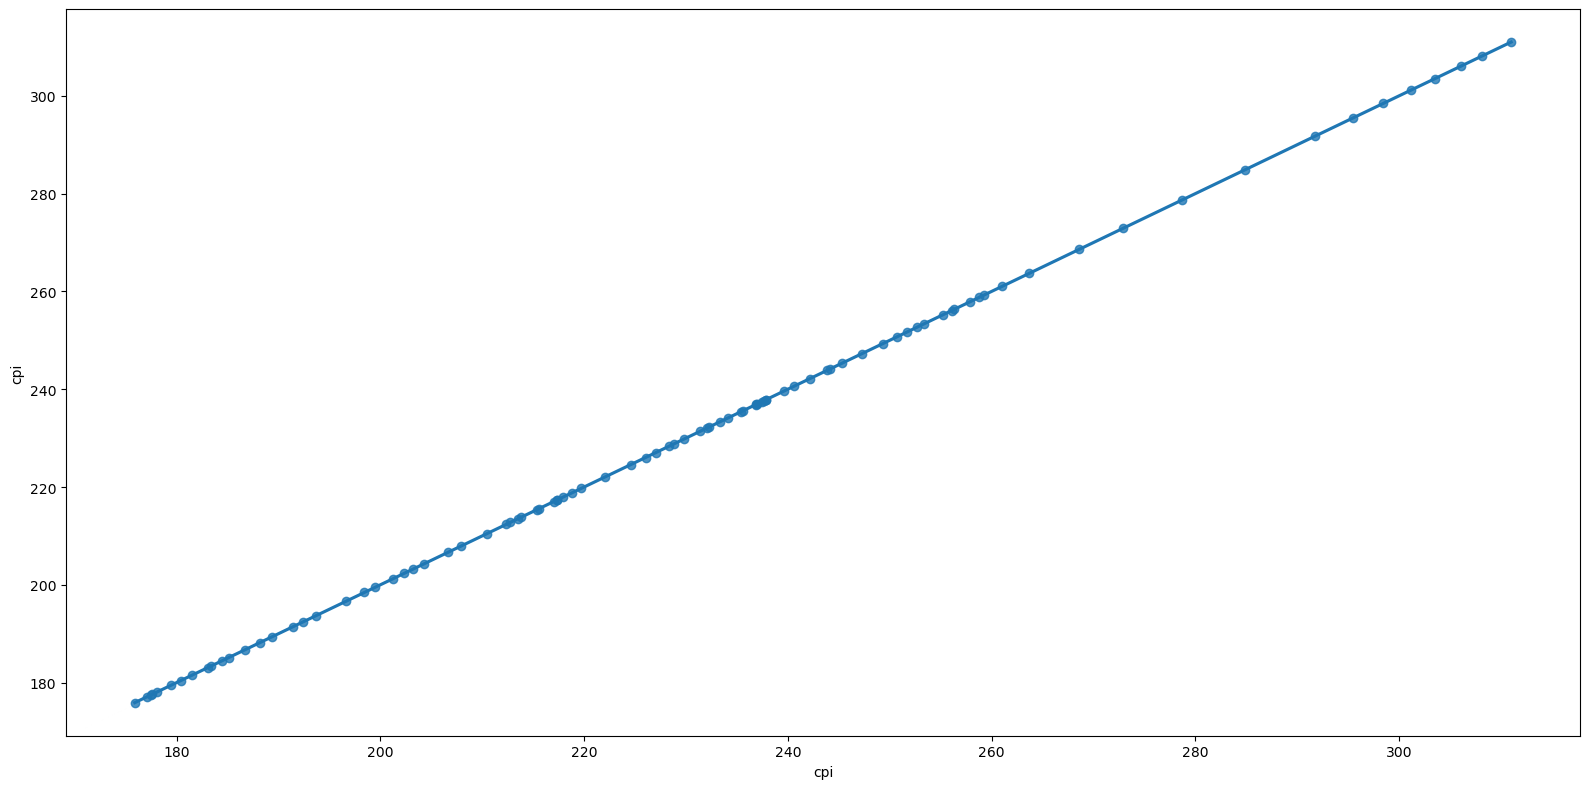

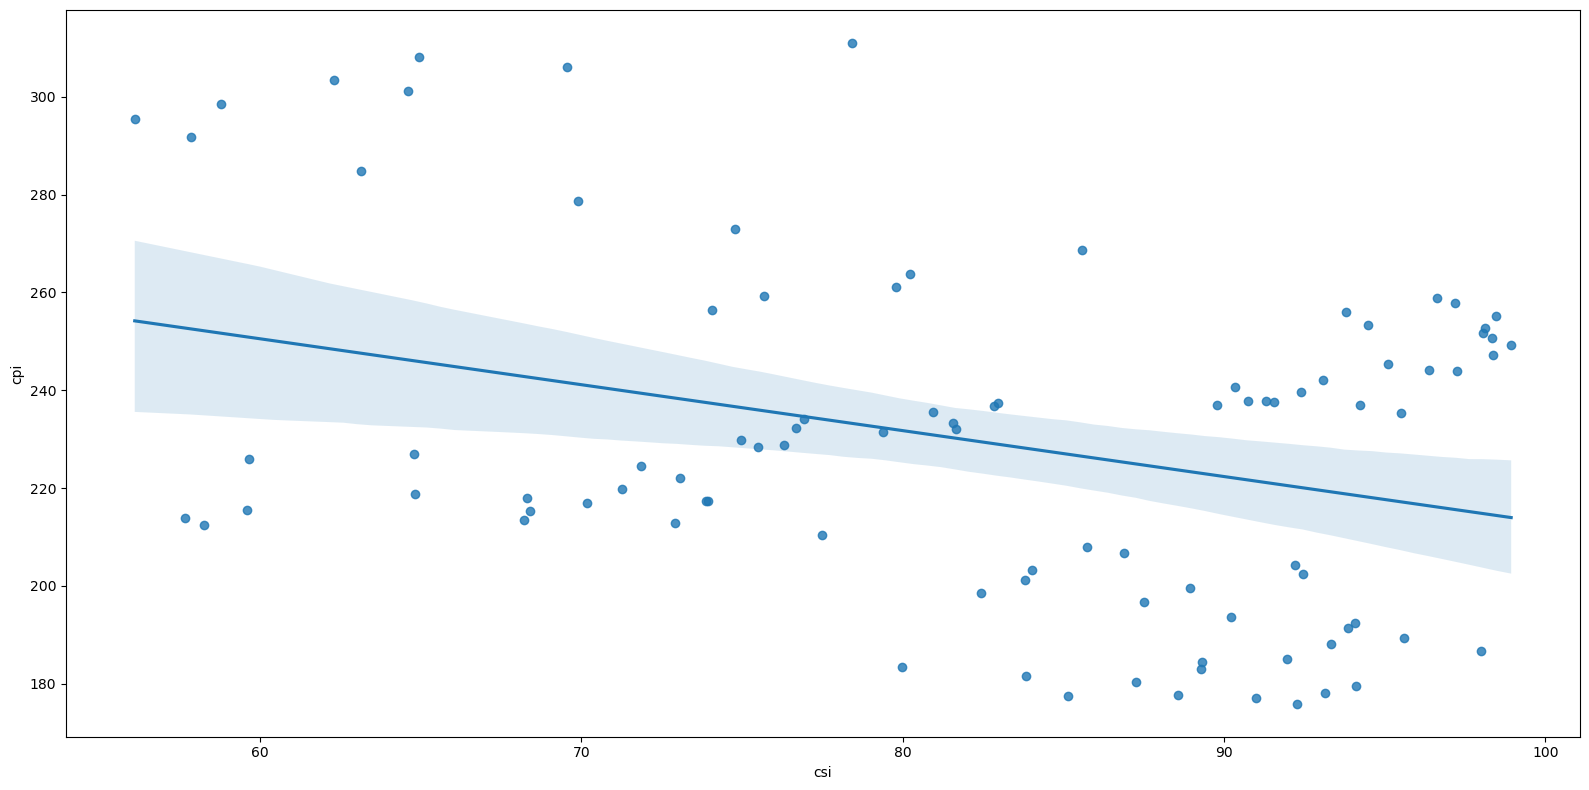

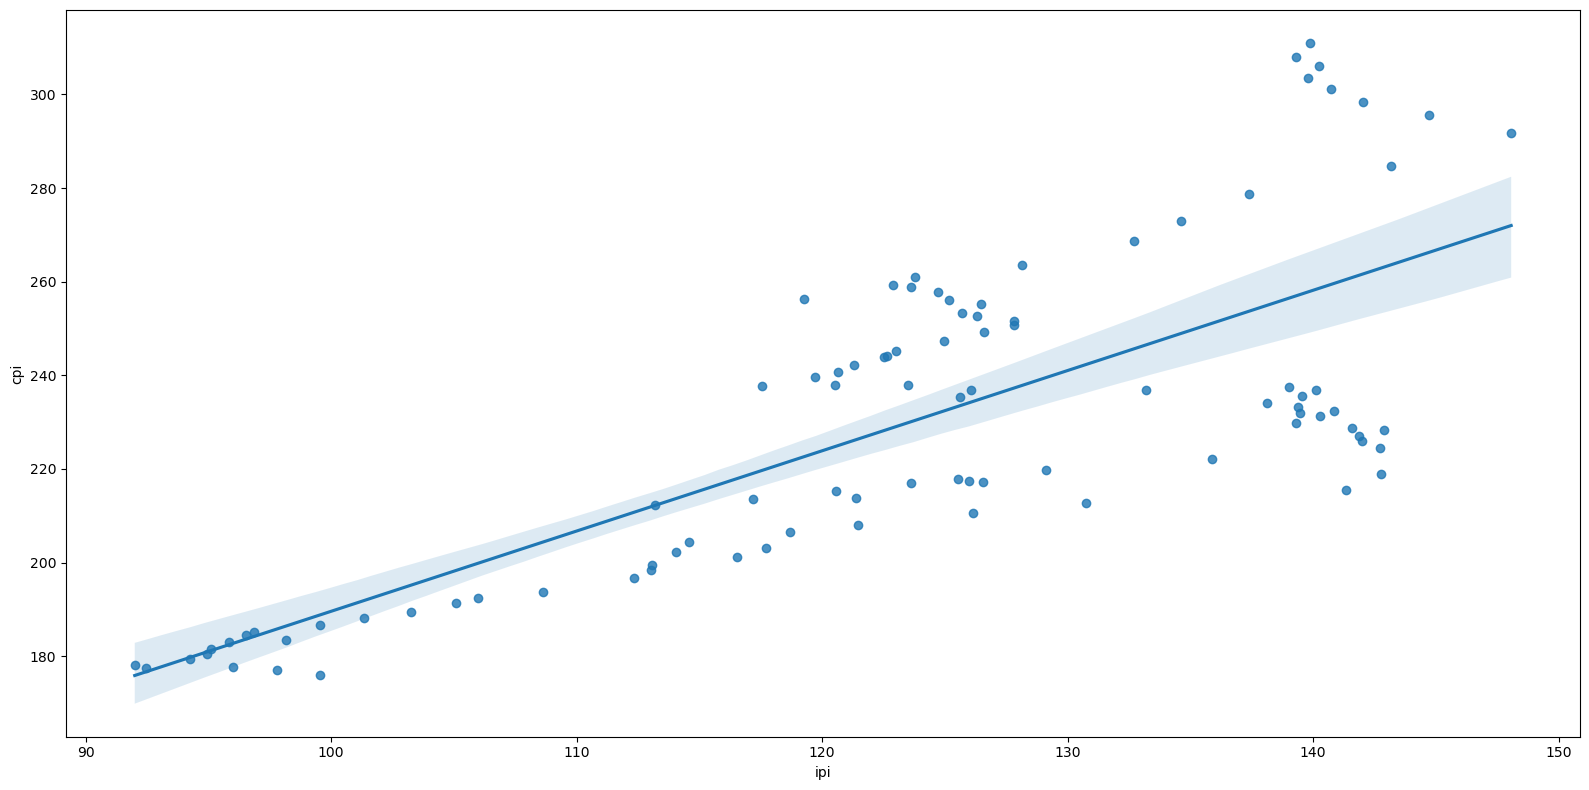

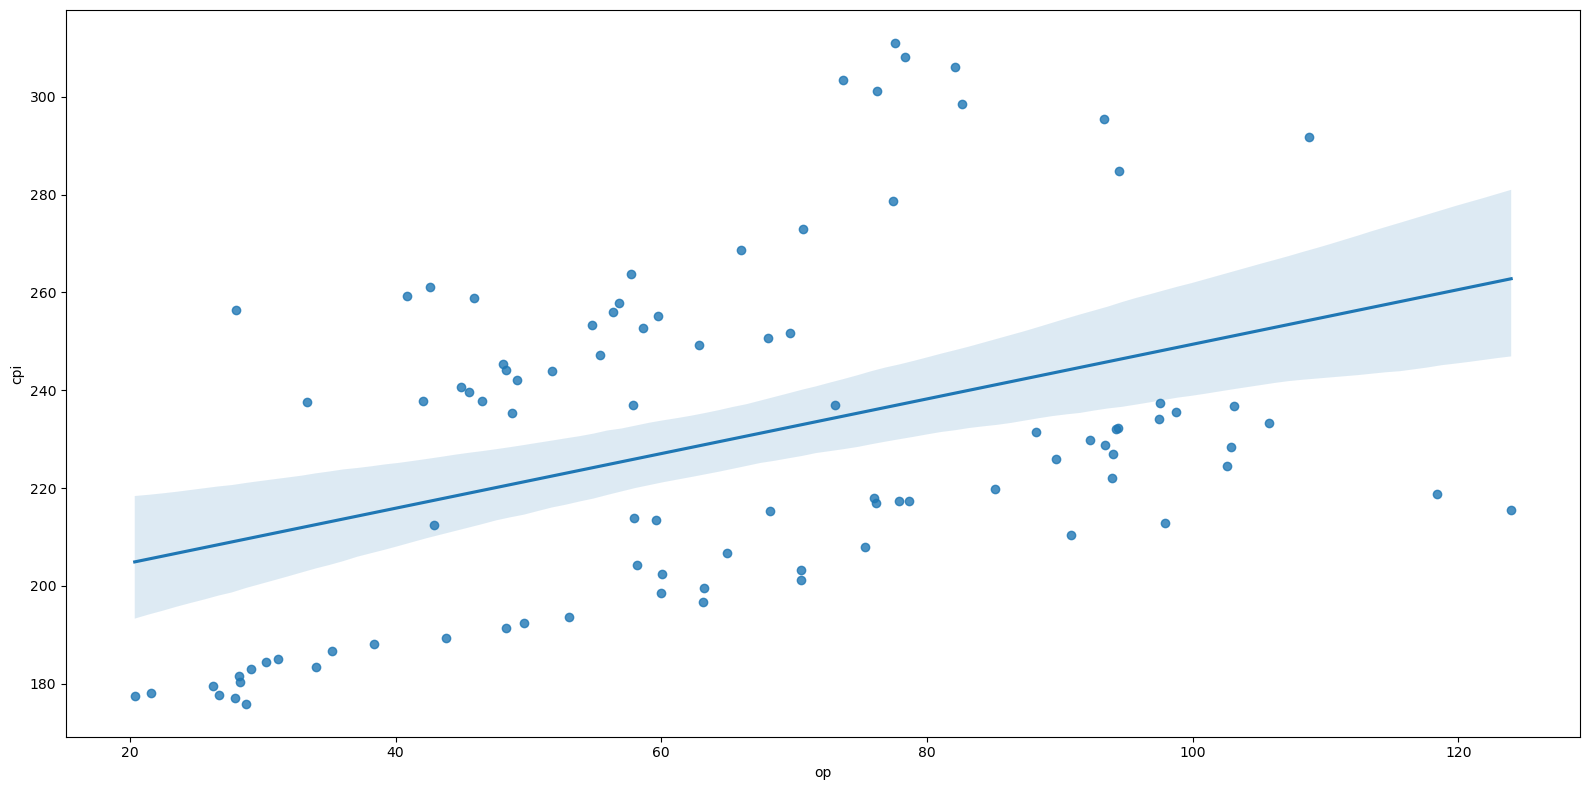

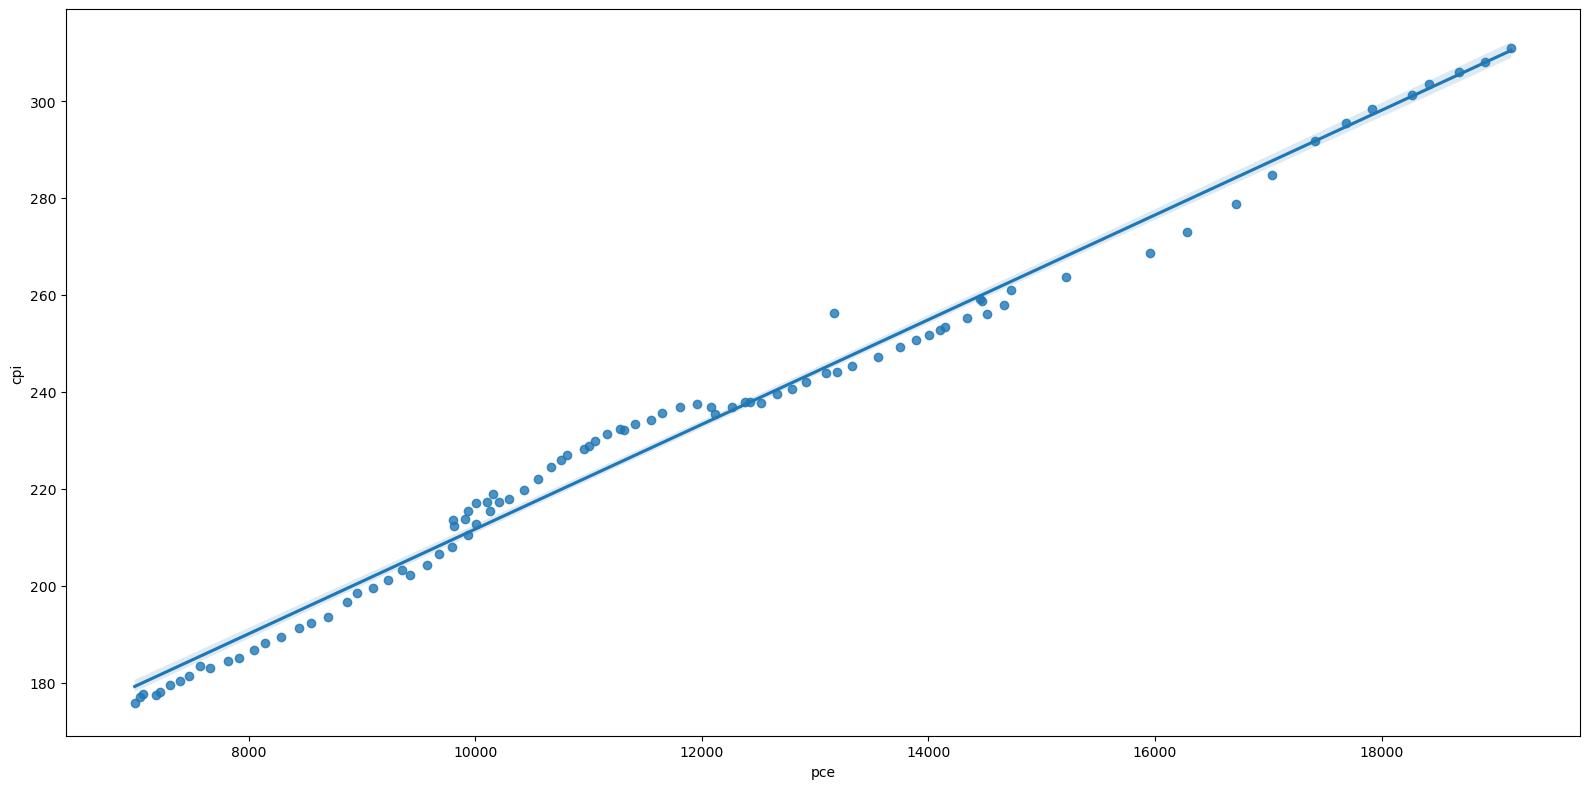

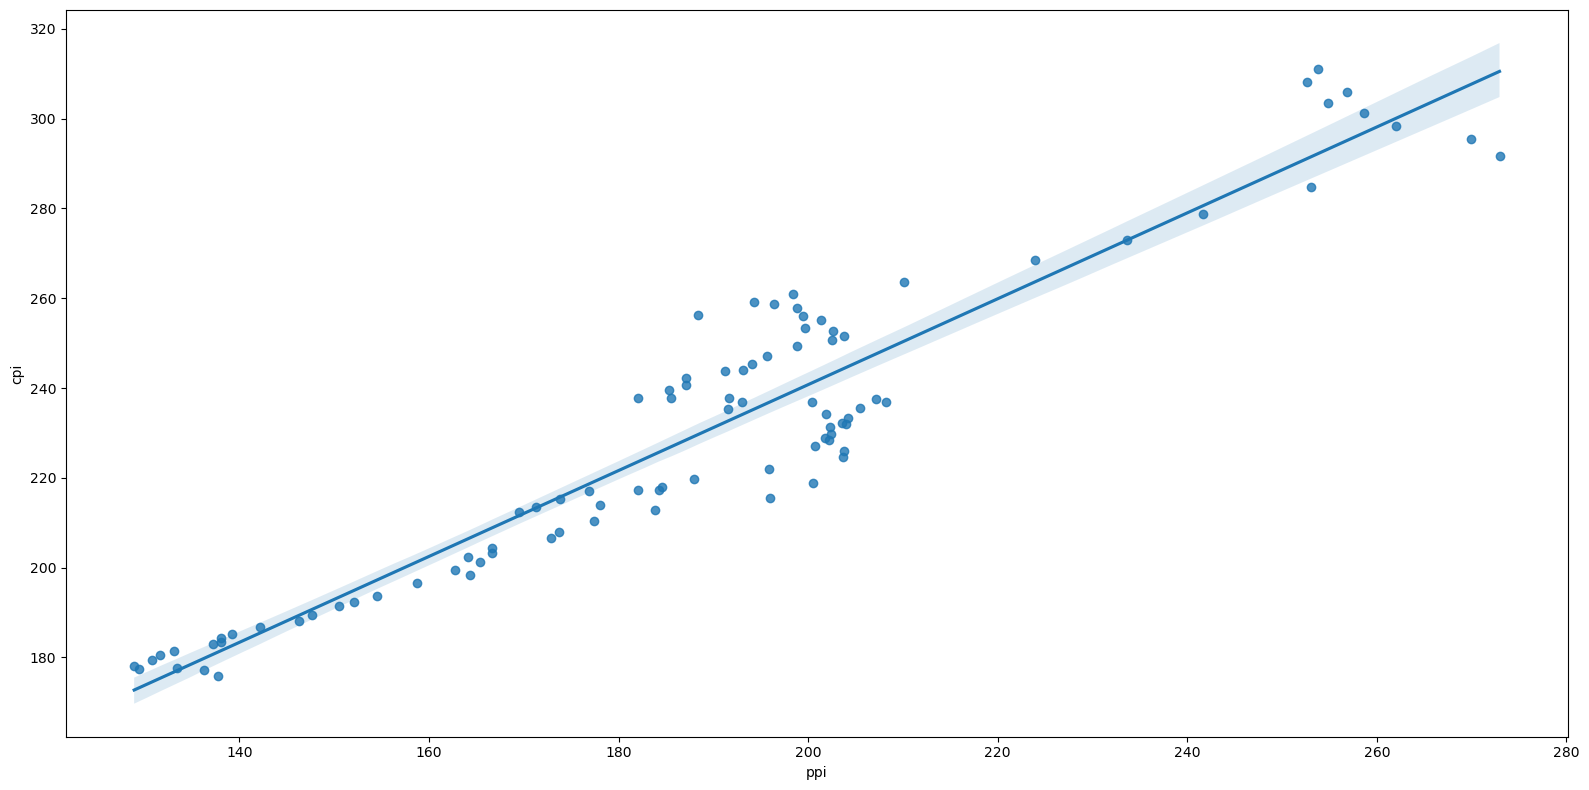

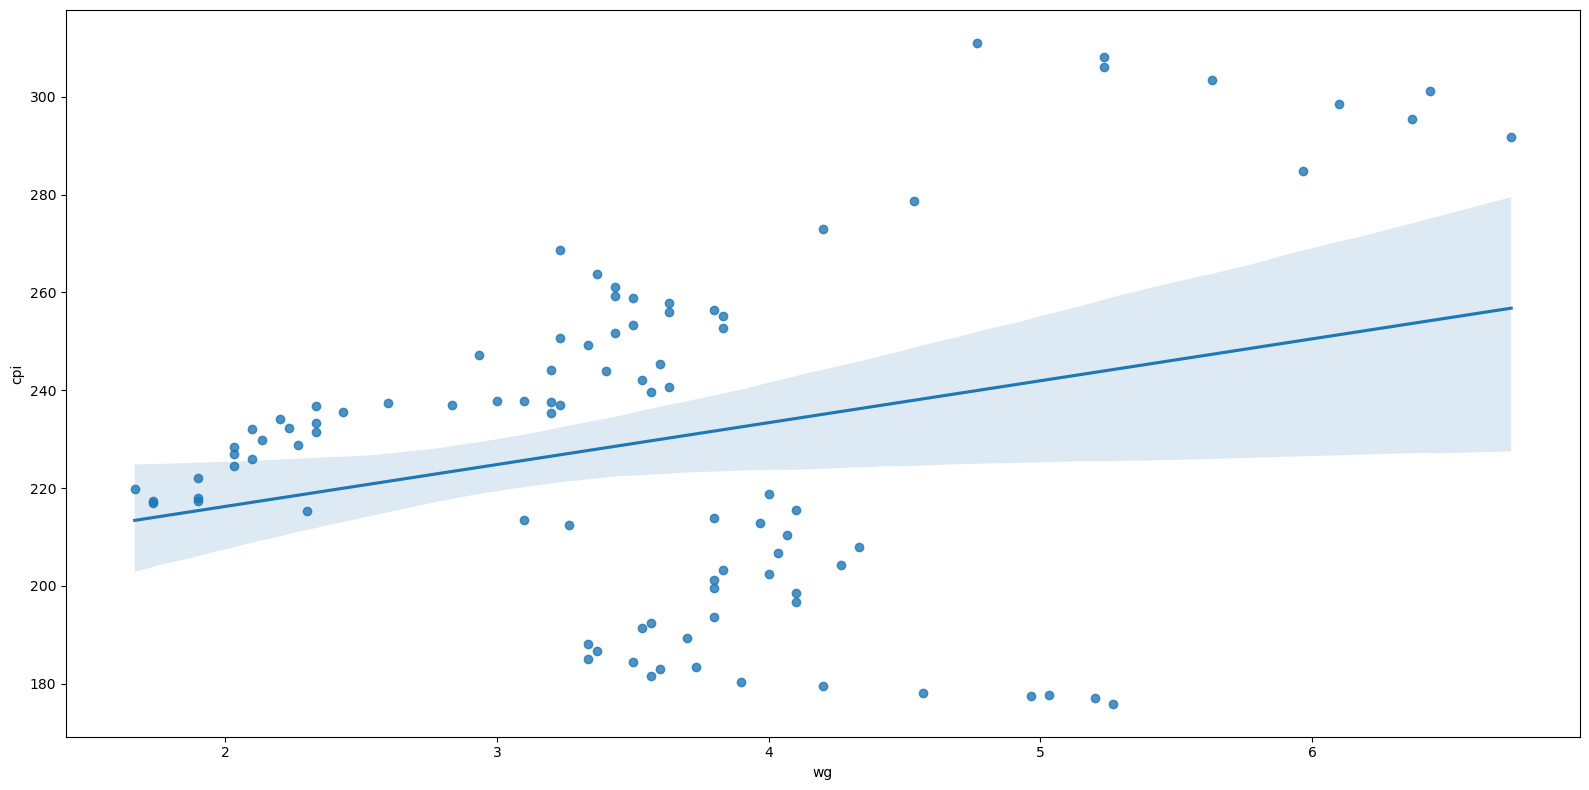

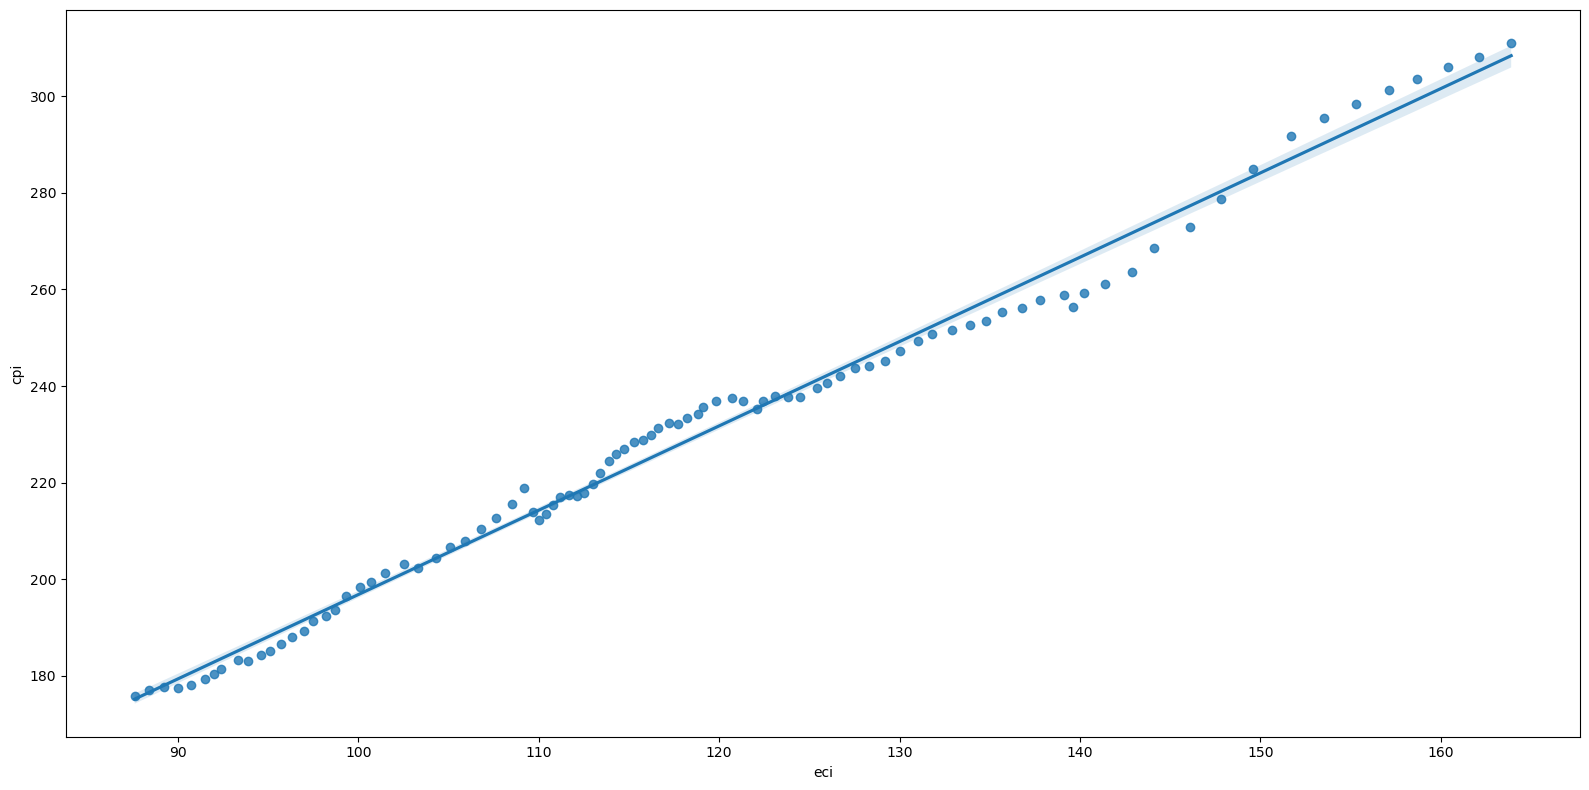

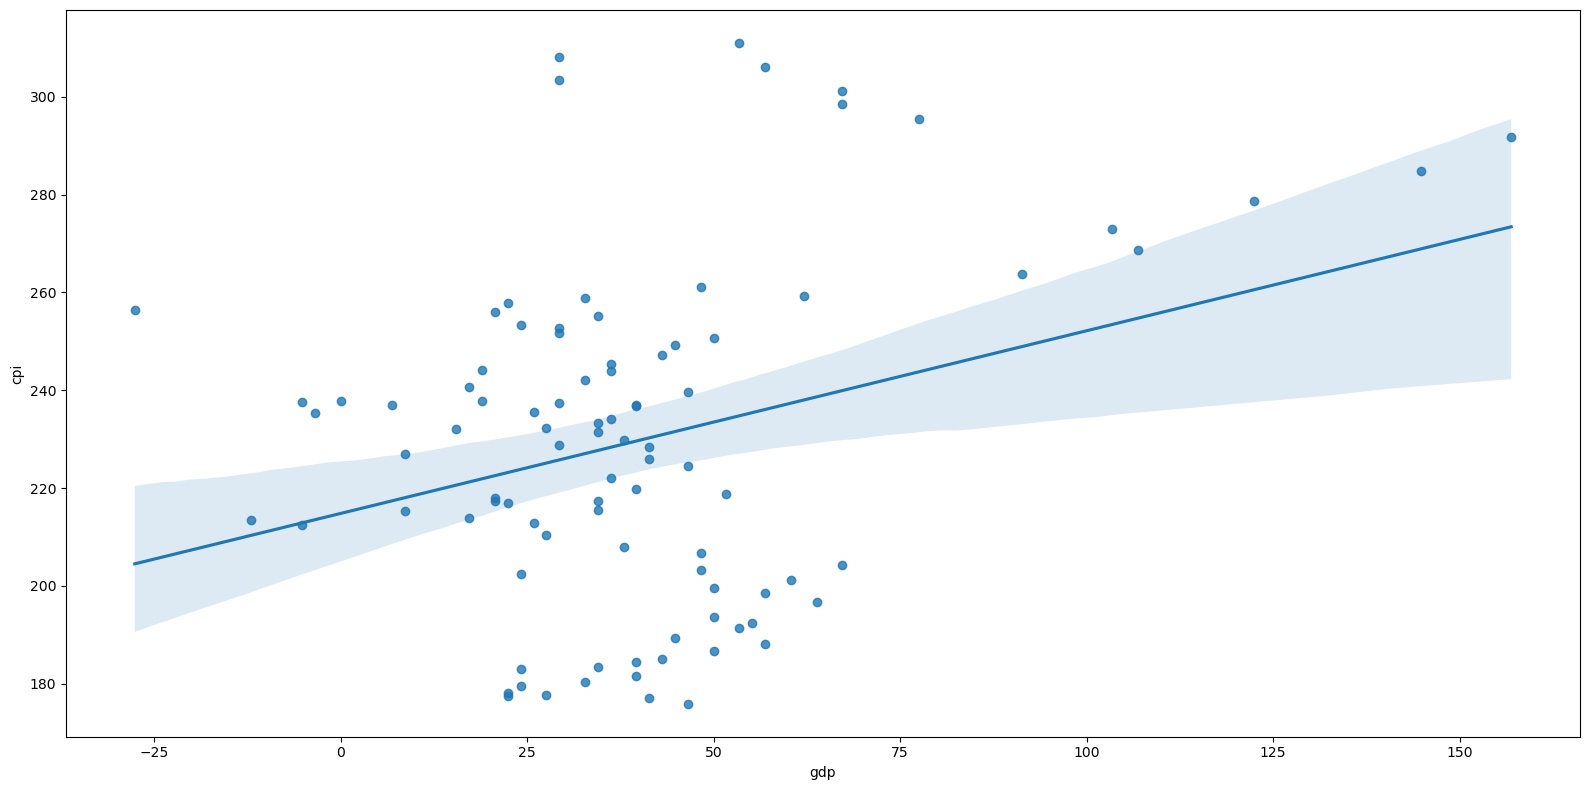

In [23]:
for column in df.columns:
    plt.figure(figsize=(16, 8))
    sns.regplot(data=df, x = df[column], y = df['cpi'])
    plt.tight_layout()
    plt.show()

In [24]:
# Identify the indices with the strongest correlation with CPI
cpi_correlations = corr_matrix['cpi'].sort_values(ascending=False)
print("Indices strongly correlated with CPI:\n", cpi_correlations)

Indices strongly correlated with CPI:
 cpi    1.000000
eci    0.994817
pce    0.993714
ppi    0.948008
ipi    0.752755
op     0.401774
gdp    0.309814
wg     0.275584
csi   -0.331033
Name: cpi, dtype: float64


In [25]:
df['cpi'].diff() / df['cpi'].shift(1) * 100

DATE
2001-01-01         NaN
2001-04-01    0.701156
2001-07-01    0.282273
2001-10-01   -0.075061
2002-01-01    0.319249
                ...   
2023-01-01    0.925476
2023-04-01    0.751542
2023-07-01    0.846112
2023-10-01    0.674652
2024-01-01    0.938227
Freq: QS-JAN, Name: cpi, Length: 93, dtype: float64

In [26]:
df['inflation'] = df['cpi'].pct_change()*100
df

,cpi,csi,ipi,op,pce,ppi,wg,eci,gdp,inflation
DATE,,,,,,,,,,
2001-01-01,175.900000,92.266667,99.566667,28.769013,6995.300000,137.766667,5.266667,87.6,46.55172,NaN
2001-04-01,177.133333,91.000000,97.800000,27.888399,7042.233333,136.233333,5.200000,88.4,41.37931,0.701156
2001-07-01,177.633333,88.566667,96.000000,26.704912,7070.333333,133.366667,5.033333,89.2,27.58621,0.282273
2001-10-01,177.500000,85.133333,92.466667,20.370715,7187.300000,129.400000,4.966667,90.0,22.41379,-0.075061
2002-01-01,178.066667,93.133333,92.000000,21.630329,7217.733333,128.900000,4.566667,90.7,22.41379,0.319249
...,...,...,...,...,...,...,...,...,...,...
2023-01-01,301.203000,64.600000,140.733333,76.209042,18269.566667,258.652667,6.433333,157.1,67.24138,0.925476
2023-04-01,303.466667,62.300000,139.800000,73.702265,18419.000000,254.812667,5.633333,158.7,29.31034,0.751542
2023-07-01,306.034333,69.566667,140.233333,82.126743,18679.500000,256.816333,5.233333,160.4,56.89655,0.846112


In [27]:
def check_inflation(df, col):
    return df[df[col] > 2.4]

In [28]:
inflation_periods = check_inflation(df, 'inflation')['inflation']
inflation_periods

DATE
2022-04-01    2.415627
Freq: QS-JAN, Name: inflation, dtype: float64

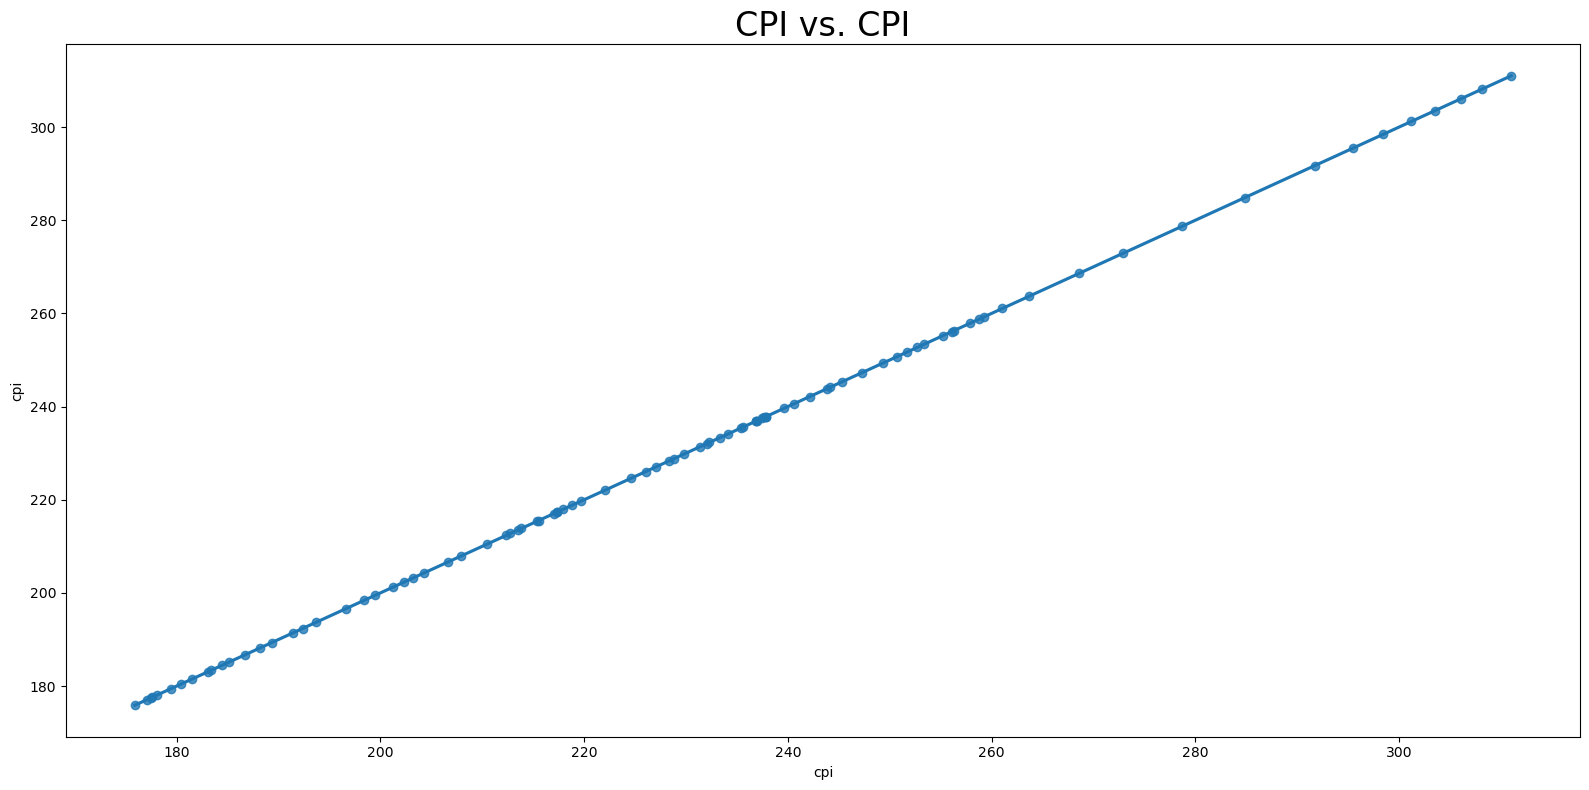

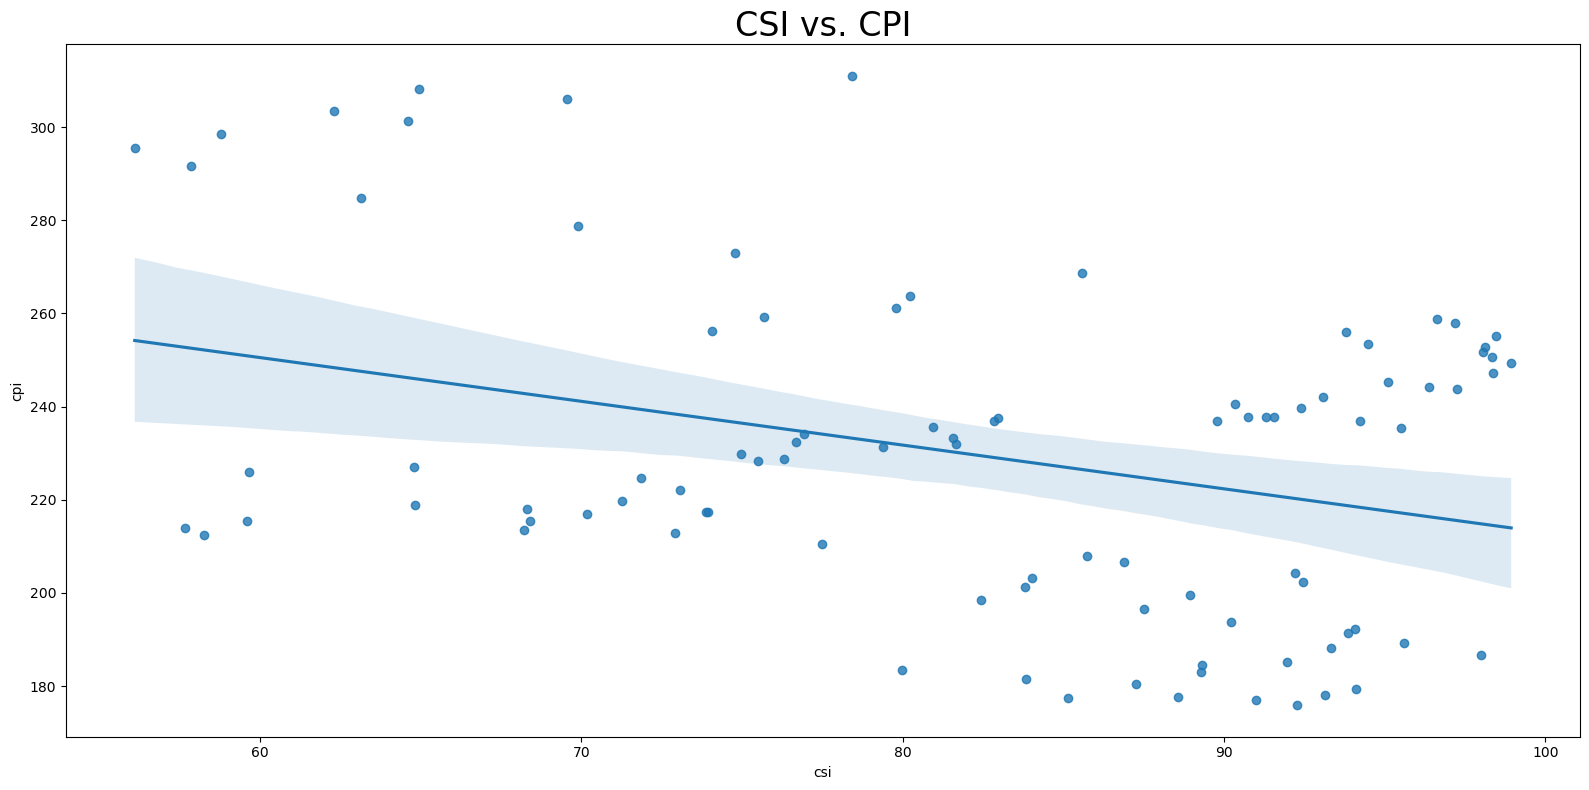

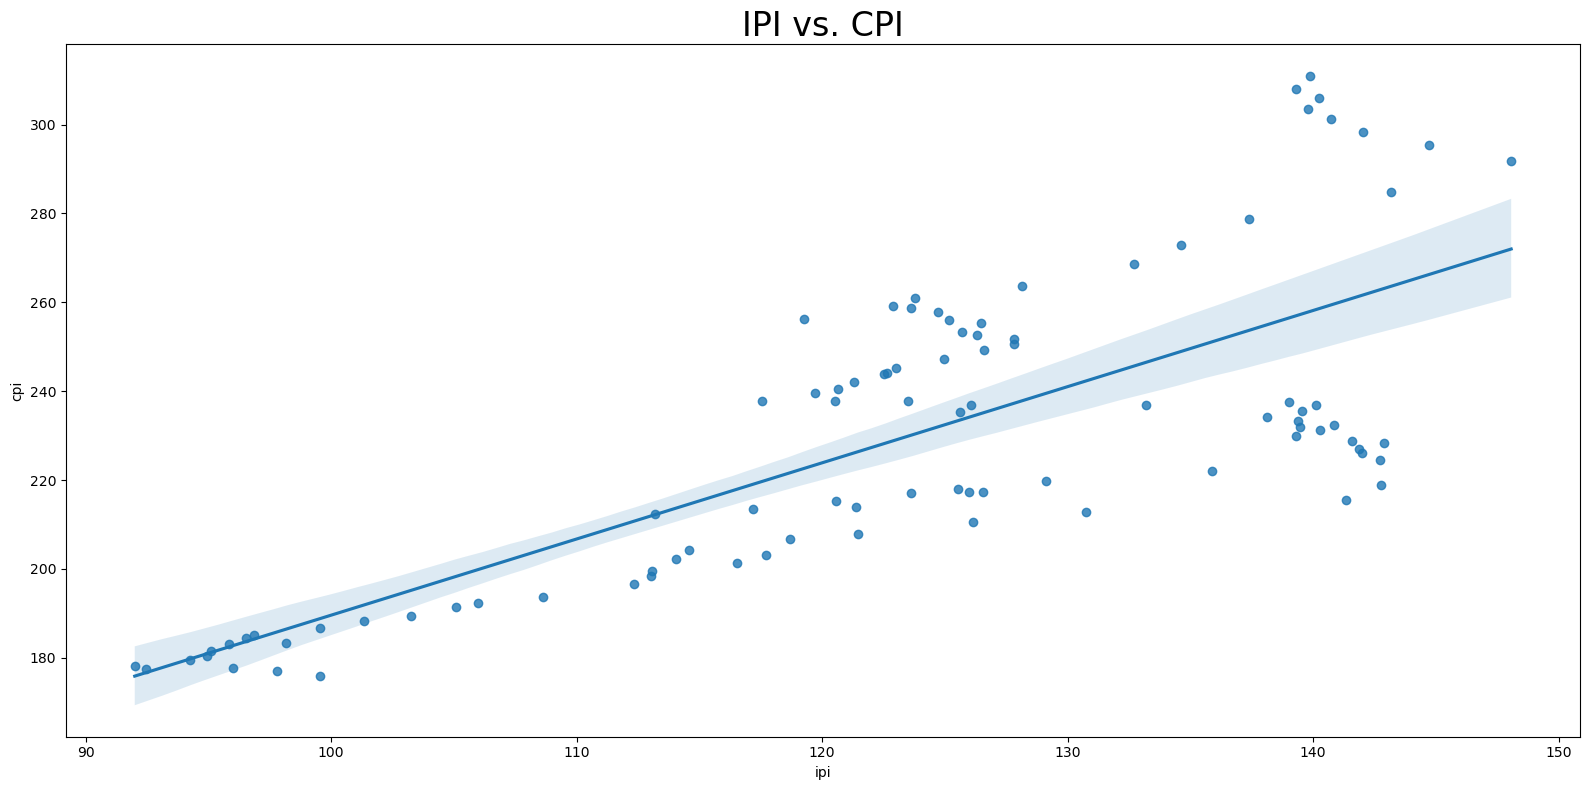

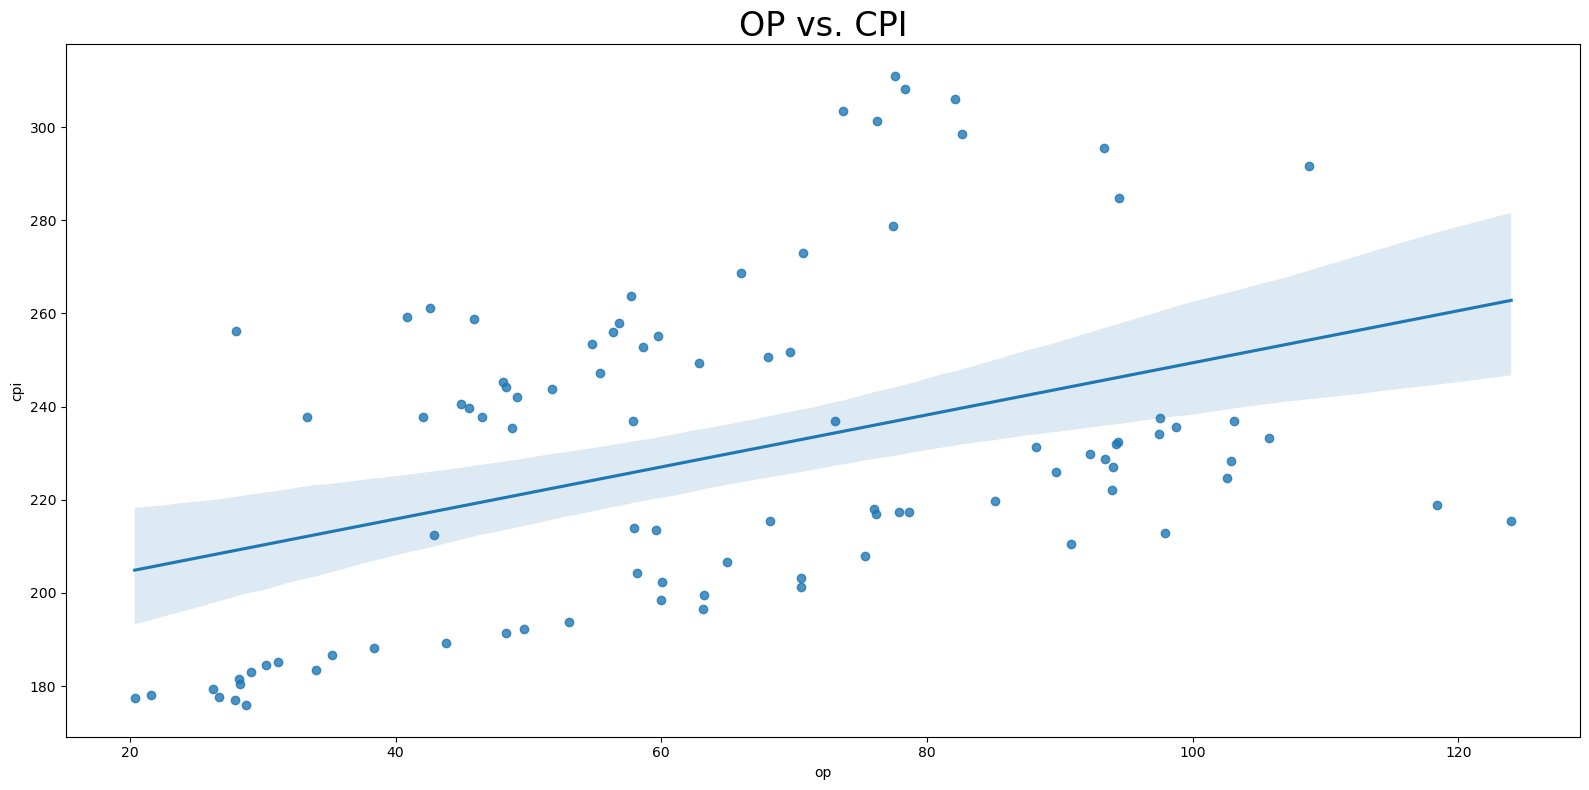

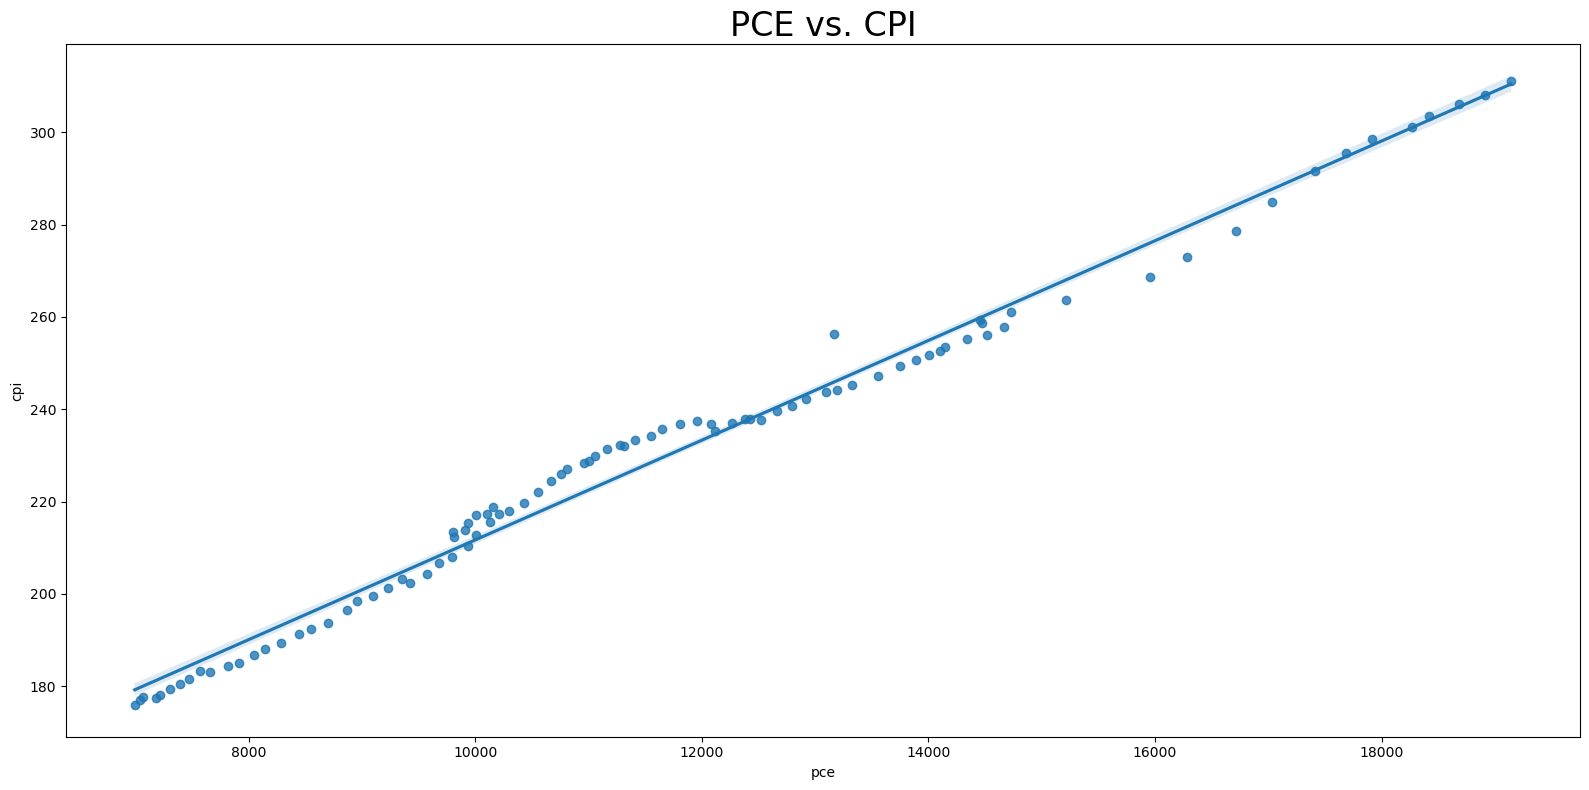

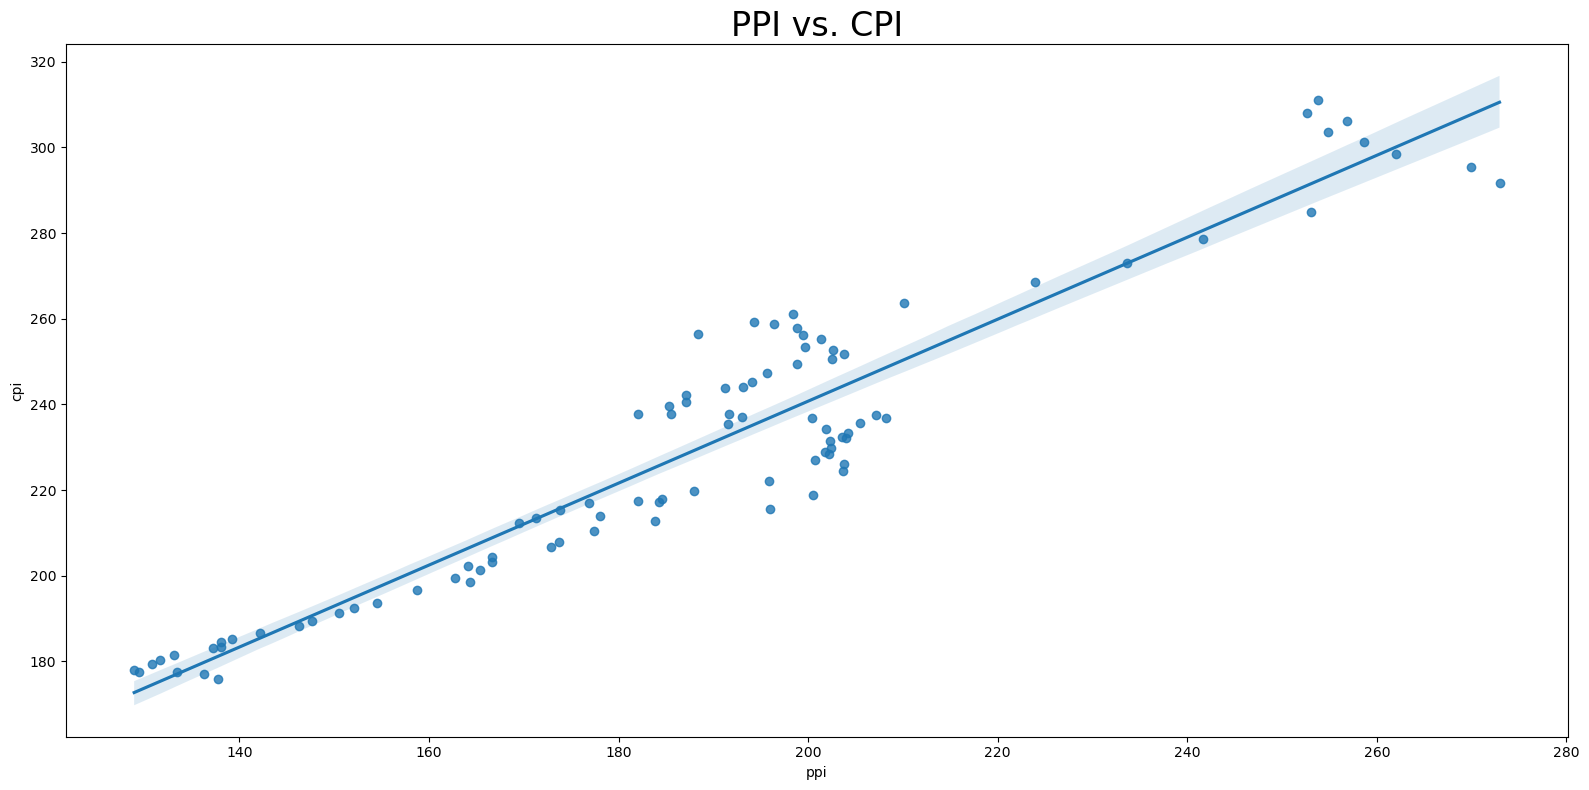

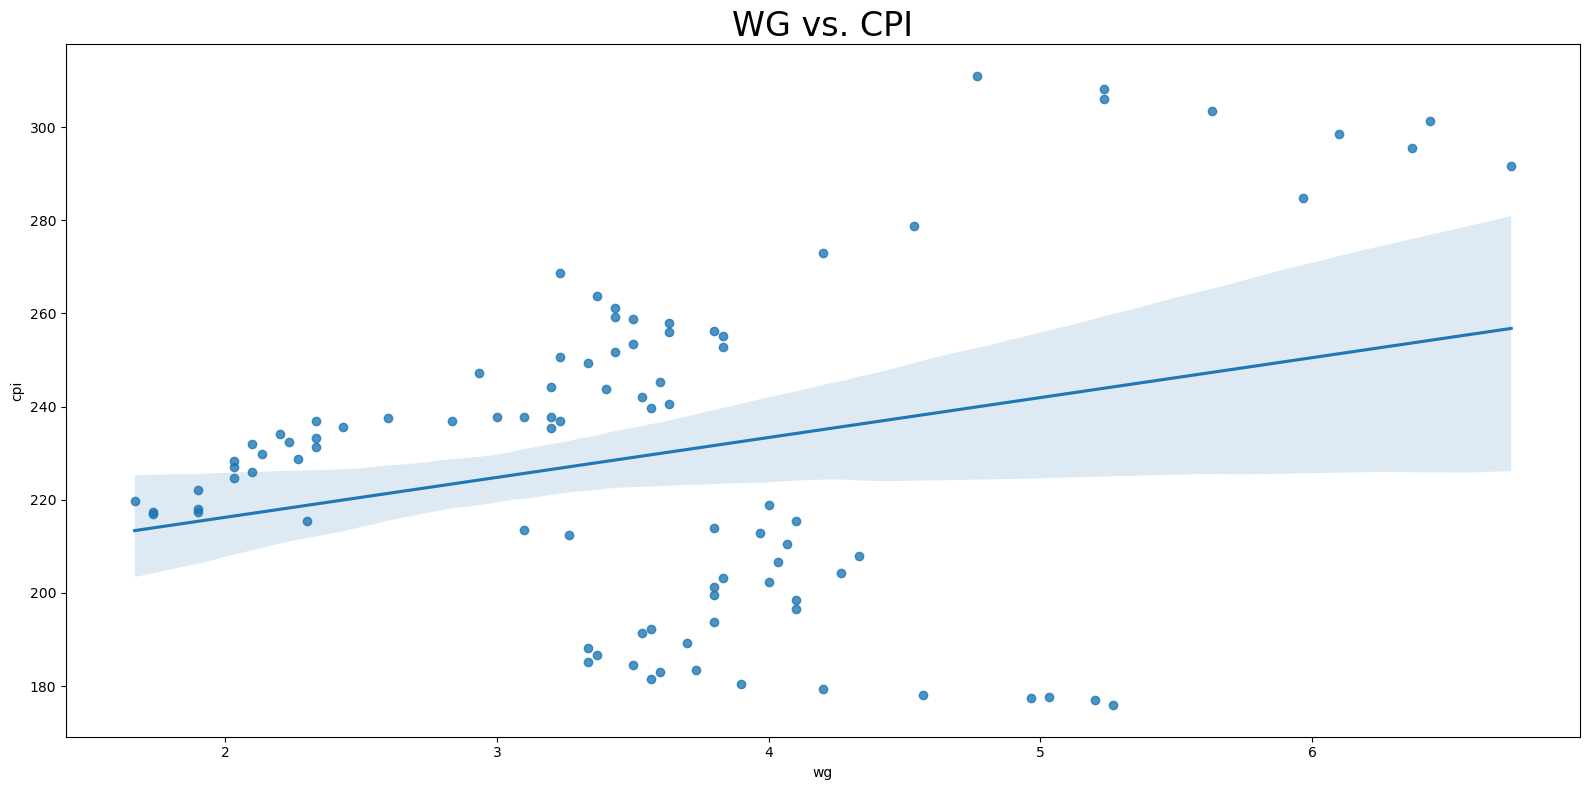

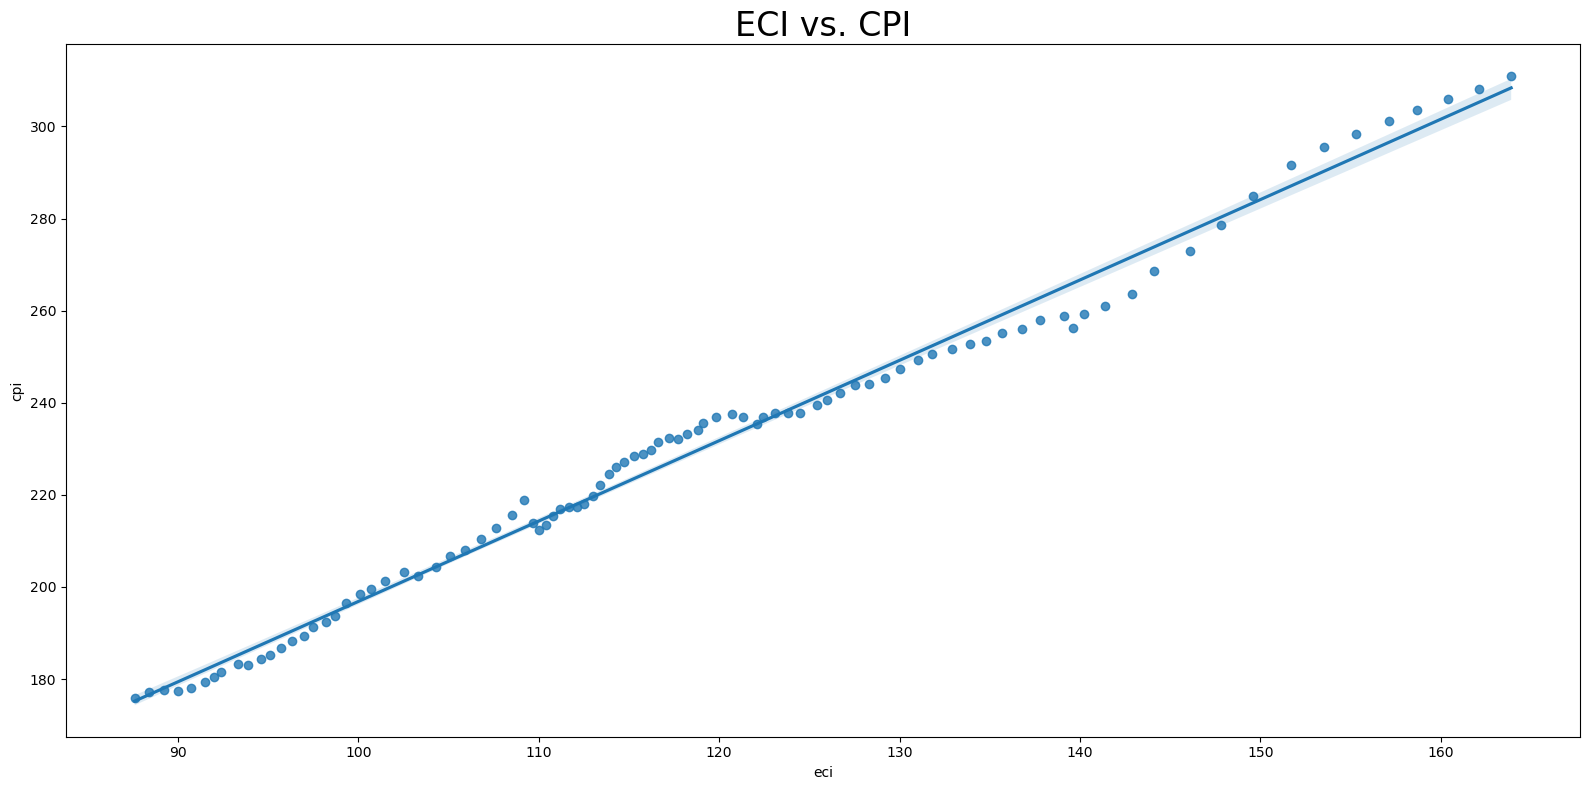

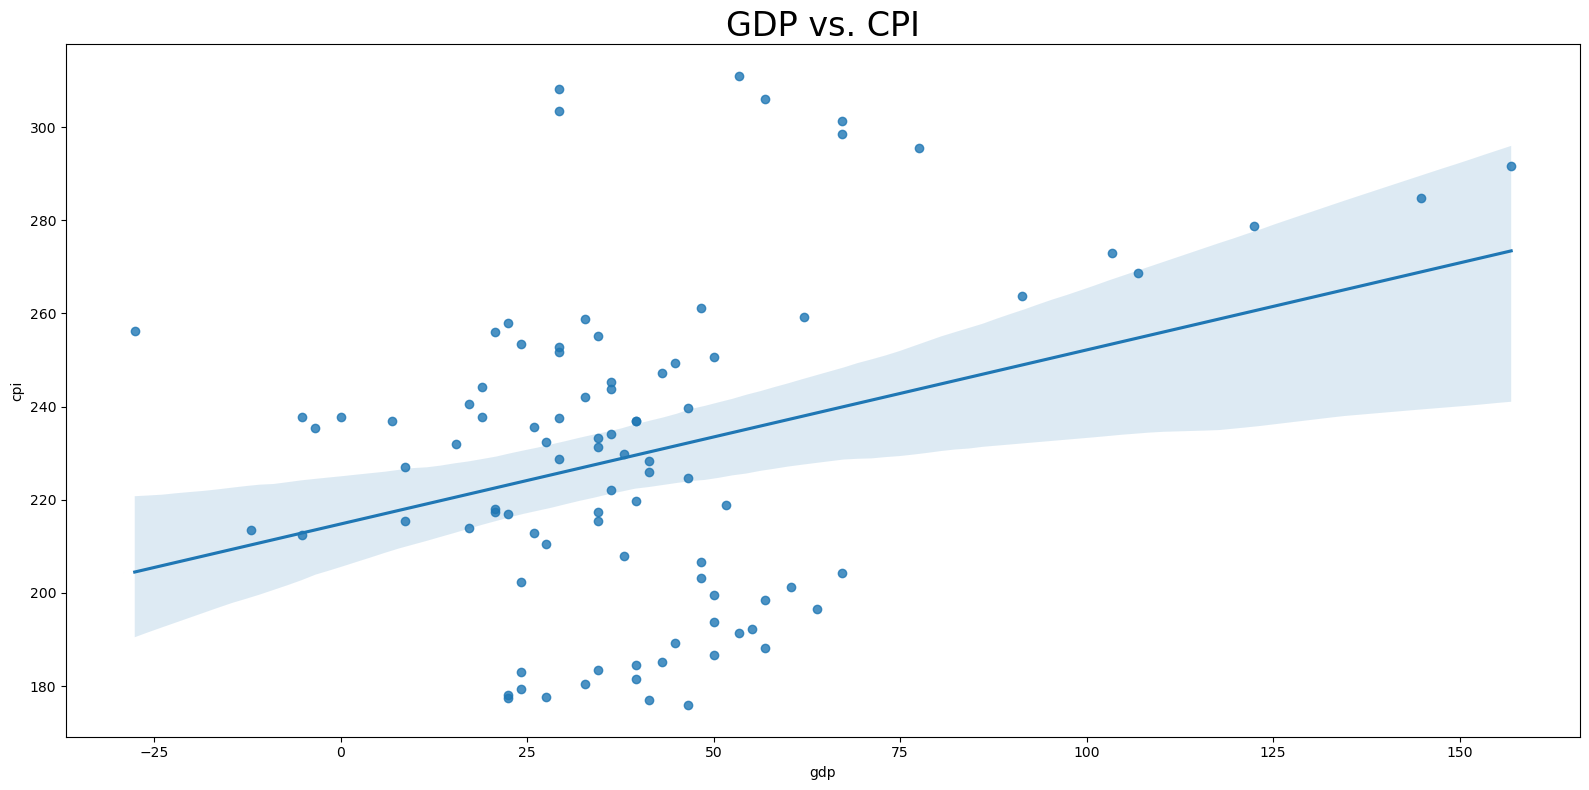

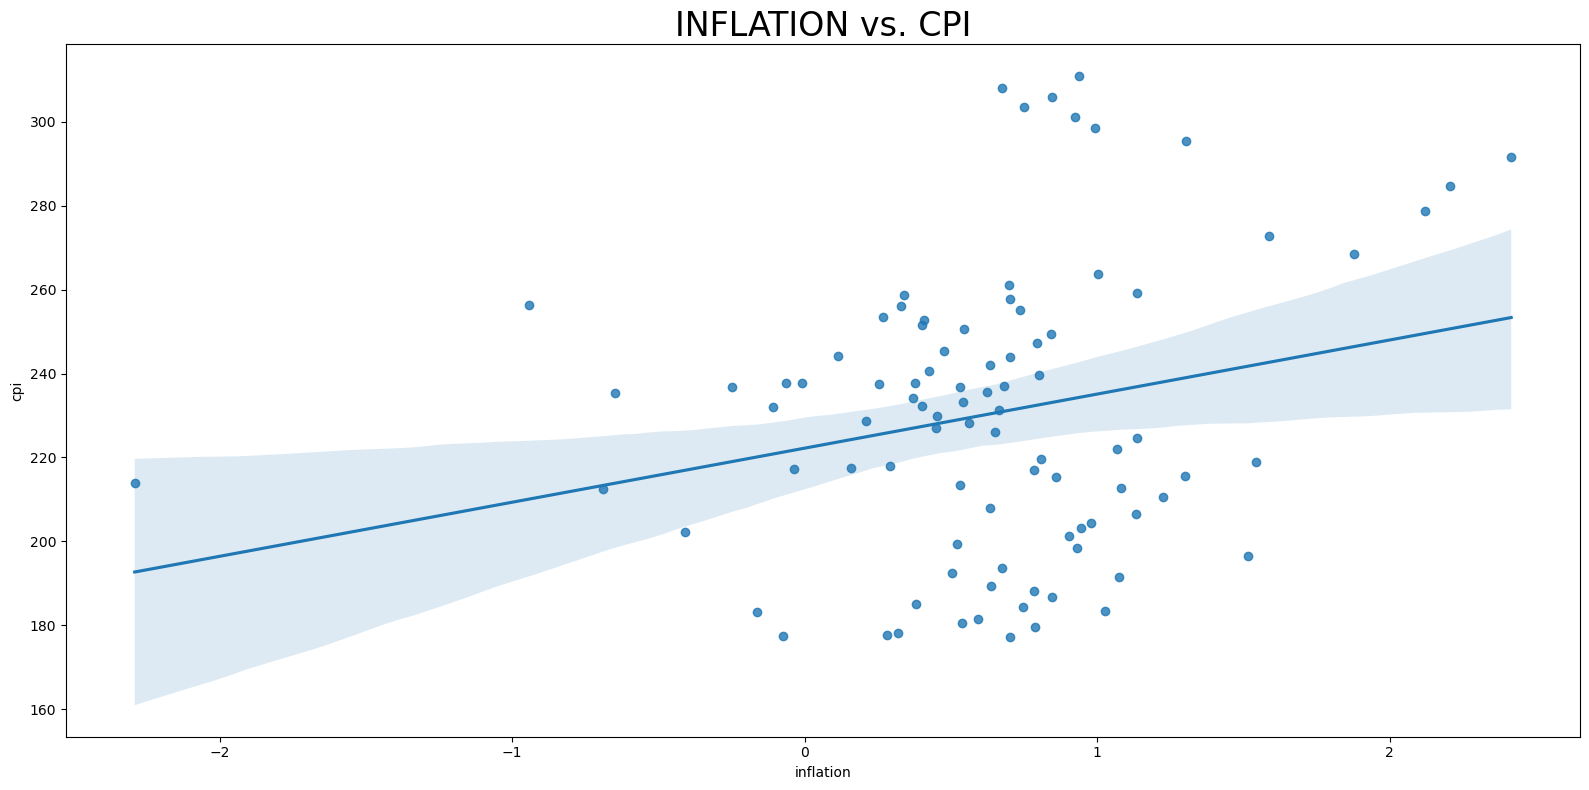

In [29]:
for column in df.columns:
    plt.figure(figsize=(16, 8))
    plt.title(f"{column.upper()} vs. CPI", fontsize=24)
    sns.regplot(data=df, x = df[column], y = df['cpi'])
    plt.tight_layout()
    plt.show()

In [30]:
df_2020 =  df[df.index.year >= 2020]

<Axes: xlabel='DATE'>

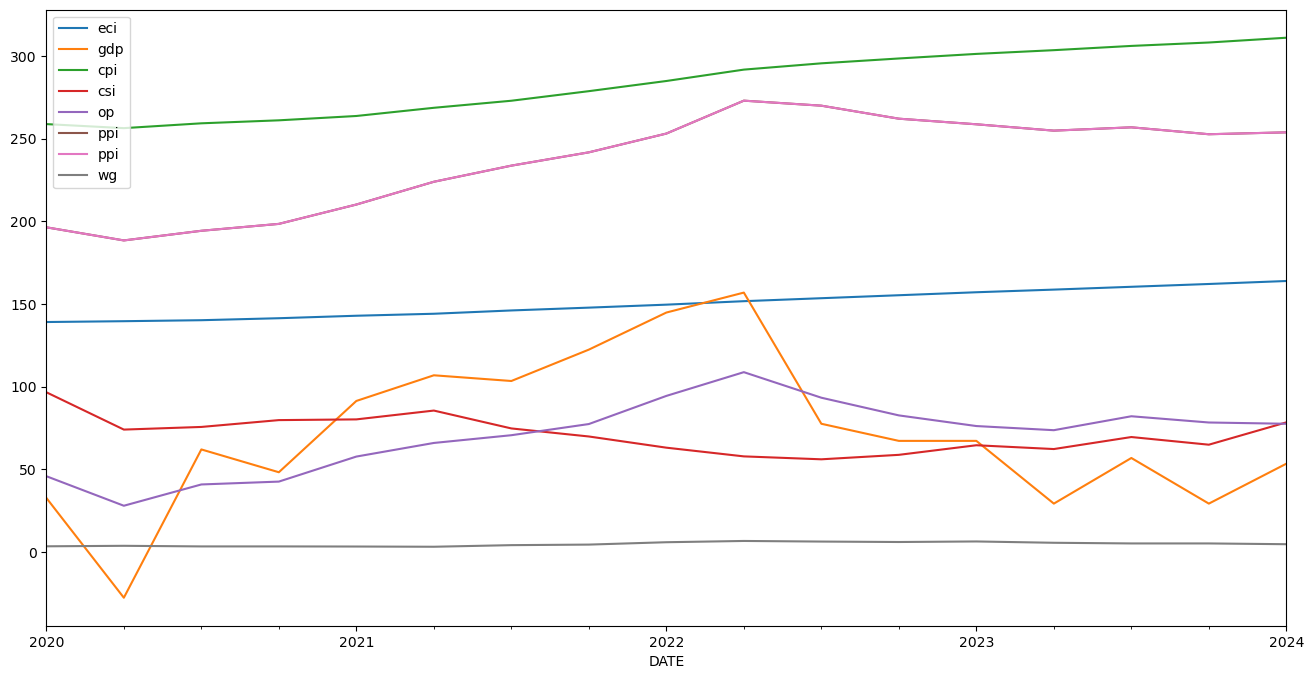

In [31]:
df_2020[['eci','gdp','cpi','csi','op','ppi','ppi','wg']].plot(figsize=(16, 8))

In [32]:
df_2020.inflation

DATE
2020-01-01    0.340975
2020-04-01   -0.943447
2020-07-01    1.137484
2020-10-01    0.697419
2021-01-01    1.003896
2021-04-01    1.878229
2021-07-01    1.588598
2021-10-01    2.121856
2022-01-01    2.205275
2022-04-01    2.415627
2022-07-01    1.303594
2022-10-01    0.992186
2023-01-01    0.925476
2023-04-01    0.751542
2023-07-01    0.846112
2023-10-01    0.674652
2024-01-01    0.938227
Freq: QS-JAN, Name: inflation, dtype: float64

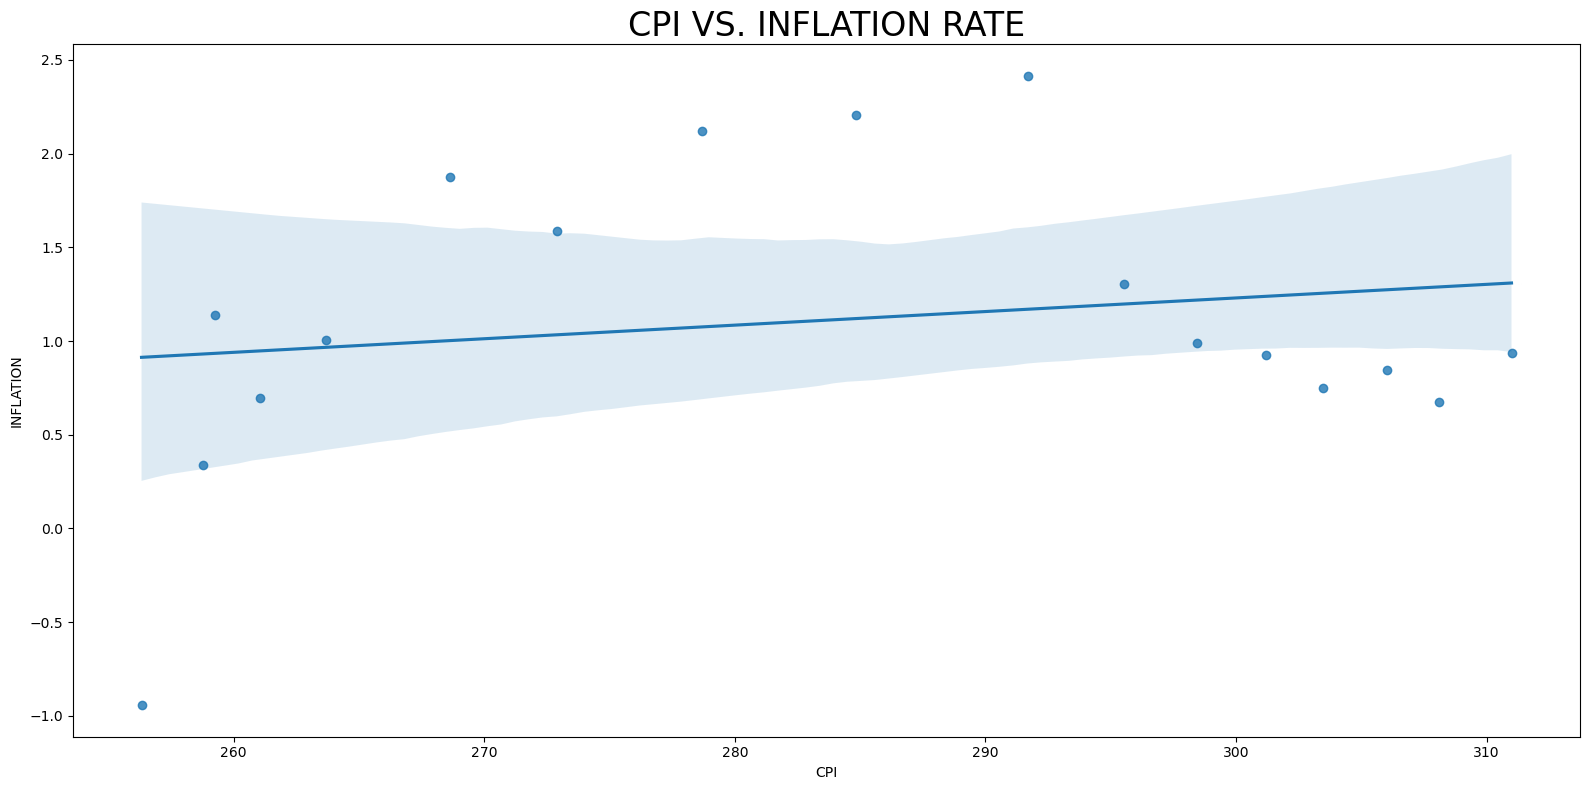

In [33]:
plt.figure(figsize=(16, 8))
sns.regplot(y=df_2020['inflation'], x=df_2020['cpi'])
plt.title(f"CPI VS. INFLATION RATE", fontsize=24)
plt.ylabel('INFLATION')
plt.xlabel('CPI')
plt.tight_layout()
plt.show()

<Axes: xlabel='DATE'>

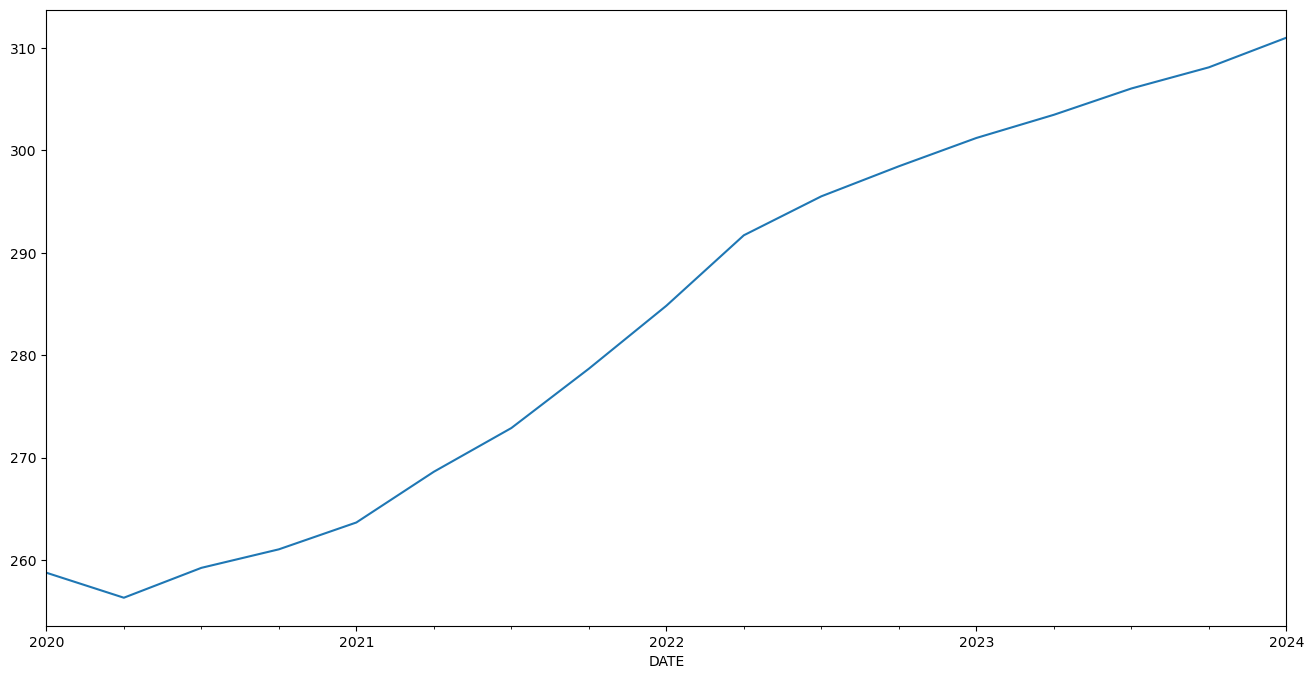

In [34]:
df_2020.cpi.plot(figsize=(16, 8))

In [35]:
df_2020


,cpi,csi,ipi,op,pce,ppi,wg,eci,gdp,inflation
DATE,,,,,,,,,,
2020-01-01,258.767333,96.633333,123.600000,45.881804,14473.133333,196.366667,3.500000,139.1,32.75862,0.340975
2020-04-01,256.326000,74.066667,119.266667,28.023658,13168.933333,188.433333,3.800000,139.6,-27.58621,-0.943447
2020-07-01,259.241667,75.666667,122.900000,40.894784,14456.166667,194.266667,3.433333,140.2,62.06897,1.137484
2020-10-01,261.049667,79.800000,123.766667,42.621494,14726.700000,198.433333,3.433333,141.4,48.27586,0.697419
2021-01-01,263.670333,80.233333,128.133333,57.755979,15217.700000,210.133333,3.366667,142.9,91.37931,1.003896
2021-04-01,268.622667,85.566667,132.700000,65.985317,15950.866667,223.900000,3.233333,144.1,106.89655,1.878229
2021-07-01,272.890000,74.766667,134.600000,70.666364,16285.100000,233.647667,4.200000,146.1,103.44828,1.588598
2021-10-01,278.680333,69.900000,137.400000,77.420638,16718.200000,241.696667,4.533333,147.8,122.41379,2.121856
2022-01-01,284.826000,63.133333,143.166667,94.428250,17030.633333,253.042333,5.966667,149.6,144.82759,2.205275


In [36]:
df_2020['inflation'].rolling(window=4).mean()

DATE
2020-01-01         NaN
2020-04-01         NaN
2020-07-01         NaN
2020-10-01    0.308108
2021-01-01    0.473838
2021-04-01    1.179257
2021-07-01    1.292035
2021-10-01    1.648145
2022-01-01    1.948489
2022-04-01    2.082839
2022-07-01    2.011588
2022-10-01    1.729170
2023-01-01    1.409221
2023-04-01    0.993200
2023-07-01    0.878829
2023-10-01    0.799445
2024-01-01    0.802633
Freq: QS-JAN, Name: inflation, dtype: float64

In [37]:
df

,cpi,csi,ipi,op,pce,ppi,wg,eci,gdp,inflation
DATE,,,,,,,,,,
2001-01-01,175.900000,92.266667,99.566667,28.769013,6995.300000,137.766667,5.266667,87.6,46.55172,NaN
2001-04-01,177.133333,91.000000,97.800000,27.888399,7042.233333,136.233333,5.200000,88.4,41.37931,0.701156
2001-07-01,177.633333,88.566667,96.000000,26.704912,7070.333333,133.366667,5.033333,89.2,27.58621,0.282273
2001-10-01,177.500000,85.133333,92.466667,20.370715,7187.300000,129.400000,4.966667,90.0,22.41379,-0.075061
2002-01-01,178.066667,93.133333,92.000000,21.630329,7217.733333,128.900000,4.566667,90.7,22.41379,0.319249
...,...,...,...,...,...,...,...,...,...,...
2023-01-01,301.203000,64.600000,140.733333,76.209042,18269.566667,258.652667,6.433333,157.1,67.24138,0.925476
2023-04-01,303.466667,62.300000,139.800000,73.702265,18419.000000,254.812667,5.633333,158.7,29.31034,0.751542
2023-07-01,306.034333,69.566667,140.233333,82.126743,18679.500000,256.816333,5.233333,160.4,56.89655,0.846112


/var/folders/bf/jskpgkr57cl65bh_6c8692140000gn/T/ipykernel_9950/3083237435.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['CPI_Rolling_Mean'] = df['cpi'].rolling(window=window_size).mean()


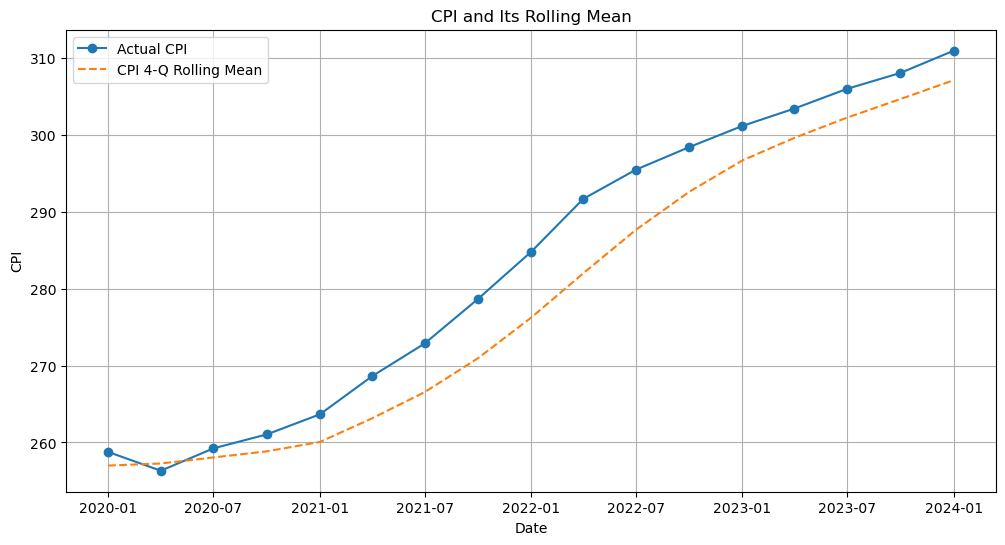

In [39]:
# Set window size for rolling mean
window_size = 4  # 12 months window

# Calculate rolling mean of CPI
df_2020['CPI_Rolling_Mean'] = df['cpi'].rolling(window=window_size).mean()

# Plot actual CPI and its rolling mean
plt.figure(figsize=(12, 6))
plt.plot(df_2020.index, df_2020['cpi'], label='Actual CPI', marker='o')
plt.plot(df_2020.index, df_2020['CPI_Rolling_Mean'], label=f'CPI {window_size}-Q Rolling Mean', linestyle='--')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.title('CPI and Its Rolling Mean')
plt.legend()
plt.grid(True)
plt.show()


/var/folders/bf/jskpgkr57cl65bh_6c8692140000gn/T/ipykernel_9950/3001863651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['CPI_Inflation_Rolling_Mean'] = df['inflation'].rolling(window=window_size).mean()


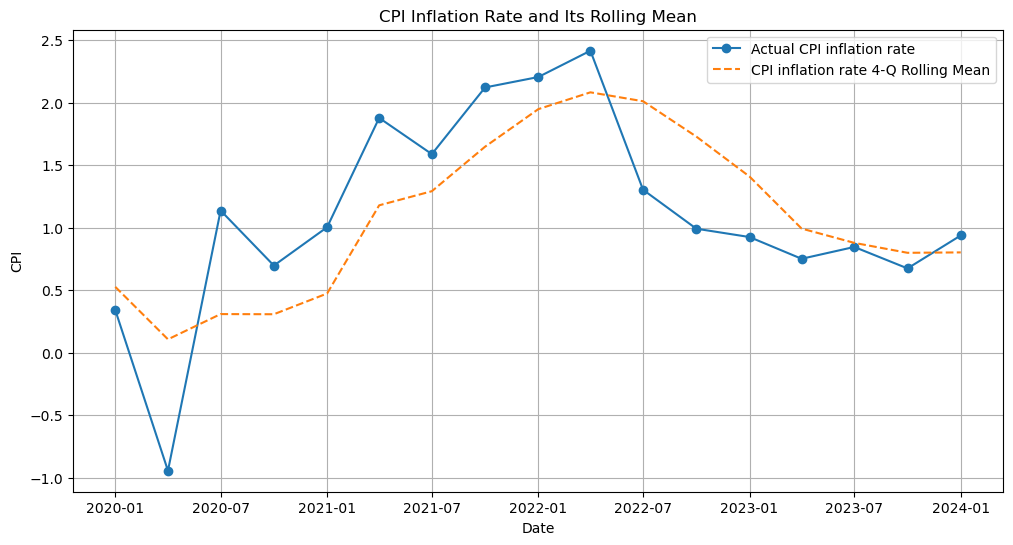

In [40]:


# Calculate rolling mean of CPI
df_2020['CPI_Inflation_Rolling_Mean'] = df['inflation'].rolling(window=window_size).mean()
plt.figure(figsize=(12, 6))
plt.plot(df_2020.index, df_2020['inflation'], label='Actual CPI inflation rate', marker='o')
plt.plot(df_2020.index, df_2020['CPI_Inflation_Rolling_Mean'], label=f'CPI inflation rate {window_size}-Q Rolling Mean', linestyle='--')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.title('CPI Inflation Rate and Its Rolling Mean')
plt.legend()
plt.grid(True)
plt.show()


In [41]:
df_2020

,cpi,csi,ipi,op,pce,ppi,wg,eci,gdp,inflation,CPI_Rolling_Mean,CPI_Inflation_Rolling_Mean
DATE,,,,,,,,,,,,
2020-01-01,258.767333,96.633333,123.600000,45.881804,14473.133333,196.366667,3.500000,139.1,32.75862,0.340975,256.998000,0.526982
2020-04-01,256.326000,74.066667,119.266667,28.023658,13168.933333,188.433333,3.800000,139.6,-27.58621,-0.943447,257.267667,0.107441
2020-07-01,259.241667,75.666667,122.900000,40.894784,14456.166667,194.266667,3.433333,140.2,62.06897,1.137484,258.055750,0.309343
2020-10-01,261.049667,79.800000,123.766667,42.621494,14726.700000,198.433333,3.433333,141.4,48.27586,0.697419,258.846167,0.308108
2021-01-01,263.670333,80.233333,128.133333,57.755979,15217.700000,210.133333,3.366667,142.9,91.37931,1.003896,260.071917,0.473838
2021-04-01,268.622667,85.566667,132.700000,65.985317,15950.866667,223.900000,3.233333,144.1,106.89655,1.878229,263.146083,1.179257
2021-07-01,272.890000,74.766667,134.600000,70.666364,16285.100000,233.647667,4.200000,146.1,103.44828,1.588598,266.558167,1.292035
2021-10-01,278.680333,69.900000,137.400000,77.420638,16718.200000,241.696667,4.533333,147.8,122.41379,2.121856,270.965833,1.648145
2022-01-01,284.826000,63.133333,143.166667,94.428250,17030.633333,253.042333,5.966667,149.6,144.82759,2.205275,276.254750,1.948489


In [49]:
predicted_next_Q = df_2020['CPI_Inflation_Rolling_Mean'].iloc[-1]
predicted_next_Q

0.8026330025616812

In [53]:
print(f'predicted inflation rate for next Quarter is {predicted_next_Q}')

predicted inflation rate for next Quarter is 0.8026330025616812
